In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import delve
import os
import numpy as np

In [2]:
path = "./resolution_experiments"
if not os.path.exists(path):
    os.mkdir(path)

In [3]:
big_cifar10_probes_file = 'results_vgg16_bigCifar.csv'
med_cifar10_probes_file = 'results_VGG16_MediumCifar10.csv'
cifar10_probes_file = 'results_vgg16.csv'
cifar10_resnet18_file = 'results_ResNet18_Cifar10.csv'
cifar10_resnet18noskip_file = 'results_ResNet18NoSkip_Cifar10.csv'
cifar10_resnet34_file = 'results_ResNet34_Cifar10.csv'
cifar10_resnet34noskip_file = 'results_ResNet34NoSkip_Cifar10.csv'
cifar10_mobilenetV2_file = 'results_MobileNetV2_Cifar10.csv'
cifar10_squeezenet11_file = 'results_SqueezeNet11_Cifar10.csv'

In [4]:
layer_names = {
    "VGG11": {
    'train-features-0': 'Conv1',
    'train-features-4': 'Conv2',
    'train-features-8': 'Conv3',
    'train-features-11':'Conv4',
    'train-features-15':'Conv5',
    'train-features-18':'Conv6',
    'train-features-22':'Conv7',
    'train-features-25':'Conv8',
    'train-classifier-2': 'Lin0',
    'train-classifier-6': 10
    },
    "VGG13": {
    'train-features-0': 'Conv1',
    'train-features-3': 'Conv2',
    'train-features-7': 'Conv3',
    'train-features-10':'Conv4',
    'train-features-14':'Conv5',
    'train-features-17':'Conv6',
    'train-features-21':'Conv7',
    'train-features-24':'Conv8',
    'train-features-28':'Conv9',
    'train-features-31':'Conv10',
    'train-classifier-6': 10
    },
    "VGG16": {
    'train-features-0': 'Conv1',
    'train-features-3': 'Conv2',
    'train-features-7': 'Conv3',
    'train-features-10':'Conv4',
    'train-features-14':'Conv5',
    'train-features-17':'Conv6',
    'train-features-20':'Conv7',
    'train-features-24':'Conv8',
    'train-features-27':'Conv9',
    'train-features-30':'Conv10',
    'train-features-34':'Conv11',
    'train-features-37':'Conv12',
    'train-features-40':'Conv13',
    'train-classifier-2': 'Lin0',
    'train-classifier-6': 10
    },
    "VGG19": {
    'train-features-0': 'Conv1',
    'train-features-3': 'Conv2',
    'train-features-7': 'Conv3',
    'train-features-10':'Conv4',
    'train-features-14':'Conv5',
    'train-features-17':'Conv6',
    'train-features-20':'Conv7',
    'train-features-23':'Conv8',
    'train-features-27':'Conv9',
    'train-features-30':'Conv10',
    'train-features-33':'Conv11',
    'train-features-36':'Conv12',
    'train-features-40':'Conv13',
    'train-features-43':'Conv14',
    'train-features-46':'Conv15',
    'train-features-49':'Conv16',
    'train-classifier-2': 'Lin0',
    'train-classifier-6': 10
    },
    
    "ResNet18": {
    'train-conv1': 'Conv1', 
    'train-layer1-0-conv1': 'Block1-Conv1',
    'train-layer1-0-conv2': 'Block1-Conv2', 
    'train-layer1-1-conv1': 'Block2-Conv1', 
    'train-layer1-1-conv2': 'Block2-Conv2', 
    'train-layer2-0-downsample-0': 128,
    'train-layer2-0-conv1': 'Block3-Conv1', 
    'train-layer2-0-conv2': 'Block3-Conv2', 
    'train-layer2-1-conv1': 'Block4-Conv1', 
    'train-layer2-1-conv2': 'Block4-Conv2', 
    'train-layer3-0-downsample-0': 256, 
    'train-layer3-0-conv1': 'Block5-Conv1', 
    'train-layer3-0-conv2': 'Block5-Conv2', 
    'train-layer3-1-conv1': 'Block6-Conv1', 
    'train-layer3-1-conv2': 'Block6-Conv2', 
    'train-layer4-0-downsample-0': 512,
    'train-layer4-0-conv1': 'Block7-Conv1', 
    'train-layer4-0-conv2': 'Block7-Conv2', 
    'train-layer4-1-conv1': 'Block8-Conv1', 
    'train-layer4-1-conv2': 'Block8-Conv2',
    'train-fc': 512, 
},
    "ResNet34": {
    'train-conv1': 'Conv1', 
    'train-layer1-0-conv1': 'Block1-Conv1',
    'train-layer1-0-conv2': 'Block1-Conv2', 
    'train-layer1-1-conv1': 'Block2-Conv1', 
    'train-layer1-1-conv2': 'Block2-Conv2', 
    'train-layer1-2-conv1': 'Block3-Conv1', 
    'train-layer1-2-conv2': 'Block3-Conv2', 
    'train-layer2-0-downsample-0': 128,
    'train-layer2-0-conv1': 'Block4-Conv1', 
    'train-layer2-0-conv2': 'Block4-Conv2', 
    'train-layer2-1-conv1': 'Block5-Conv1', 
    'train-layer2-1-conv2': 'Block5-Conv2', 
    'train-layer2-2-conv1': 'Block6-Conv1', 
    'train-layer2-2-conv2': 'Block6-Conv2', 
    'train-layer2-3-conv1': 'Block7-Conv1', 
    'train-layer2-3-conv2': 'Block7-Conv2', 
    'train-layer3-0-downsample-0': 256, 
    'train-layer3-0-conv1': 'Block5-Conv1', 
    'train-layer3-0-conv2': 'Block5-Conv2', 
    'train-layer3-1-conv1': 'Block6-Conv1', 
    'train-layer3-1-conv2': 'Block6-Conv2',
    'train-layer3-2-conv1': 'Block7-Conv1', 
    'train-layer3-2-conv2': 'Block7-Conv2', 
    'train-layer3-3-conv1': 'Block8-Conv1', 
    'train-layer3-3-conv2': 'Block8-Conv2', 
    'train-layer3-4-conv1': 'Block9-Conv1', 
    'train-layer3-4-conv2': 'Block9-Conv2', 
    'train-layer3-5-conv1': 'Block10-Conv1', 
    'train-layer3-5-conv2': 'Block10-Conv2', 
    'train-layer4-0-downsample-0': 512,
    'train-layer4-0-conv1': 'Block11-Conv1', 
    'train-layer4-0-conv2': 'Block11-Conv2', 
    'train-layer4-1-conv1': 'Block12-Conv1', 
    'train-layer4-1-conv2': 'Block12-Conv2', 
    'train-layer4-2-conv1': 'Block13-Conv1', 
    'train-layer4-2-conv2': 'Block13-Conv2',
    'train-fc': 512, 
},
    "ResNet50": {
    'train-conv1': 'Conv1', 
    'train-layer1-0-conv1': 'Block1-Conv1',
    'train-layer1-0-conv2': 'Block1-Conv2', 
    'train-layer1-0-conv3': 'Block1-Conv3', 
    'train-layer1-1-conv1': 'Block2-Conv1', 
    'train-layer1-1-conv2': 'Block2-Conv2',  
    'train-layer1-1-conv3': 'Block2-Conv3',
    'train-layer1-2-conv1': 'Block3-Conv1', 
    'train-layer1-2-conv2': 'Block3-Conv2', 
    'train-layer1-2-conv3': 'Block3-Conv3', 
    'train-layer2-0-downsample-0': 128,
    'train-layer2-0-conv1': 'Block4-Conv1', 
    'train-layer2-0-conv2': 'Block4-Conv2', 
    'train-layer2-0-conv3': 'Block4-Conv3', 
    'train-layer2-1-conv1': 'Block5-Conv1', 
    'train-layer2-1-conv2': 'Block5-Conv2', 
    'train-layer2-1-conv3': 'Block5-Conv3', 
    'train-layer2-2-conv1': 'Block6-Conv1', 
    'train-layer2-2-conv2': 'Block6-Conv2', 
    'train-layer2-2-conv3': 'Block6-Conv3', 
    'train-layer2-3-conv1': 'Block7-Conv1', 
    'train-layer2-3-conv2': 'Block7-Conv2', 
    'train-layer2-3-conv3': 'Block7-Conv3', 
    'train-layer3-0-downsample-0': 256, 
    'train-layer3-0-conv1': 'Block5-Conv1', 
    'train-layer3-0-conv2': 'Block5-Conv2', 
    'train-layer3-0-conv3': 'Block5-Conv3', 
    'train-layer3-1-conv1': 'Block6-Conv1', 
    'train-layer3-1-conv2': 'Block6-Conv2',
    'train-layer3-1-conv3': 'Block6-Conv3',
    'train-layer3-2-conv1': 'Block7-Conv1', 
    'train-layer3-2-conv2': 'Block7-Conv2', 
    'train-layer3-2-conv3': 'Block7-Conv3', 
    'train-layer3-3-conv1': 'Block8-Conv1', 
    'train-layer3-3-conv2': 'Block8-Conv2', 
    'train-layer3-3-conv3': 'Block8-Conv3', 
    'train-layer3-4-conv1': 'Block9-Conv1', 
    'train-layer3-4-conv2': 'Block9-Conv2', 
    'train-layer3-4-conv3': 'Block9-Conv3', 
    'train-layer3-5-conv1': 'Block10-Conv1', 
    'train-layer3-5-conv2': 'Block10-Conv2',
    'train-layer3-5-conv3': 'Block10-Conv3', 
    'train-layer4-0-downsample-0': 512,
    'train-layer4-0-conv1': 'Block11-Conv1', 
    'train-layer4-0-conv2': 'Block11-Conv2', 
    'train-layer4-0-conv3': 'Block11-Conv3', 
    'train-layer4-1-conv1': 'Block12-Conv1', 
    'train-layer4-1-conv2': 'Block12-Conv2', 
    'train-layer4-1-conv3': 'Block12-Conv3', 
    'train-layer4-2-conv1': 'Block13-Conv1', 
    'train-layer4-2-conv2': 'Block13-Conv2',
    'train-layer4-2-conv3': 'Block13-Conv3',
    'train-fc': 512, 
},
}

layer_filters = {
    "VGG11": {
    'train-features-0': 64,
    'train-features-4': 64,
    'train-features-8': 128,
    'train-features-11': 128,
    'train-features-15': 256,
    'train-features-18': 256,
    'train-features-22': 512,
    'train-features-25': 512,
    'train-classifier-2': 256,
    'train-classifier-6': 10
    },
    "VGG13": {
    'train-features-0': 64,
    'train-features-3': 64,
    'train-features-7': 128,
    'train-features-10': 128,
    'train-features-14': 256,
    'train-features-17': 256,
    'train-features-21': 512,
    'train-features-24': 512,
    'train-features-28': 512,
    'train-features-31': 512,
    'train-classifier-2': 256,
    'train-classifier-6': 10
    },
    "VGG16": {
    'train-features-0': 64,
    'train-features-3': 64,
    'train-features-7': 128,
    'train-features-10': 128,
    'train-features-14': 256,
    'train-features-17': 256,
    'train-features-20': 256,
    'train-features-24': 512,
    'train-features-27': 512,
    'train-features-30': 512,
    'train-features-34': 512,
    'train-features-37': 512,
    'train-features-40': 512,
    'train-classifier-2': 256,
    'train-classifier-6': 10
    },
    "VGG19": {
    'train-features-0': 64,
    'train-features-3': 64,
    'train-features-7': 128,
    'train-features-10': 128,
    'train-features-14': 256,
    'train-features-17': 256,
    'train-features-20': 256,
    'train-features-23': 256,
    'train-features-27': 512,
    'train-features-30': 512,
    'train-features-33': 512,
    'train-features-36': 512,
    'train-features-40': 512,
    'train-features-43': 512,
    'train-features-46': 512,
    'train-features-49': 512,
    'train-classifier-2': 256,
    'train-classifier-6': 10,
    },
    
    "ResNet18": {
    'train-conv1': 64,
    'train-layer1-0-conv1': 64,
    'train-layer1-0-conv2': 64,
    'train-layer1-1-conv1': 64,
    'train-layer1-1-conv2': 64,
    'train-layer2-0-downsample-0': 128,
    'train-layer2-0-conv1': 128,
    'train-layer2-0-conv2': 128,
    'train-layer2-1-conv1': 128,
    'train-layer2-1-conv2': 128,
    'train-layer3-0-downsample-0': 256, 
    'train-layer3-0-conv1': 256,
    'train-layer3-0-conv2': 256,
    'train-layer3-1-conv1': 256,
    'train-layer3-1-conv2': 256,
    'train-layer4-0-downsample-0': 512,
    'train-layer4-0-conv1': 512,
    'train-layer4-0-conv2': 512,
    'train-layer4-1-conv1': 512,
    'train-layer4-1-conv2': 512,
    'train-fc': 512, 
},
    "ResNet34": {
    'train-conv1': 64,
    'train-layer1-0-conv1': 64,
    'train-layer1-0-conv2': 64,
    'train-layer1-1-conv1': 64,
    'train-layer1-1-conv2': 64,
    'train-layer1-2-conv1': 64, 
    'train-layer1-2-conv2': 64,
    'train-layer2-0-downsample-0': 128,
    'train-layer2-0-conv1': 128,
    'train-layer2-0-conv2': 128,
    'train-layer2-1-conv1': 128,
    'train-layer2-1-conv2': 128,
    'train-layer2-2-conv1': 128,
    'train-layer2-2-conv2': 128,
    'train-layer2-3-conv1': 128,
    'train-layer2-3-conv2': 128,
    'train-layer3-0-downsample-0': 256, 
    'train-layer3-0-conv1': 256, 
    'train-layer3-0-conv2': 256, 
    'train-layer3-1-conv1': 256, 
    'train-layer3-1-conv2': 256, 
    'train-layer3-2-conv1': 256, 
    'train-layer3-2-conv2': 256, 
    'train-layer3-3-conv1': 256,  
    'train-layer3-3-conv2': 256, 
    'train-layer3-4-conv1': 256, 
    'train-layer3-4-conv2': 256, 
    'train-layer3-5-conv1': 256,
    'train-layer3-5-conv2': 256,  
    'train-layer4-0-downsample-0': 512,
    'train-layer4-0-conv1': 512,
    'train-layer4-0-conv2': 512,
    'train-layer4-1-conv1': 512, 
    'train-layer4-1-conv2': 512,
    'train-layer4-2-conv1': 512, 
    'train-layer4-2-conv2': 512,
    'train-fc': 512, 
},
    "ResNet50": {
    'train-conv1': 64,
    'train-layer1-0-conv1': 64,
    'train-layer1-0-conv2': 64,
    'train-layer1-0-conv3': 256, 
    'train-layer1-1-conv1': 64, 
    'train-layer1-1-conv2': 64,  
    'train-layer1-1-conv3': 256,
    'train-layer1-2-conv1': 64, 
    'train-layer1-2-conv2': 64, 
    'train-layer1-2-conv3': 256,
    'train-layer2-0-downsample-0': 512,
    'train-layer2-0-conv1': 128,
    'train-layer2-0-conv2': 128, 
    'train-layer2-0-conv3': 512,
    'train-layer2-1-conv1': 128, 
    'train-layer2-1-conv2': 128, 
    'train-layer2-1-conv3': 512,
    'train-layer2-2-conv1': 128, 
    'train-layer2-2-conv2': 128, 
    'train-layer2-2-conv3': 512, 
    'train-layer2-3-conv1': 128,
    'train-layer2-3-conv2': 128, 
    'train-layer2-3-conv3': 512, 
    'train-layer3-0-downsample-0': 1024, 
    'train-layer3-0-conv1': 256, 
    'train-layer3-0-conv2': 256, 
    'train-layer3-0-conv3': 1024,  
    'train-layer3-1-conv1': 256, 
    'train-layer3-1-conv2': 256, 
    'train-layer3-1-conv3': 1024, 
    'train-layer3-2-conv1': 256, 
    'train-layer3-2-conv2': 256, 
    'train-layer3-2-conv3': 1024, 
    'train-layer3-3-conv1': 256,  
    'train-layer3-3-conv2': 256,  
    'train-layer3-3-conv3': 1024, 
    'train-layer3-4-conv1': 256, 
    'train-layer3-4-conv2': 256, 
    'train-layer3-4-conv3': 1024, 
    'train-layer3-5-conv1': 256, 
    'train-layer3-5-conv2': 256,
    'train-layer3-5-conv3': 1024, 
    'train-layer4-0-downsample-0': 2048,
    'train-layer4-0-conv1': 512, 
    'train-layer4-0-conv2': 512,
    'train-layer4-0-conv3': 2048, 
    'train-layer4-1-conv1': 512, 
    'train-layer4-1-conv2': 52, 
    'train-layer4-1-conv3': 2048,
    'train-layer4-2-conv1': 512, 
    'train-layer4-2-conv2': 512,
    'train-layer4-2-conv3': 2048, 
    'train-fc': 2048, 
    }
}


In [5]:
from matplotlib import rc

params = {
#           'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 18, # fontsize for x and y labels (was 10)
          'axes.titlesize': 18,
          'font.size': 16, # was 10
          'legend.fontsize': 16, # was 10
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'font.family': 'serif',
          'figure.dpi': 300
}
#mpl.rcParams['figure.dpi'] = 900
import matplotlib
matplotlib.rcParams.update(params)
#rc('text', usetex=True)

In [6]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

alist=[
    "something1",
    "something12",
    "something17",
    "something2",
    "something25",
    "something29"]

alist.sort(key=natural_keys)
print(alist)

['something1', 'something2', 'something12', 'something17', 'something25', 'something29']


In [23]:
def extract_layer_stat(df, epoch=29, primary_metric=None, stat='saturation'):
    """
    Extracts a specific statistic for a single epoch from a result dataframe as produced by the CSV-writer
    :param df: the dataframe as produced by the csv-writer
    :param epoch: the epoch to filter by
    :param primary_metric: the primary metric for logged for performance evaluation, may be left empty
    :param stat: the statistic to look for, must be a substring matching all columns belonging to stat statistic like "saturation"
    :return: a dataframe with a single row, corresponding to the epoch containing only the columns that contain the substring
    described in the stat-parameter in their name. Second return value is the primary metric value
    """
    epoch = len(df)-1
    cols = list(df.columns)
    train_cols = [col for col in cols if
                  'train' in col and not 'accuracy' in col and stat in col]
    if not np.any(epoch == df.index.values):
        raise ValueError(f'Epoch {epoch} could not be recoreded, dataframe has only the following indices: {df.index.values}')
    epoch_df = df[df.index.values == epoch]
    pm = None if primary_metric is None else epoch_df[primary_metric].values[0]
    epoch_df = epoch_df[train_cols]
    return epoch_df, pm

def get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs) -> str:
    for batch_size in [16, 20, 32, 64, 128, 512, 1024]:
        path = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
        if os.path.exists(path):
            return path

def _epoch_df_to_array(df):
    return df.values[0]

def _reorder_downsampling_layers(layers, names):
    result = []
    for i, name in enumerate(names):
        result.append(name)
        if 'downsampling' in name:
            tmp = result[-3]
            result[-3] = name
            result[-1] = tmp
    return layers


def _obtain_sat_values_and_model_acc(sat_file, names):
    df = pd.read_csv(sat_file, ';')
    epoch = 29
    primary_metric = 'test_accuracy'
    epoch_df, pm = extract_layer_stat(df, epoch, primary_metric)
    if 'VGG' in sat_file:
        names = list(df.columns)
        names.sort(key=natural_keys)
        df = df[names]
    return _epoch_df_to_array(epoch_df), pm


def _obtain_probe_accs(probe_file, names=None):
    probes = pd.read_csv(probe_file, ';')
    #display(probes)
    if names is not None:
        probes = probes.set_index('name').reindex(names).reset_index()
    #display(probes)
    return probes['name'].values, probes['eval_acc'].values


def plot_performance(names, probe_acc, sat_values=None, filter_sizes=None, model_acc=None, fig=None, model_name="", layer_names=[]):
    fig, ax1 = plt.subplots(figsize=fig)
    
    if True:
        names = names[:-1]
        if probe_acc is not None:
            probe_acc = probe_acc[:-1]
        sat_values = sat_values[:-1]
        lnames = []
        new_s, new_p = [], []
        for (n, s, p) in zip(names, sat_values, probe_acc if probe_acc is not None else sat_values):
            if 'downsample' in n or "shortcut" in n:
                continue
            lnames.append(layer_names[n])
            new_s.append(s)
            new_p.append(p)
        names = lnames
        if probe_acc is not None:
            probe_acc = new_p
        sat_values = new_s
    
    color = 'tab:red'
    
    idx = list(range(len(names)))
    if probe_acc is not None:
        ax1.plot(idx, probe_acc, label='probe accuracy', color='red')
        ax1.scatter(idx, probe_acc, color='red')
    
    if sat_values is not None:
        ax1.plot(idx, sat_values, label='saturation', color='green')
        ax1.scatter(idx, sat_values, color='green')
        
    plt.grid()
    plt.xticks(idx, names, rotation=30, ha='right')
    ax1.set_ylim((0.0, 1.0))
    ax1.set_ylabel('Saturation')
    try:
        if filter_sizes is not None:
            ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
            color = 'tab:blue'
            ax2.set_ylabel('Filter Sizes', color=color)  # we already handled the x-label with ax1
            ax2.plot(idx, filter_sizes, color=color, label='feature space dim.')
            ax2.tick_params(axis='y', labelcolor=color)
        else:
            ax2 = ax1.twinx()
    except:
        pass
        
    if model_acc is not None:
        model_baseline = [model_acc/100 for _ in range(len(names))]
        ax1.plot(idx, model_baseline, color='black', linestyle='--', label=f'model test acc.: {round(model_acc, 2)}%')
        #ax1.plot(idx, [0.8731 for _ in range(len(names))], color='black', linestyle='--', label=f'model test acc.: {87.31}\%')

    plt.ylabel('Saturation')
    plt.xlabel('Layers')
        
    
    ax2.set_ylabel('Test Accuracy')
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width, box.height*0.65])
    fig.legend(bbox_to_anchor=(0.6, 1.3), framealpha=0.2)
    #fig.legend(loc='best', framealpha=0.2)

    return probe_acc

def plot_probe_accuracy(probe_acc_file, sat_file, order_mask, filter_size_mapper, model_name, figsize=None, layer_names=[], no_probes=False):
    sats, pm = _obtain_sat_values_and_model_acc(sat_file, order_mask)
    names, p_accs = _obtain_probe_accs(probe_acc_file, order_mask)
    sats = _reorder_downsampling_layers(sats, names)
    p_accs = None if no_probes else p_accs
    return plot_performance(names, p_accs, sats, None if filter_size_mapper is None else [filter_size_mapper[val] for val in names], model_acc=pm, model_name=model_name, fig=figsize, layer_names=layer_names)
    

## Section 2.3

./logs/VGG16/Cifar10_160/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_160/RES/VGG16-Cifar10-r160-bs64-e30.csv


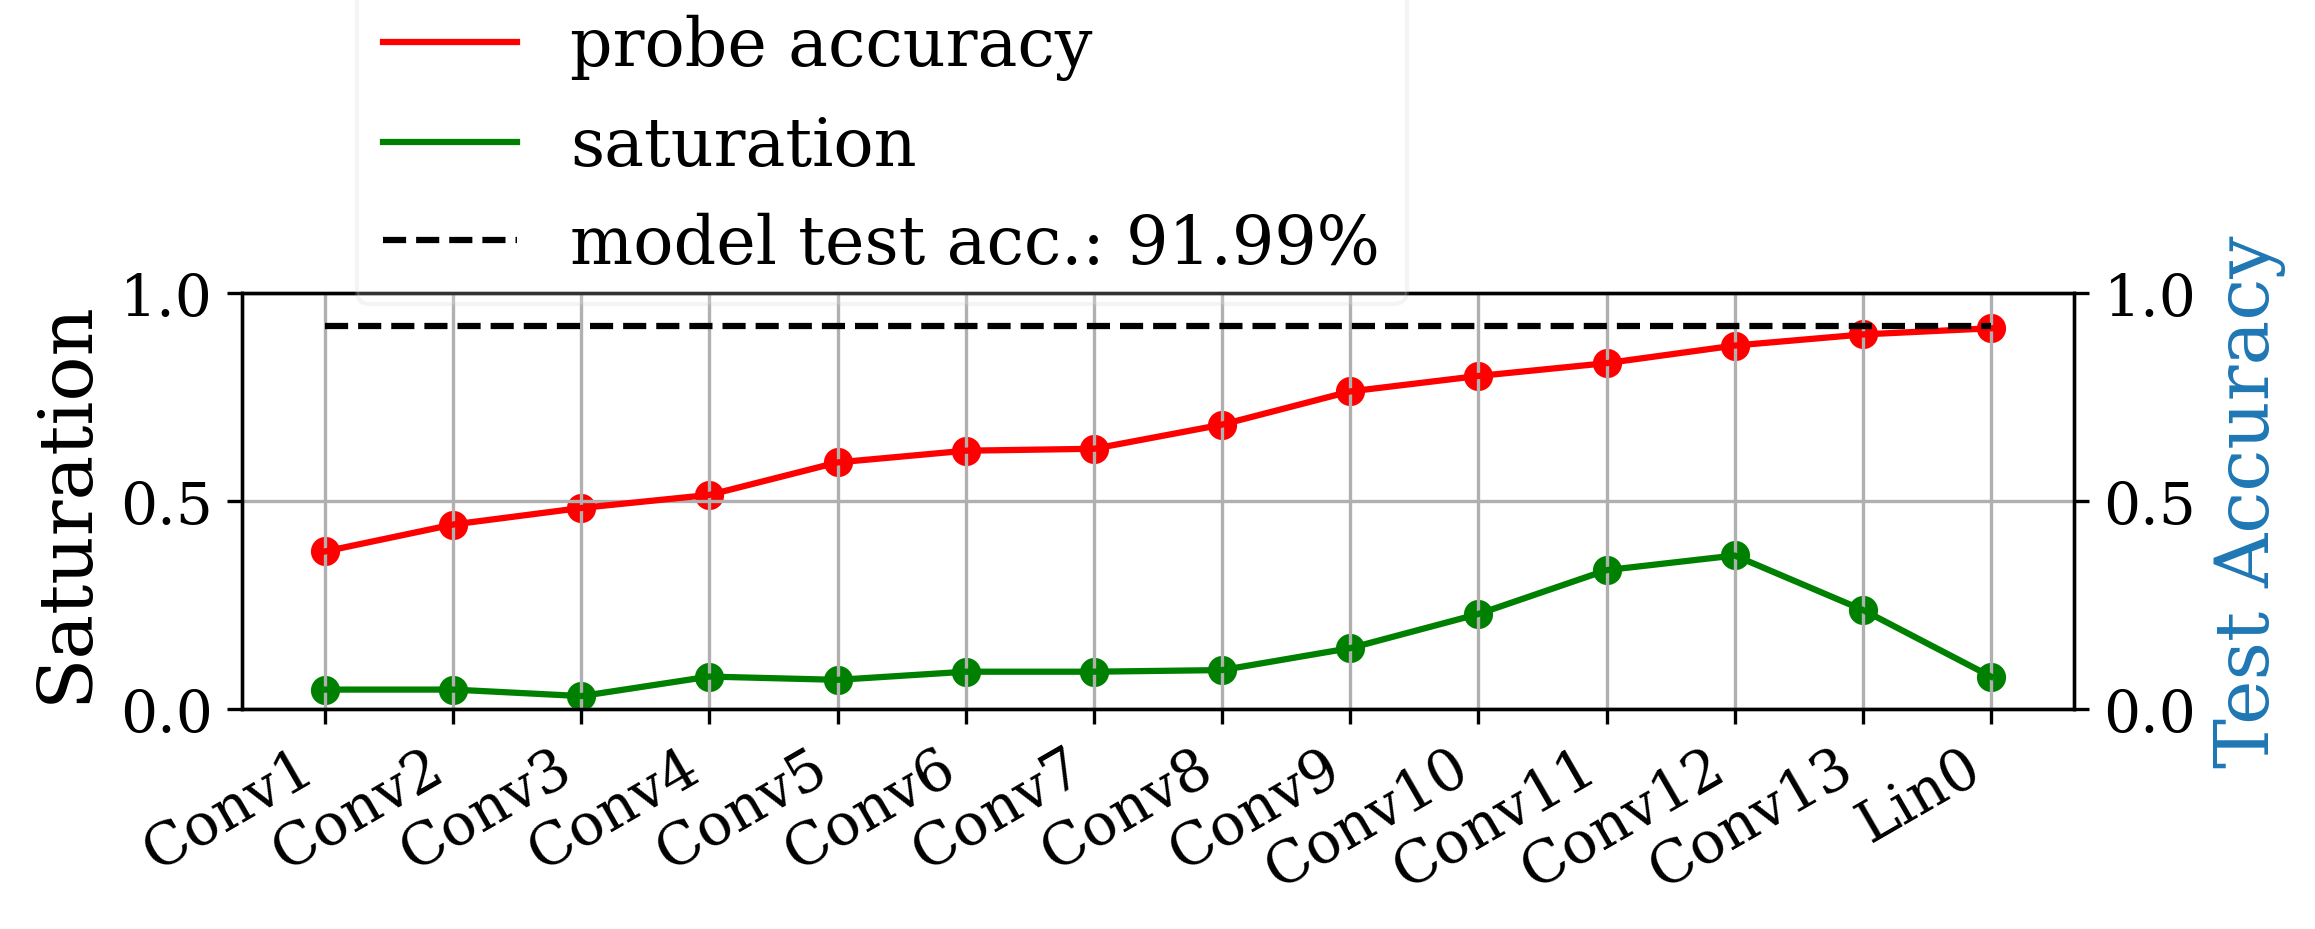

In [24]:
model = "VGG16"
dataset = "Cifar10"
resolution = 160
run_id = "RES"
probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
epochs = 60 if model == "ResNet50" else 30
batch_size = 64

cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'

print(cifar10_vgg_16_probes_file)
print(cifar10_cgg_16_sat_file)

order_mask = None

filters = layer_filters[model]
names = layer_names[model]

probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
#plt.title('ResNet18NoSkip trained on BigCifar10')
plt.tight_layout()
savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
plt.savefig(savepath, bbox_inches='tight')


# Section 3.2

./logs/ResNet18/Cifar10_32/RES/4x4_probe_performances.csv
./logs/ResNet18/Cifar10_32/RES/ResNet18-Cifar10-r32-bs64-e30.csv


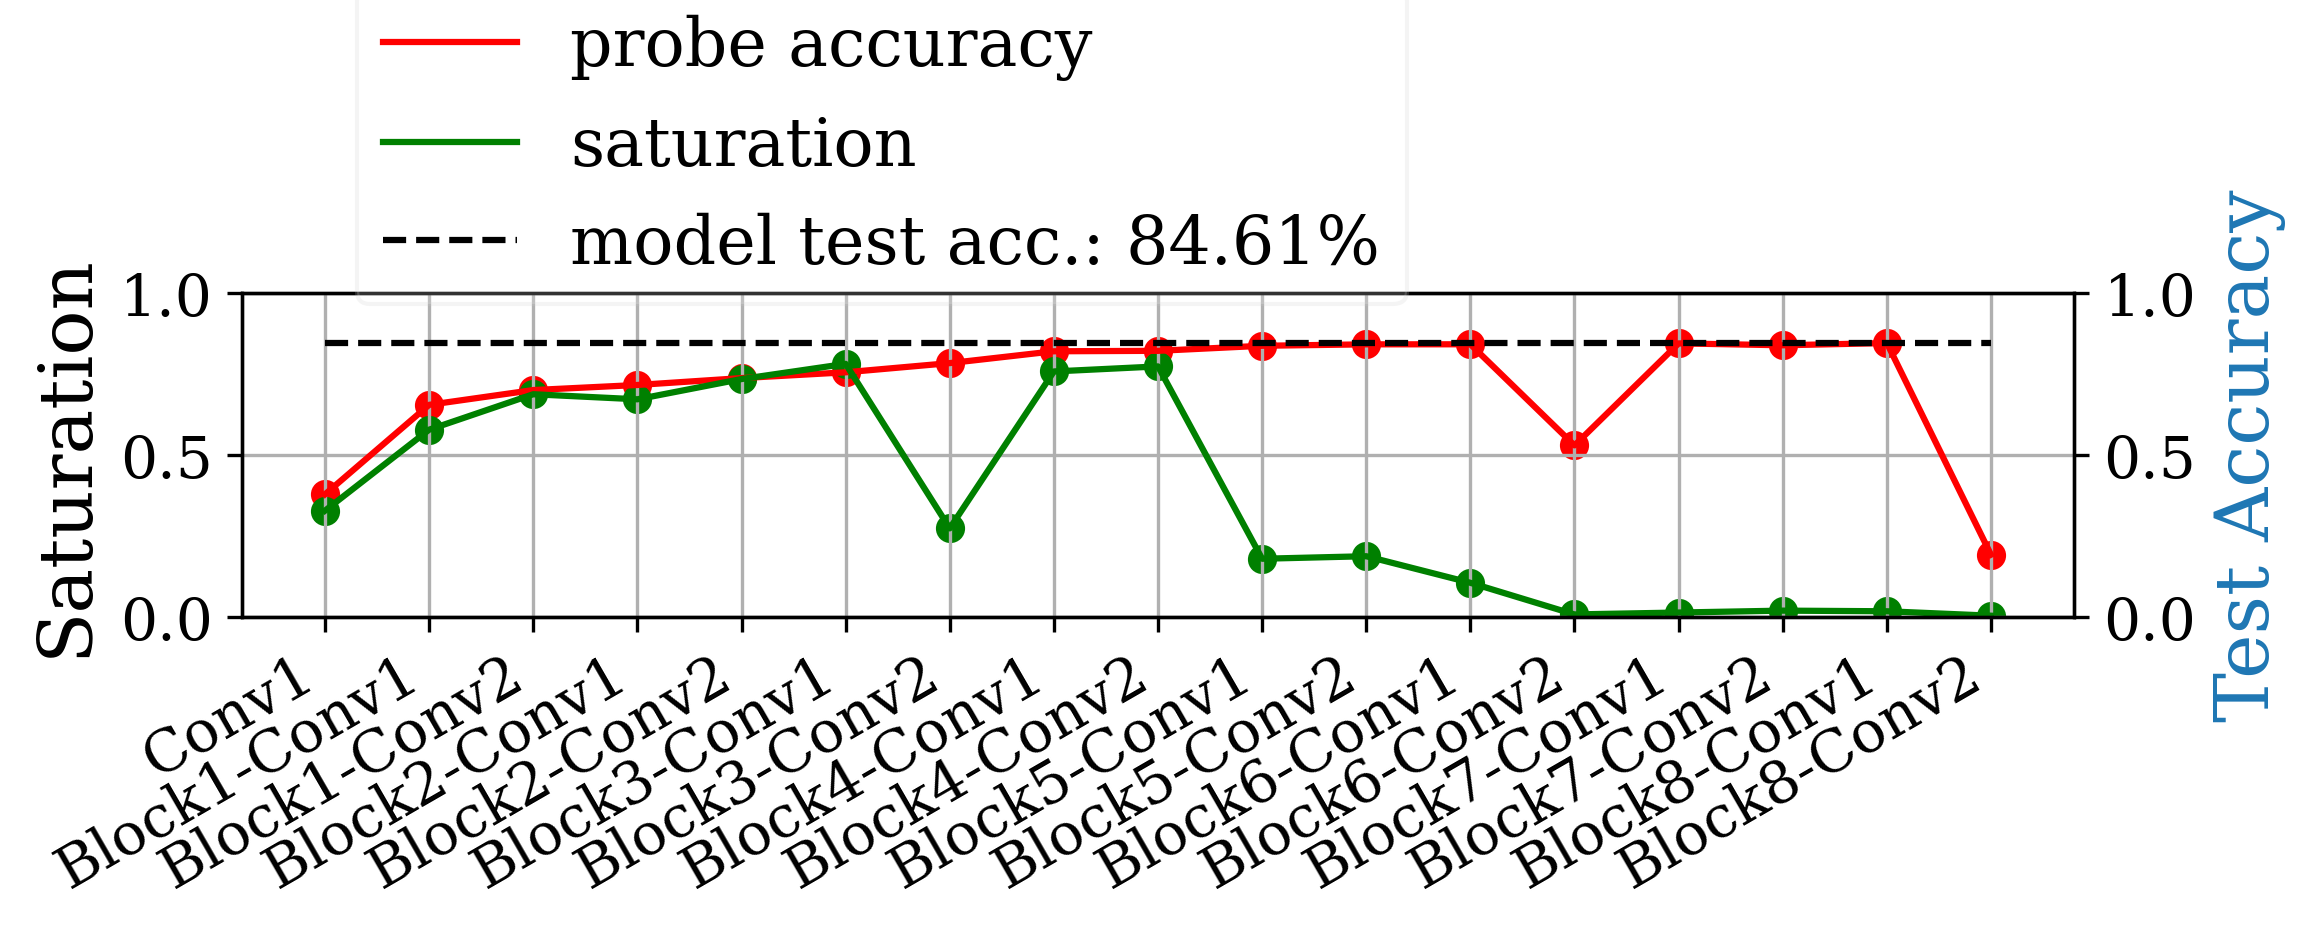

./logs/ResNet18/Cifar10_224/RES/4x4_probe_performances.csv
./logs/ResNet18/Cifar10_224/RES/ResNet18-Cifar10-r224-bs64-e30.csv


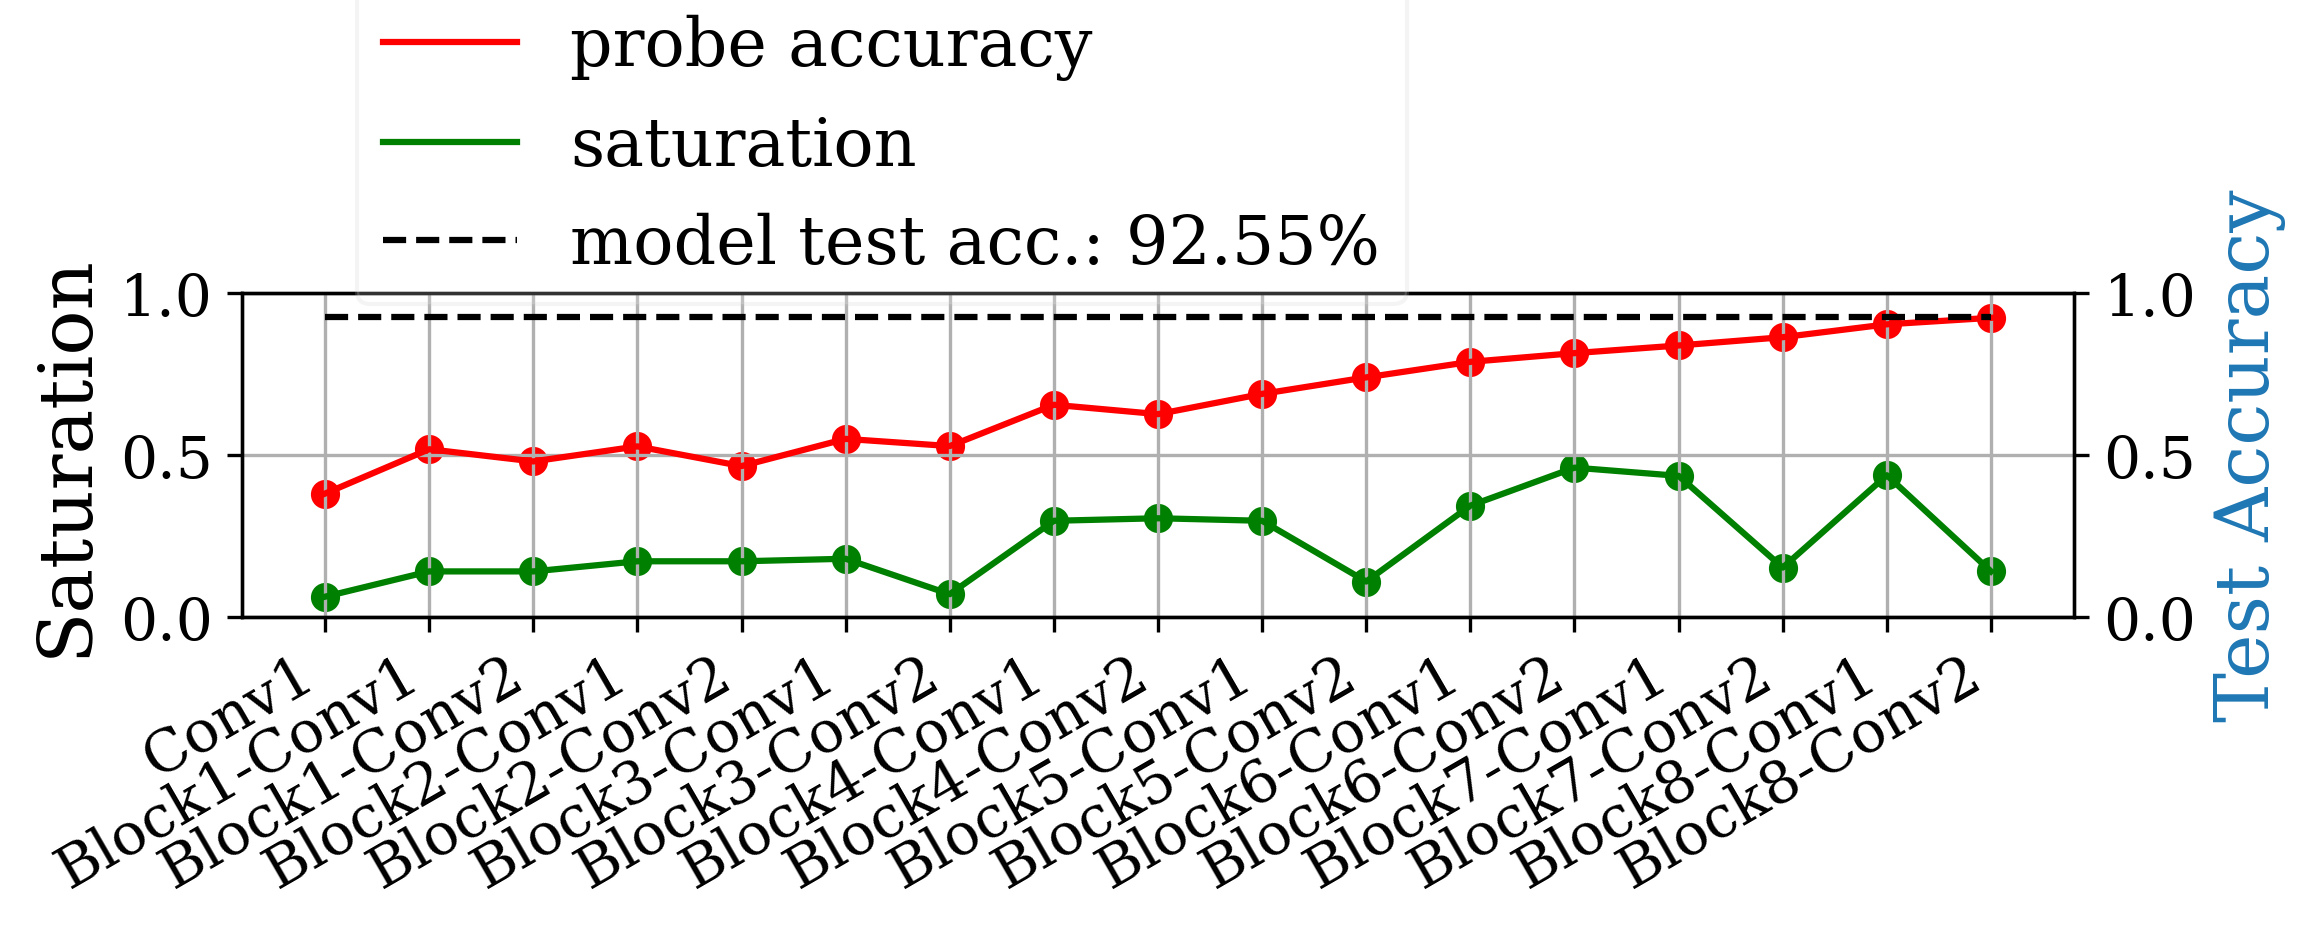

./logs/ResNet18/Cifar10_1024/RES/4x4_probe_performances.csv
./logs/ResNet18/Cifar10_1024/RES/ResNet18-Cifar10-r1024-bs20-e30.csv


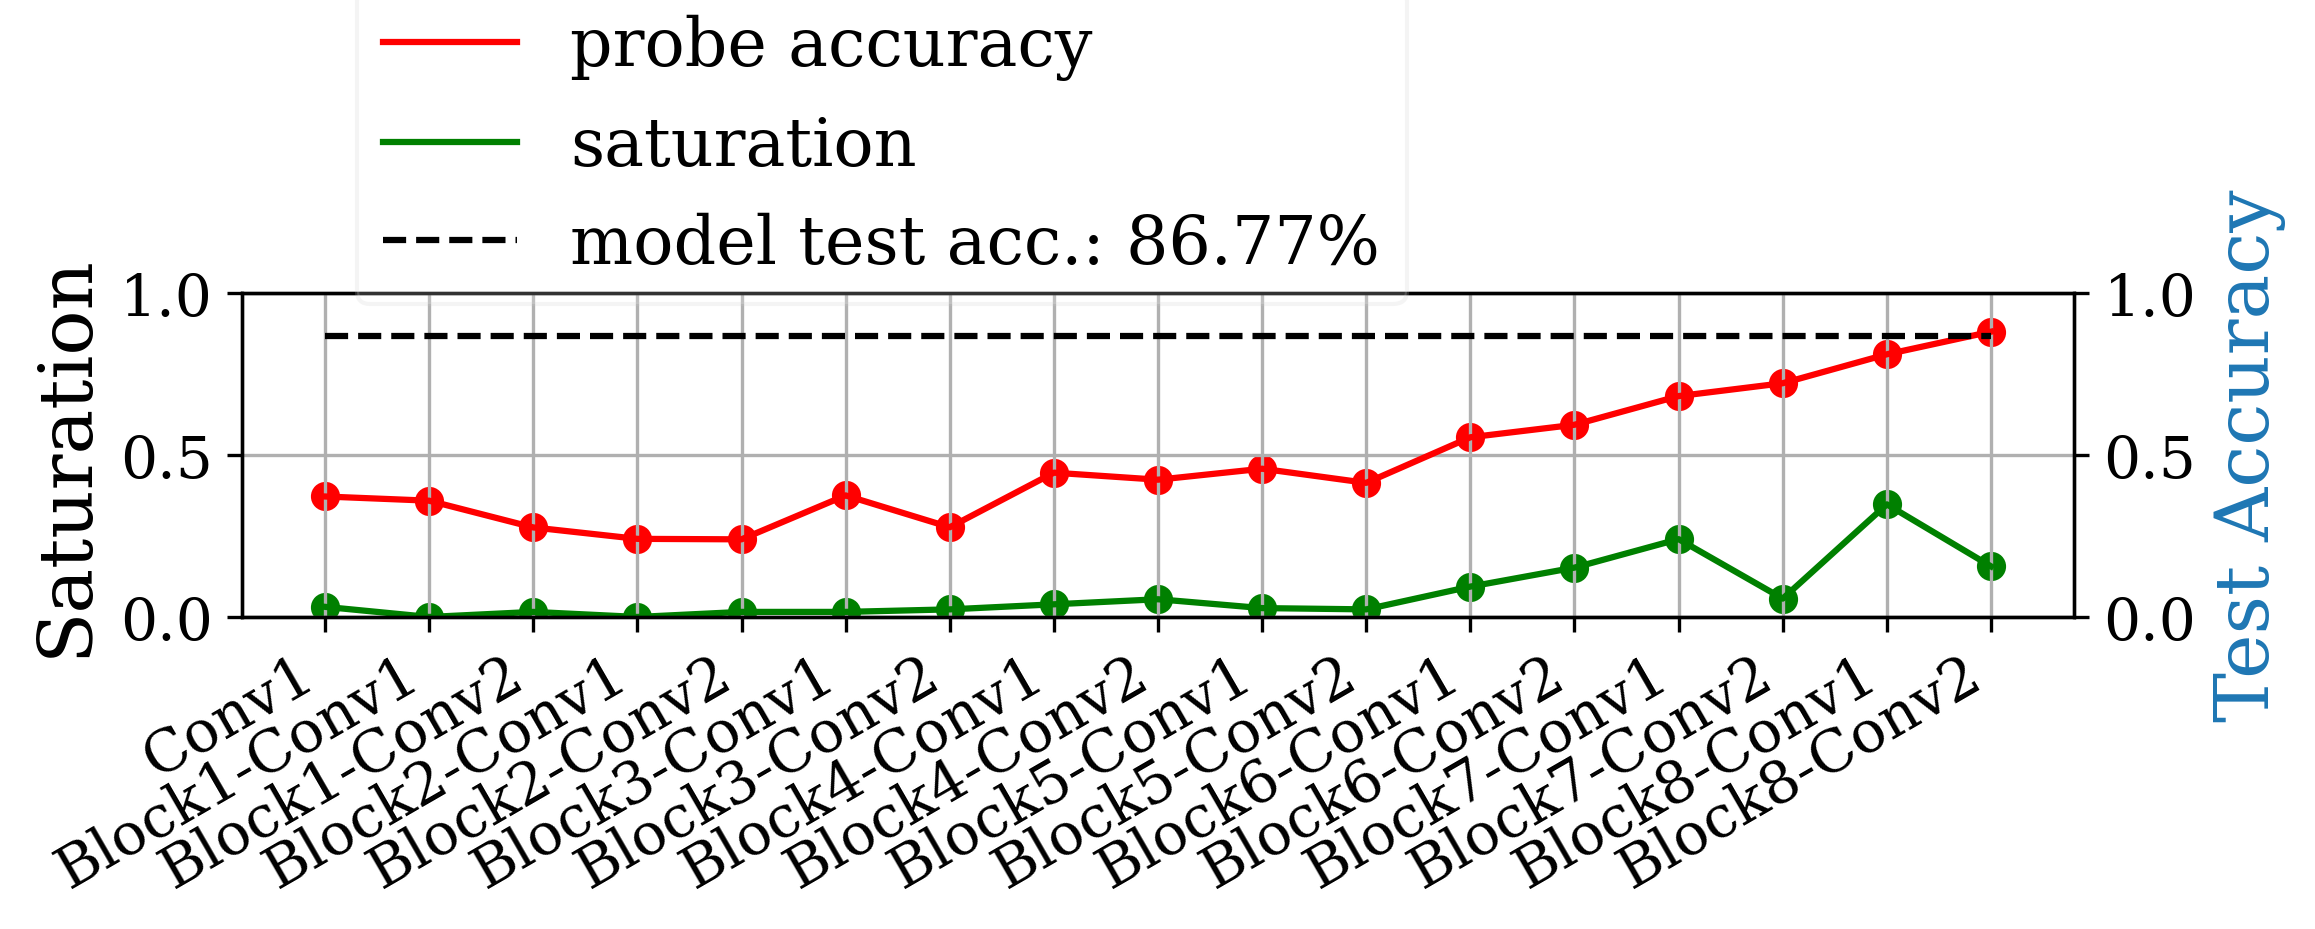

In [25]:
for model in ["ResNet18"]:
    for resolution in [32, 224, 1024]:

        dataset = "Cifar10"
        run_id = "RES"
        probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
        epochs = 60 if model == "ResNet50" else 30
        batch_size = 64

        cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
        cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
        cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
        print(cifar10_vgg_16_probes_file)
        print(cifar10_cgg_16_sat_file)

        order_mask = None

        filters = layer_filters[model]
        names = layer_names[model]

        probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
        #plt.title('ResNet18NoSkip trained on BigCifar10')
        plt.tight_layout()
        savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
        plt.savefig(savepath, bbox_inches='tight')
        plt.show()

./logs/VGG16/Cifar10_32/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_32/RES/VGG16-Cifar10-r32-bs64-e30.csv


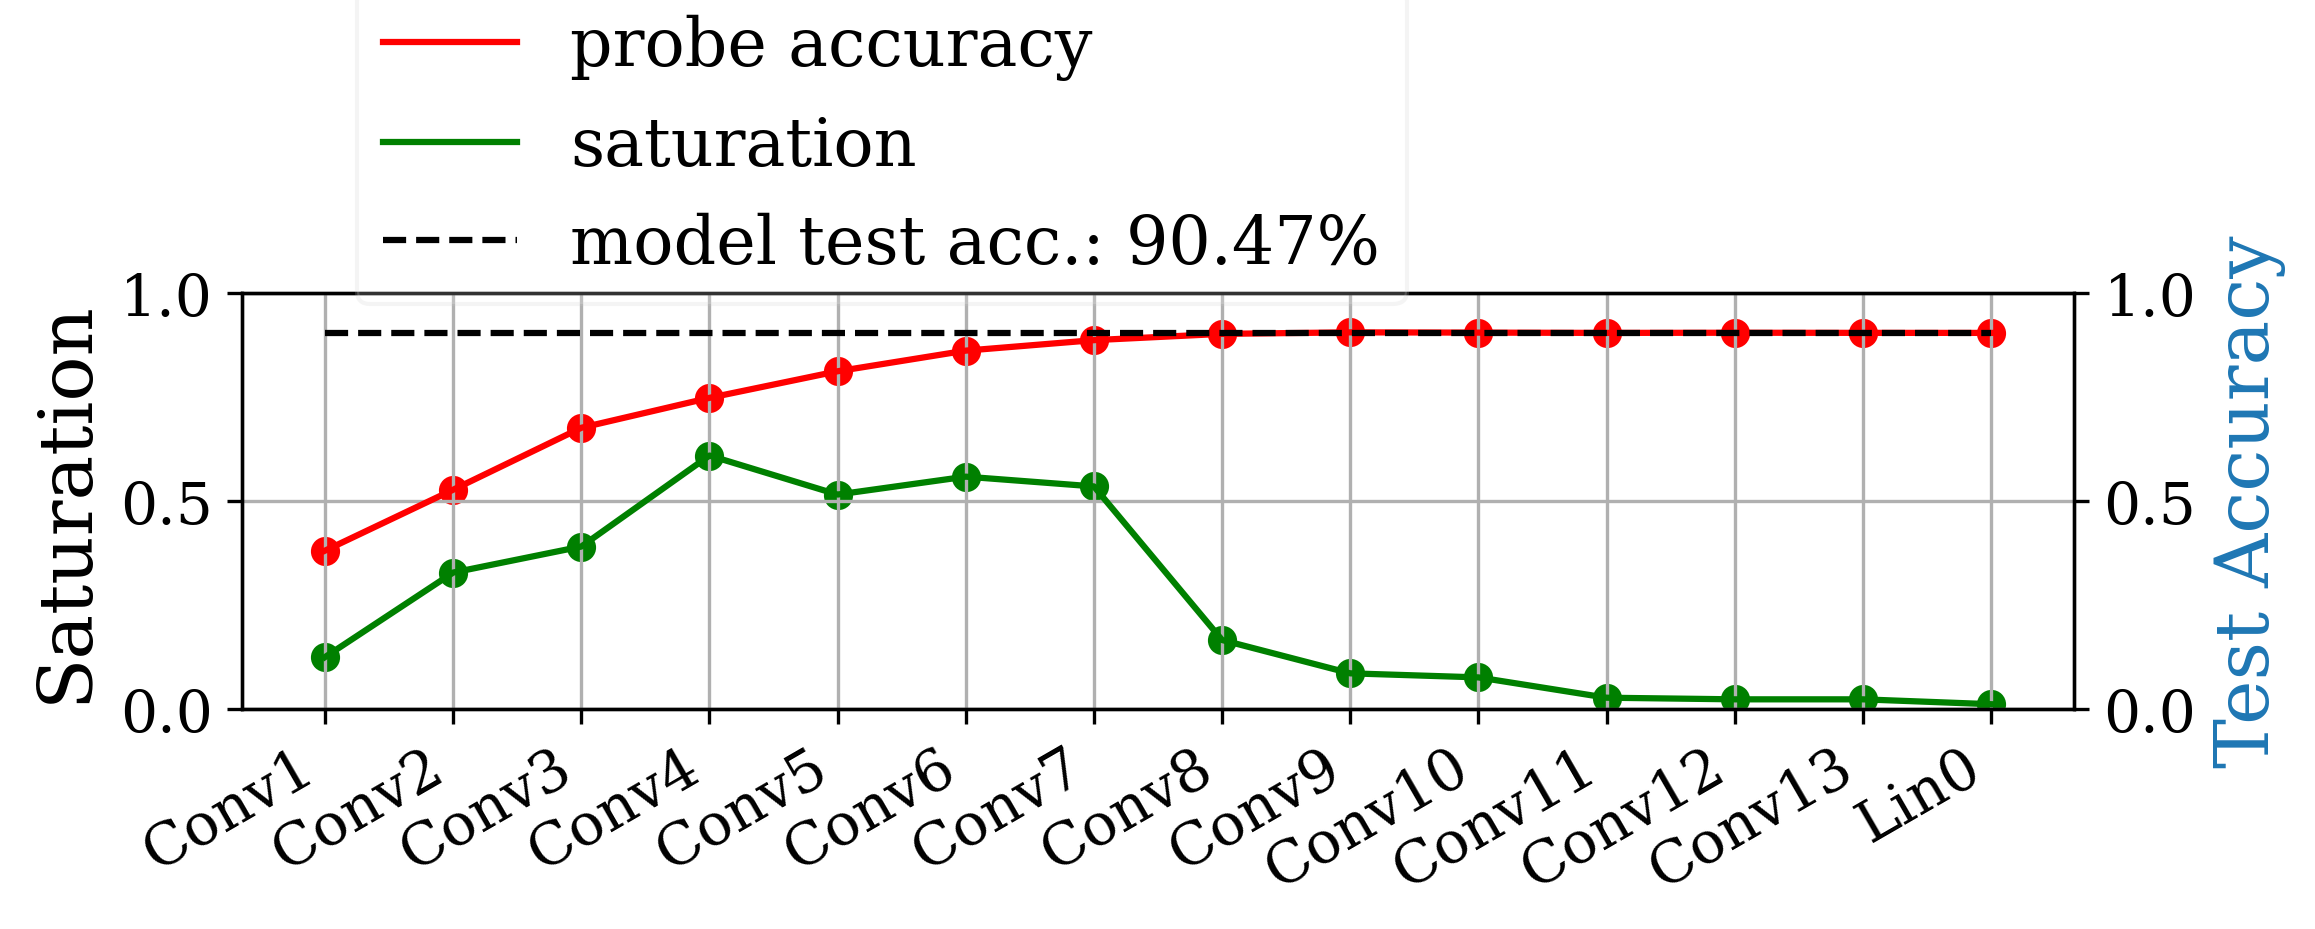

./logs/VGG16/Cifar10_224/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_224/RES/VGG16-Cifar10-r224-bs64-e30.csv


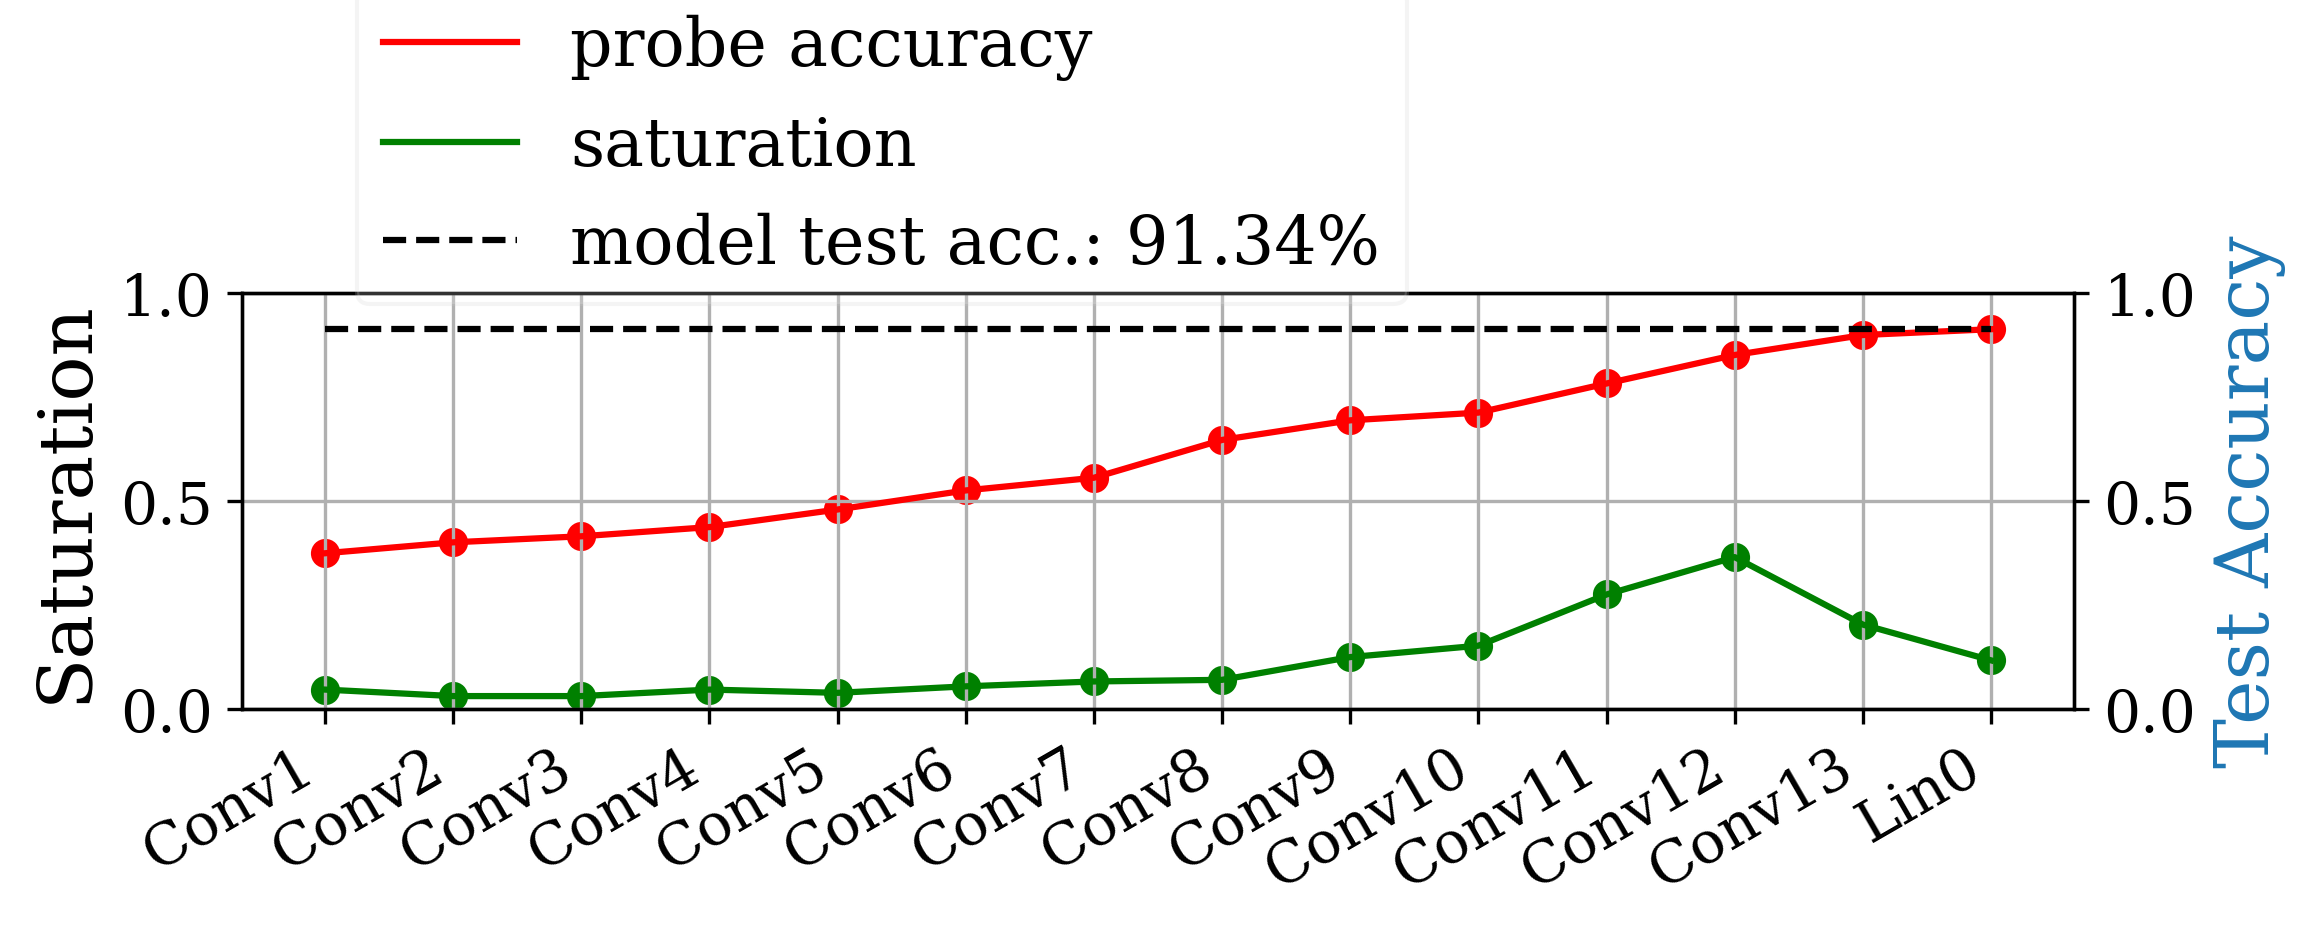

./logs/VGG16/Cifar10_1024/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_1024/RES/VGG16-Cifar10-r1024-bs20-e30.csv


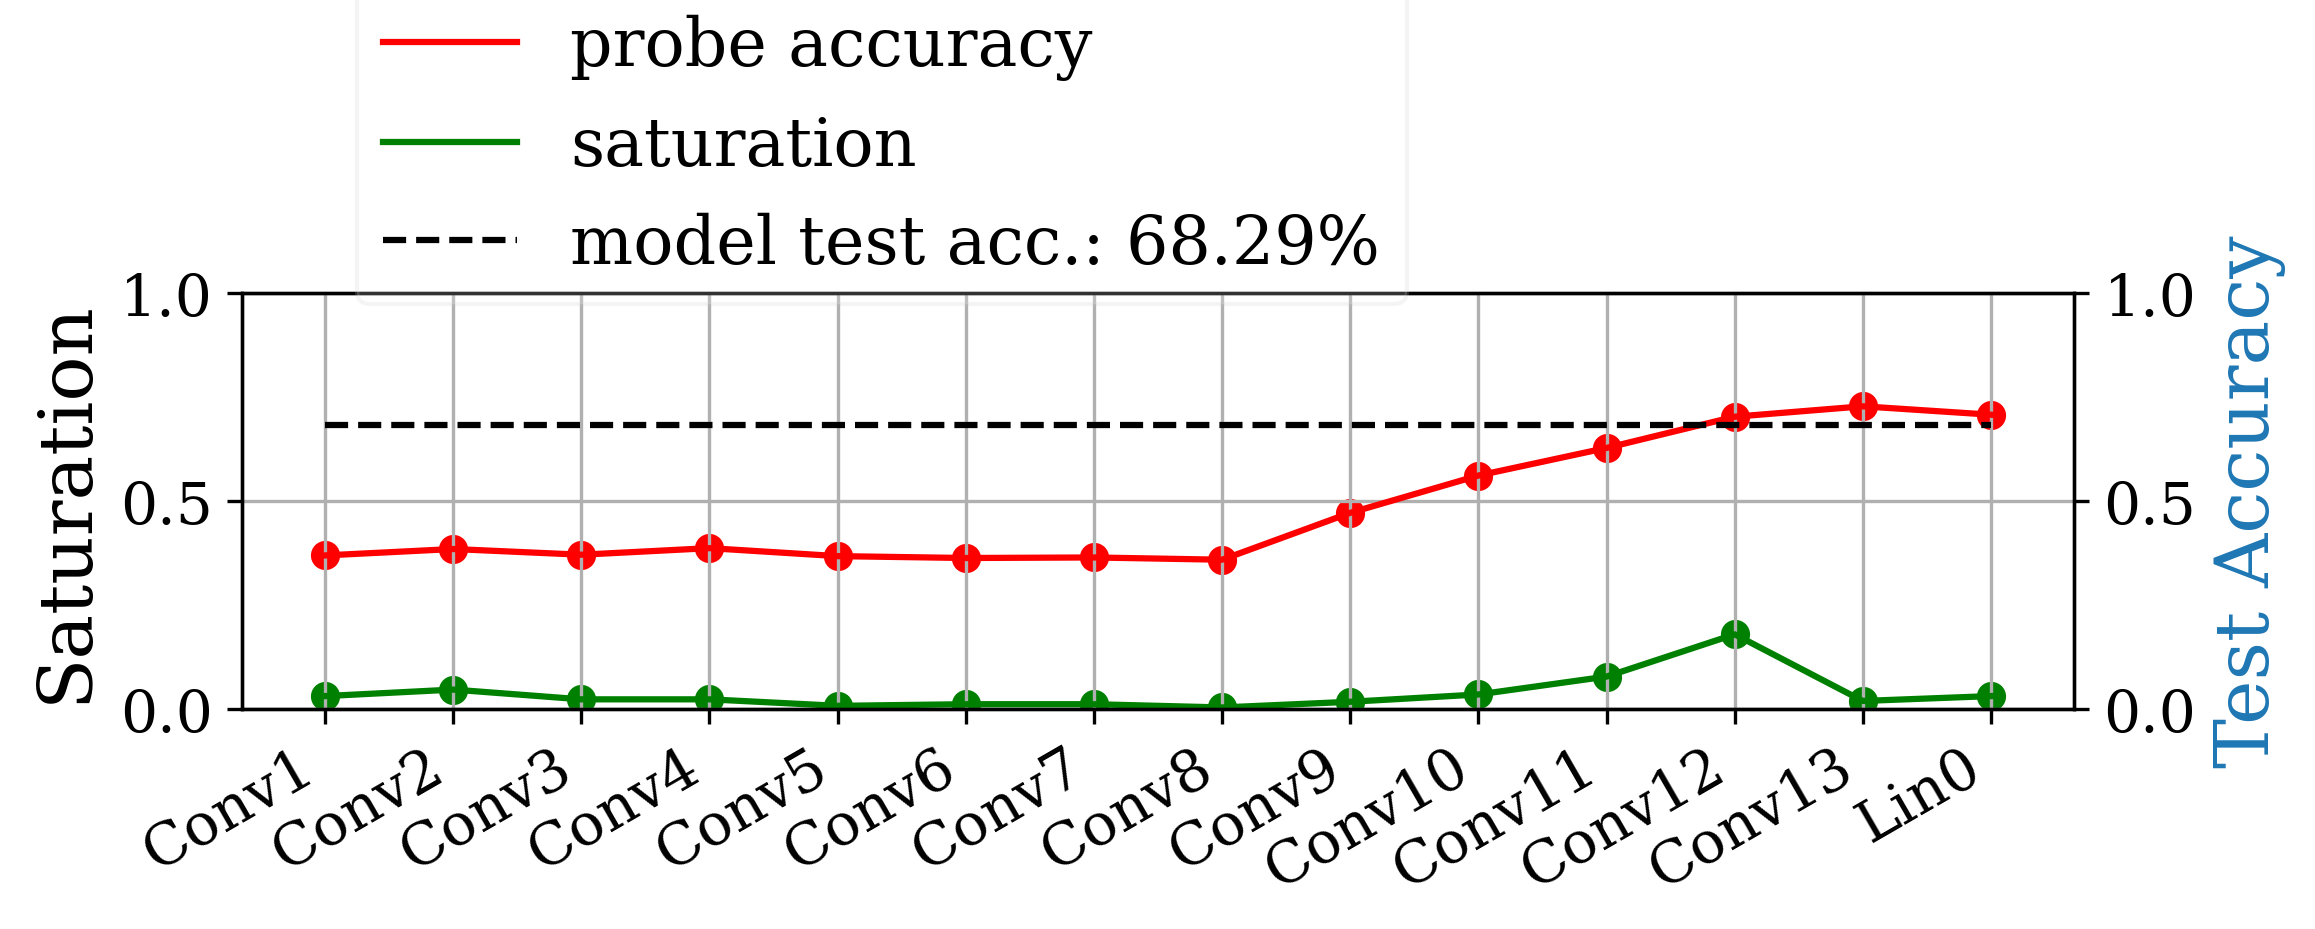

In [26]:
for model in ["VGG16"]:
    for resolution in [32, 224, 1024]:

        dataset = "Cifar10"
        run_id = "RES"
        probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
        epochs = 60 if model == "ResNet50" else 30
        batch_size = 64

        cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
        cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
        cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
        print(cifar10_vgg_16_probes_file)
        print(cifar10_cgg_16_sat_file)

        order_mask = None

        filters = layer_filters[model]
        names = layer_names[model]

        probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
        #plt.title('ResNet18NoSkip trained on BigCifar10')
        plt.tight_layout()
        savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
        plt.savefig(savepath, bbox_inches='tight')
        plt.show()

./logs/VGG16/MNIST_32/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_32/RES/VGG16-MNIST-r32-bs64-e30.csv


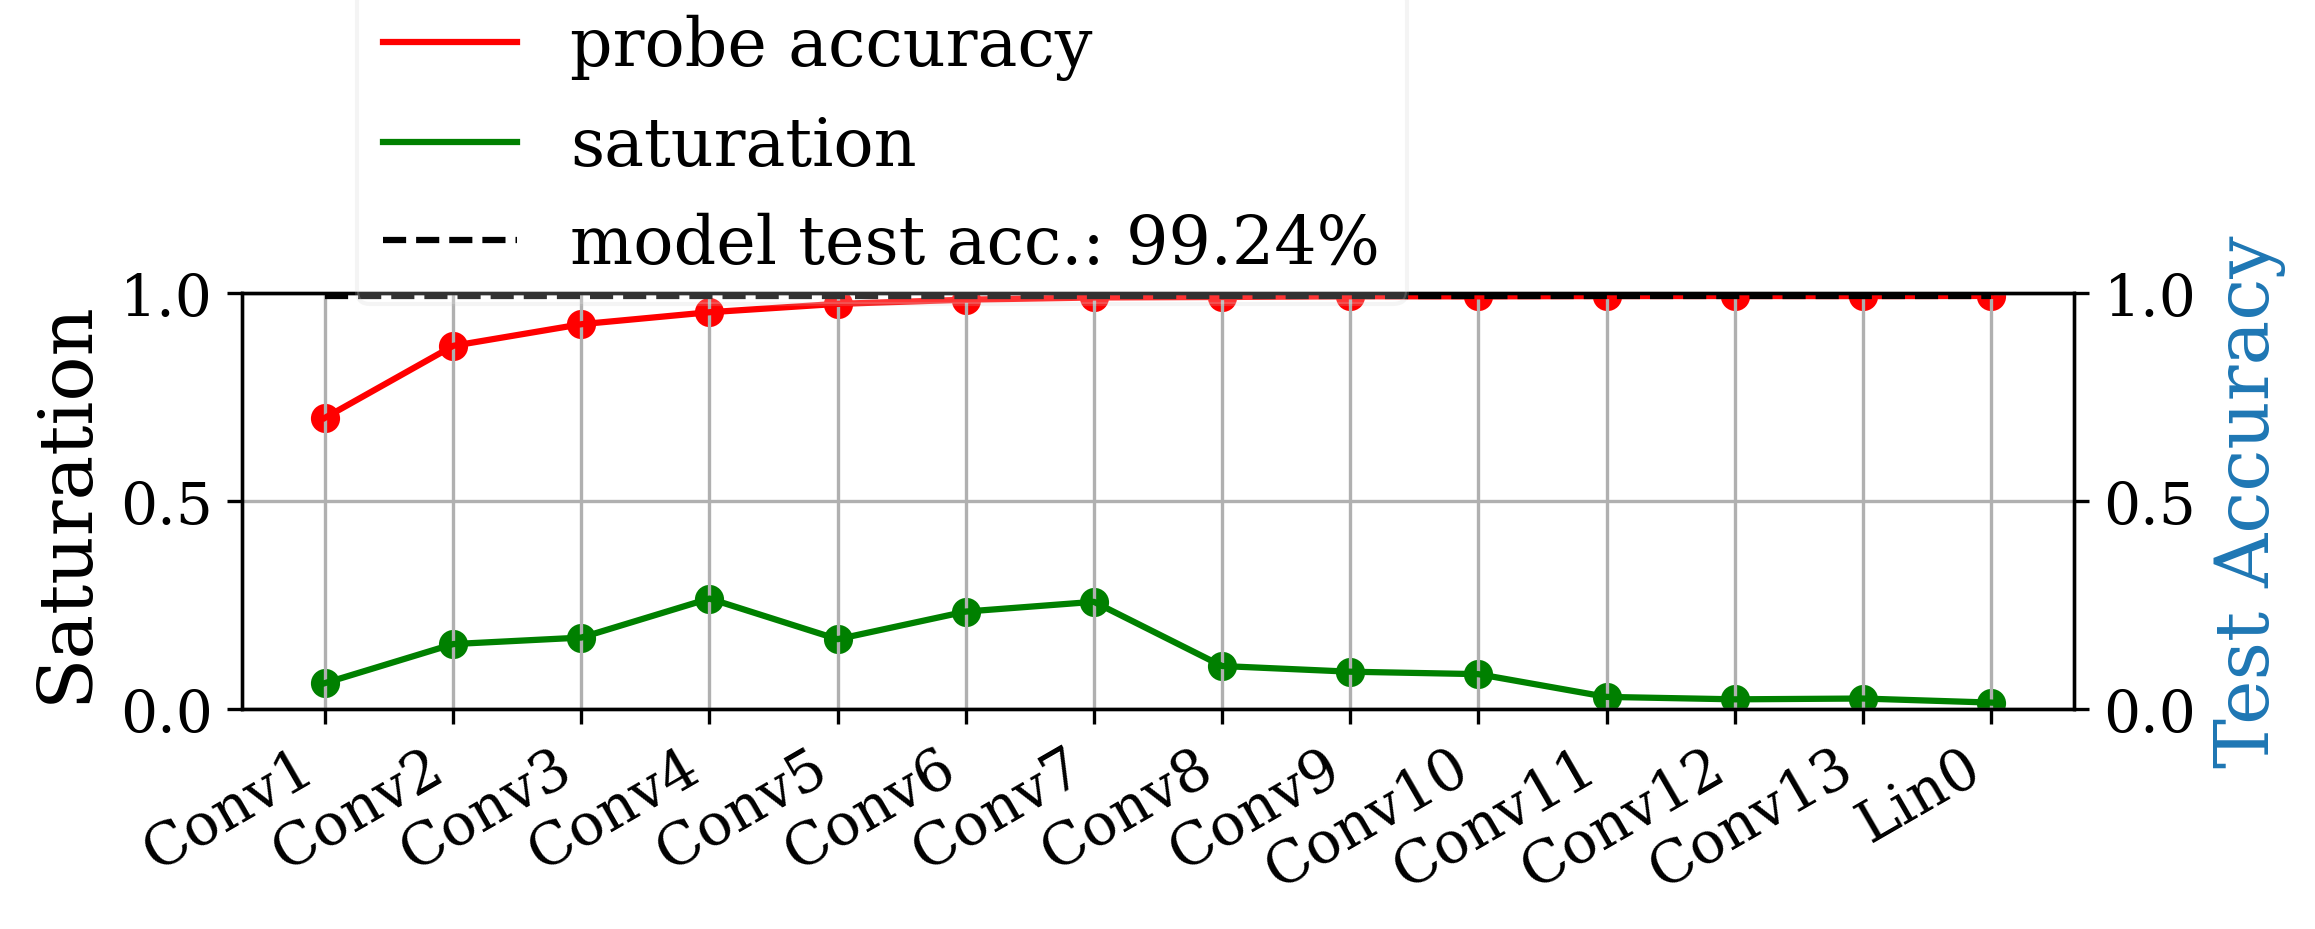

./logs/VGG16/MNIST_160/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_160/RES/VGG16-MNIST-r160-bs64-e30.csv


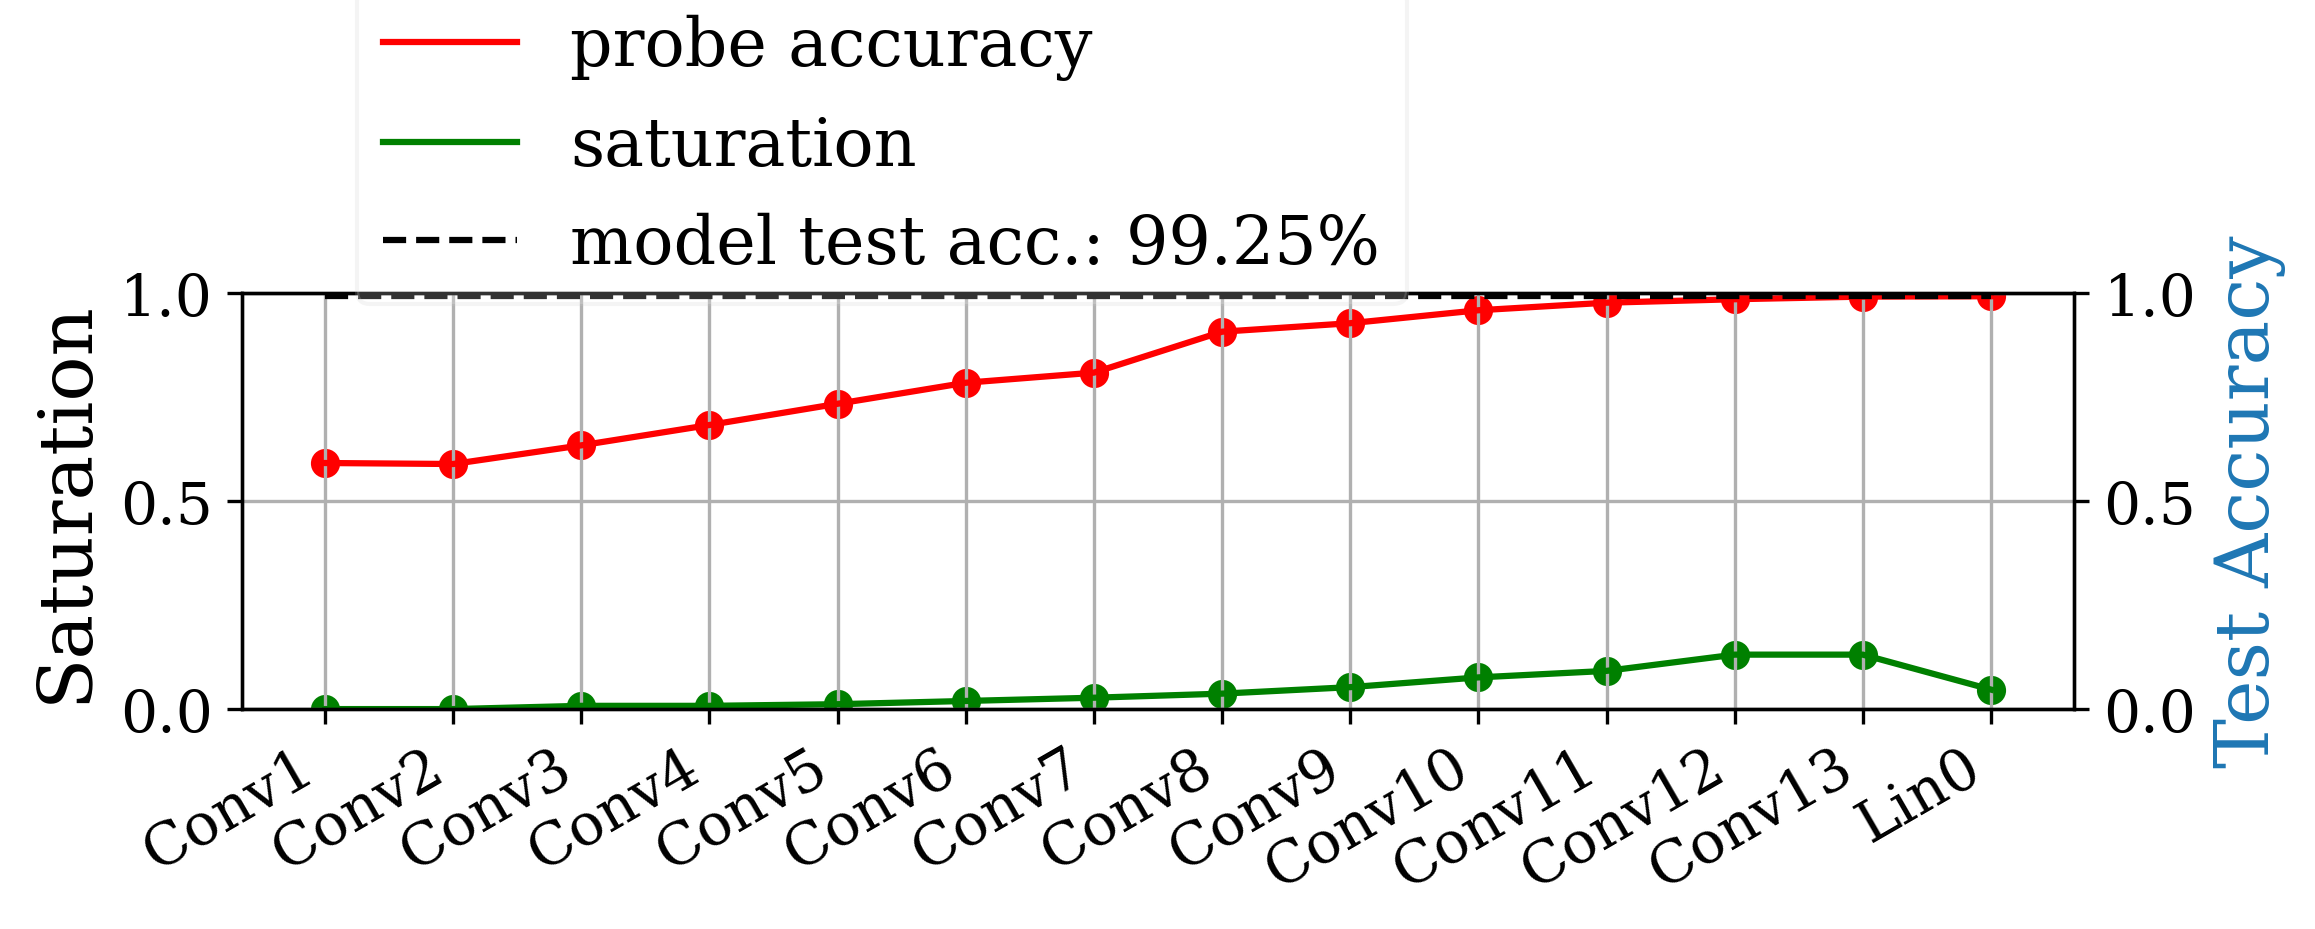

./logs/VGG16/MNIST_1024/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_1024/RES/VGG16-MNIST-r1024-bs20-e30.csv


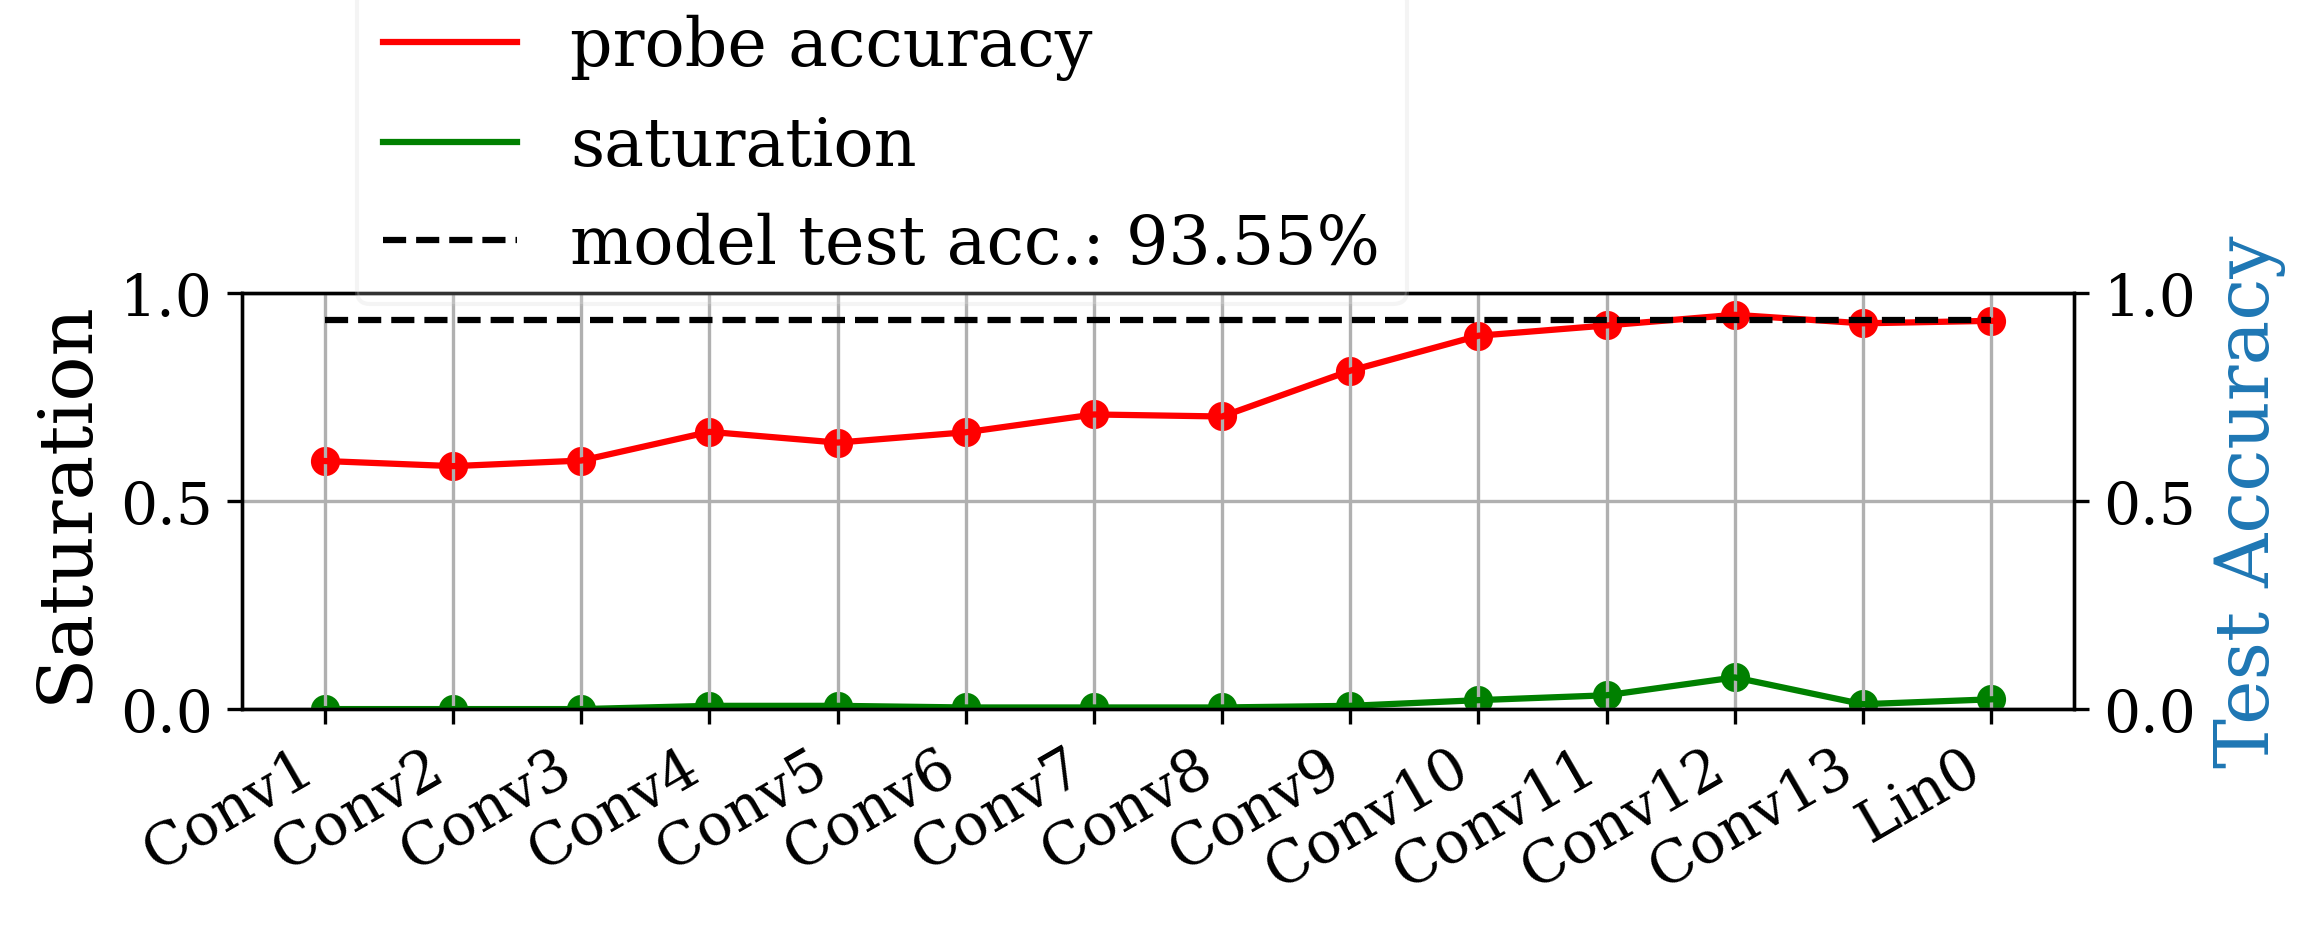

In [27]:
for model in ["VGG16"]:
    for resolution in [32, 160, 1024]:

        dataset = "MNIST"
        run_id = "RES"
        probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
        epochs = 60 if model == "ResNet50" else 30
        batch_size = 64

        cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
        cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
        cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
        print(cifar10_vgg_16_probes_file)
        print(cifar10_cgg_16_sat_file)

        order_mask = None

        filters = layer_filters[model]
        names = layer_names[model]

        probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
        #plt.title('ResNet18NoSkip trained on BigCifar10')
        plt.tight_layout()
        savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
        plt.savefig(savepath, bbox_inches='tight')
        plt.show()

## Section 3.3

./logs/VGG16/Cifar10_32/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_32/RES/VGG16-Cifar10-r32-bs64-e30.csv


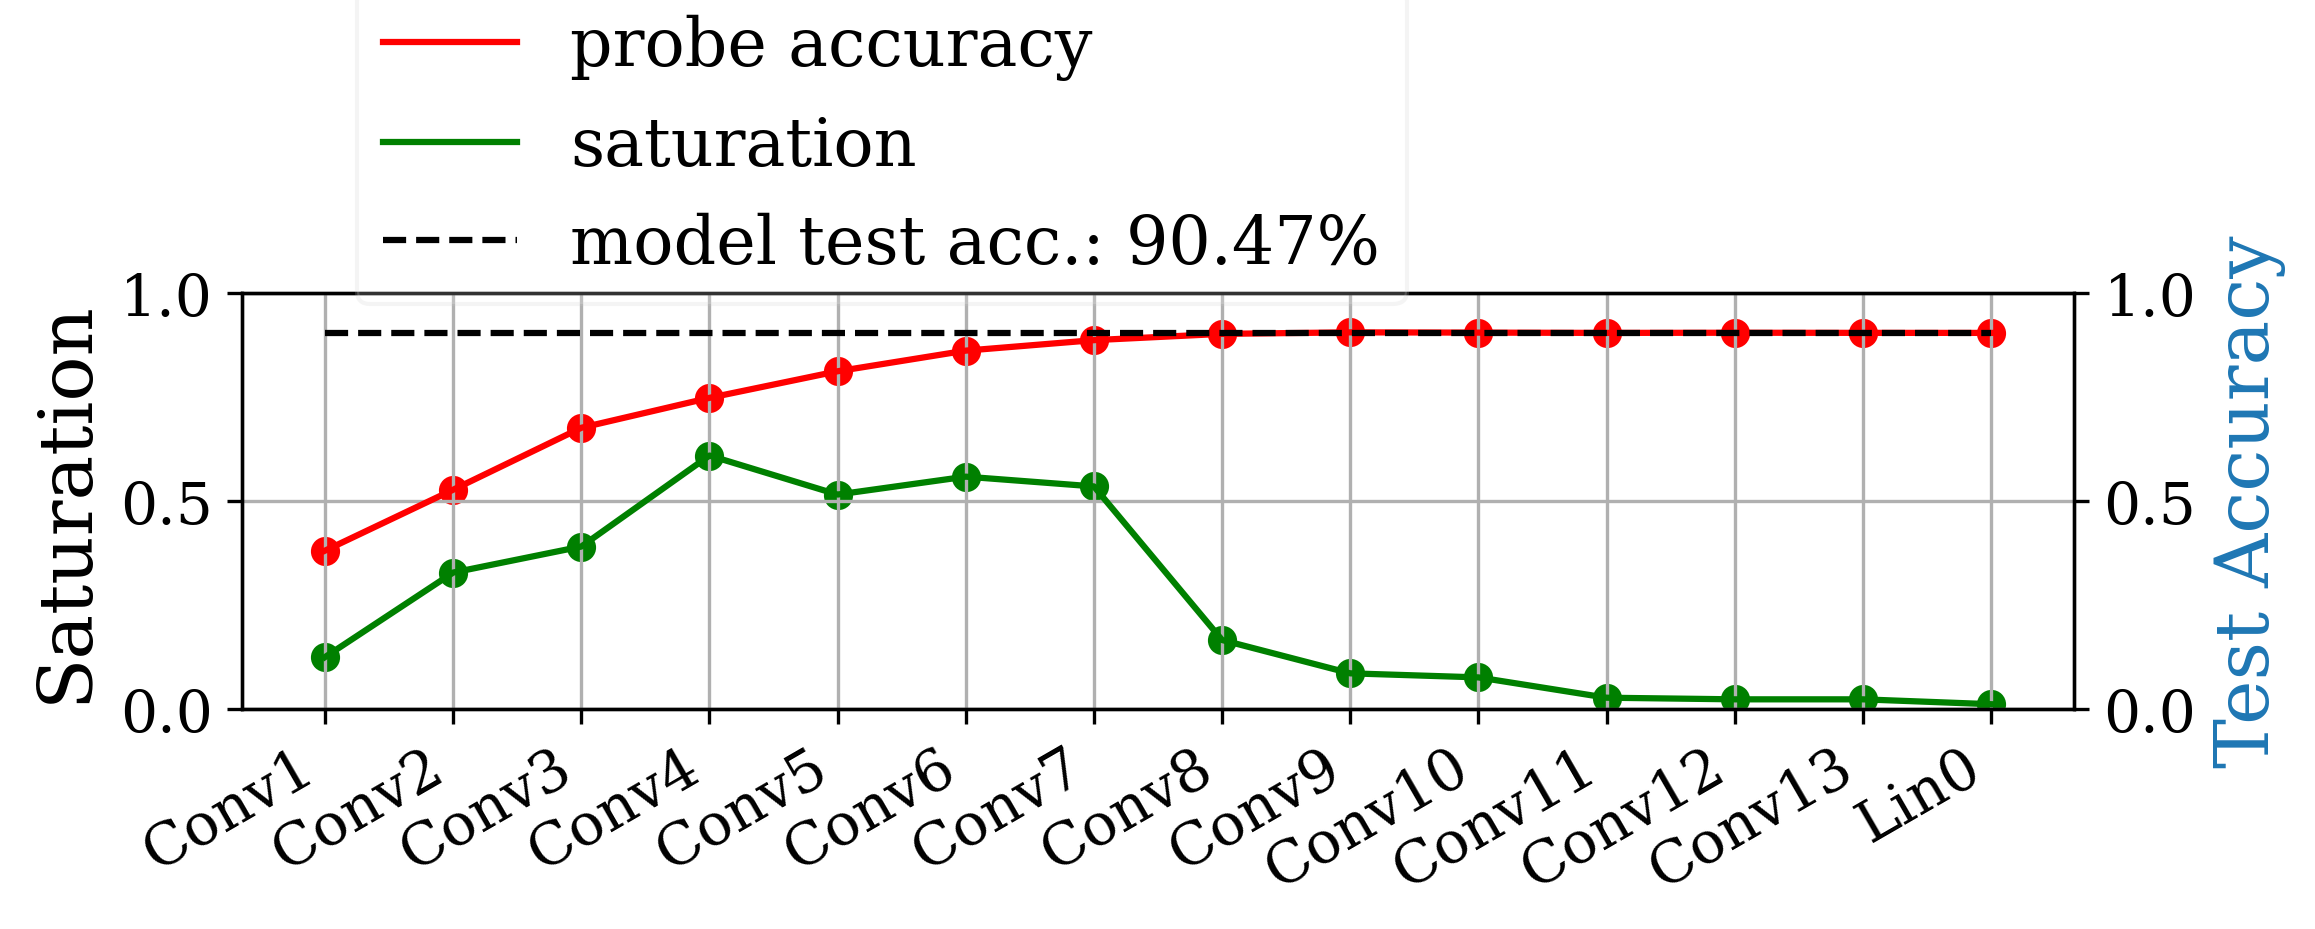

./logs/VGG16/Cifar10SmallRandomPositioning_160/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10SmallRandomPositioning_160/RES/VGG16-Cifar10SmallRandomPositioning-r160-bs64-e30.csv


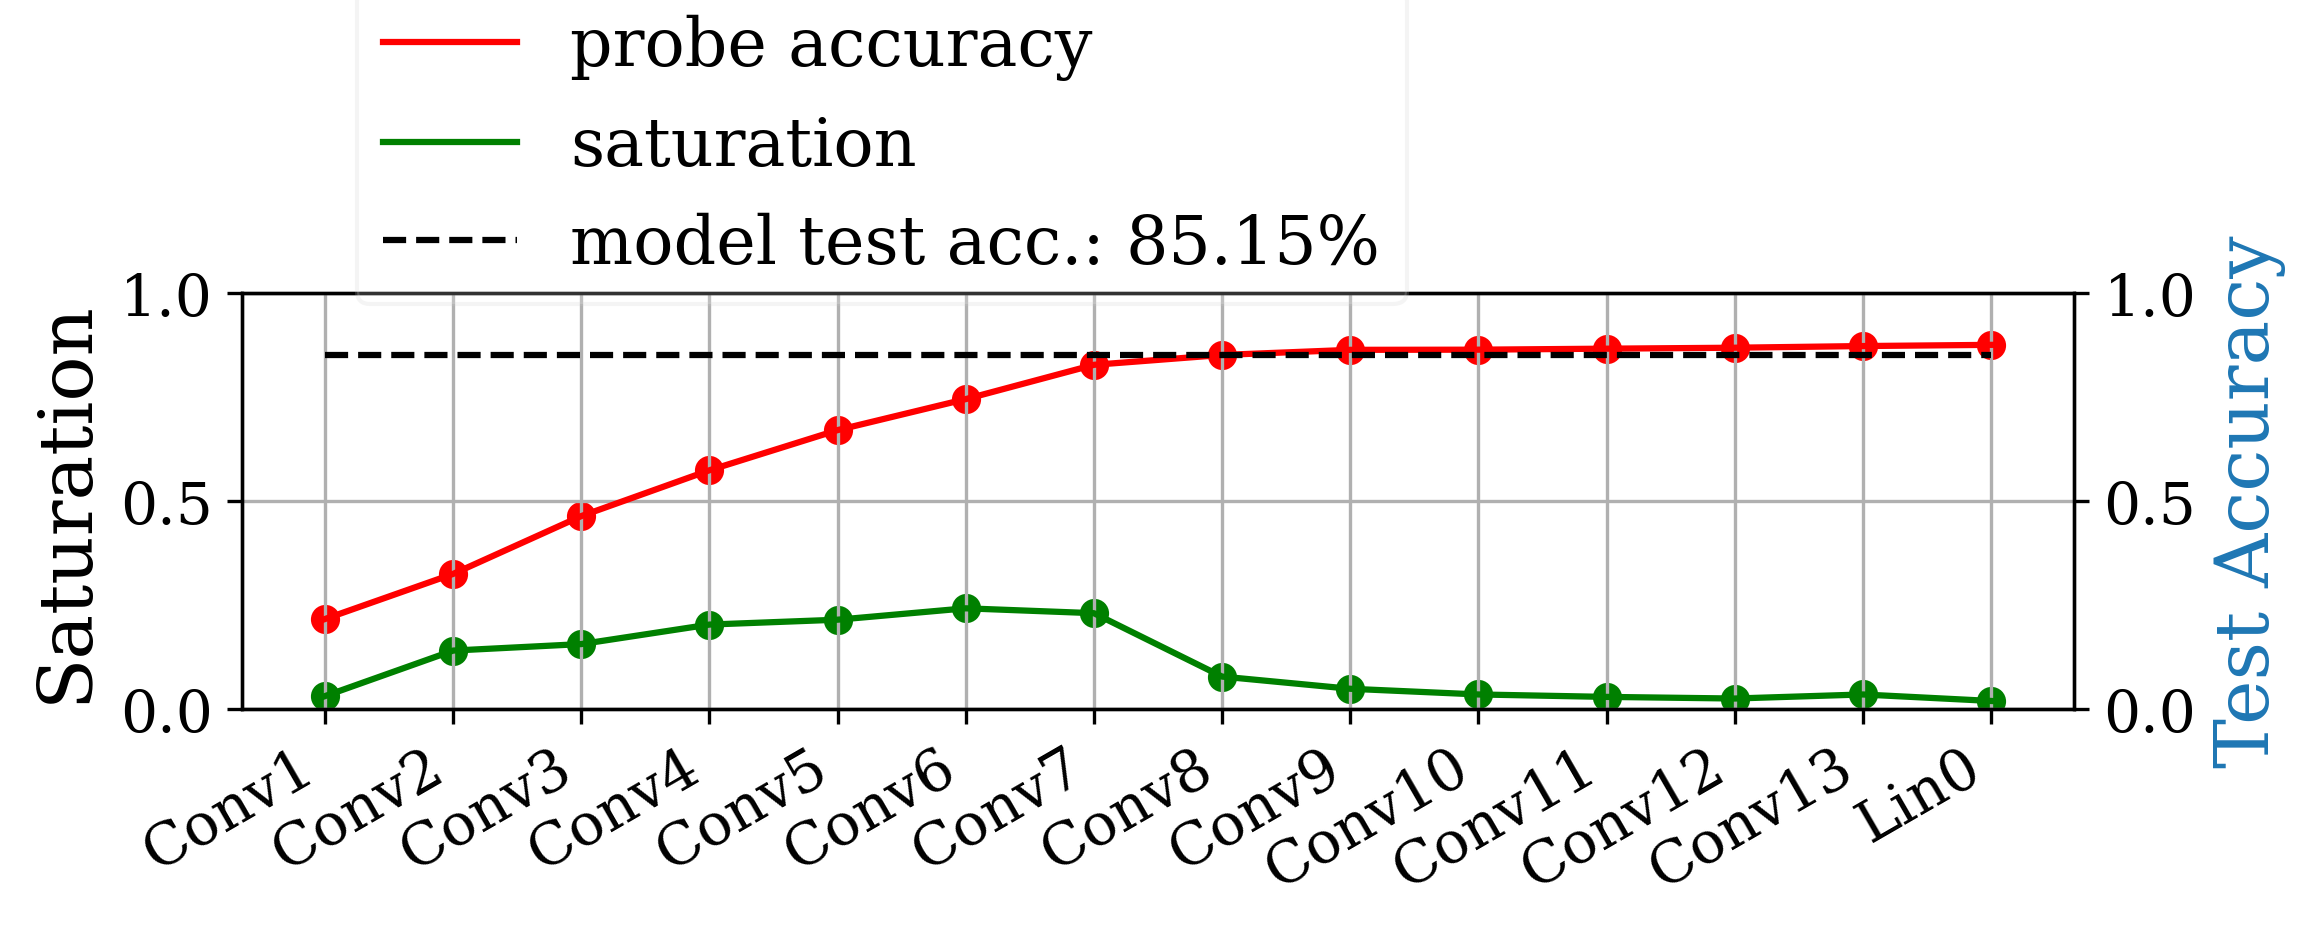

./logs/VGG16/Cifar10_160/RES/4x4_probe_performances.csv
./logs/VGG16/Cifar10_160/RES/VGG16-Cifar10-r160-bs64-e30.csv


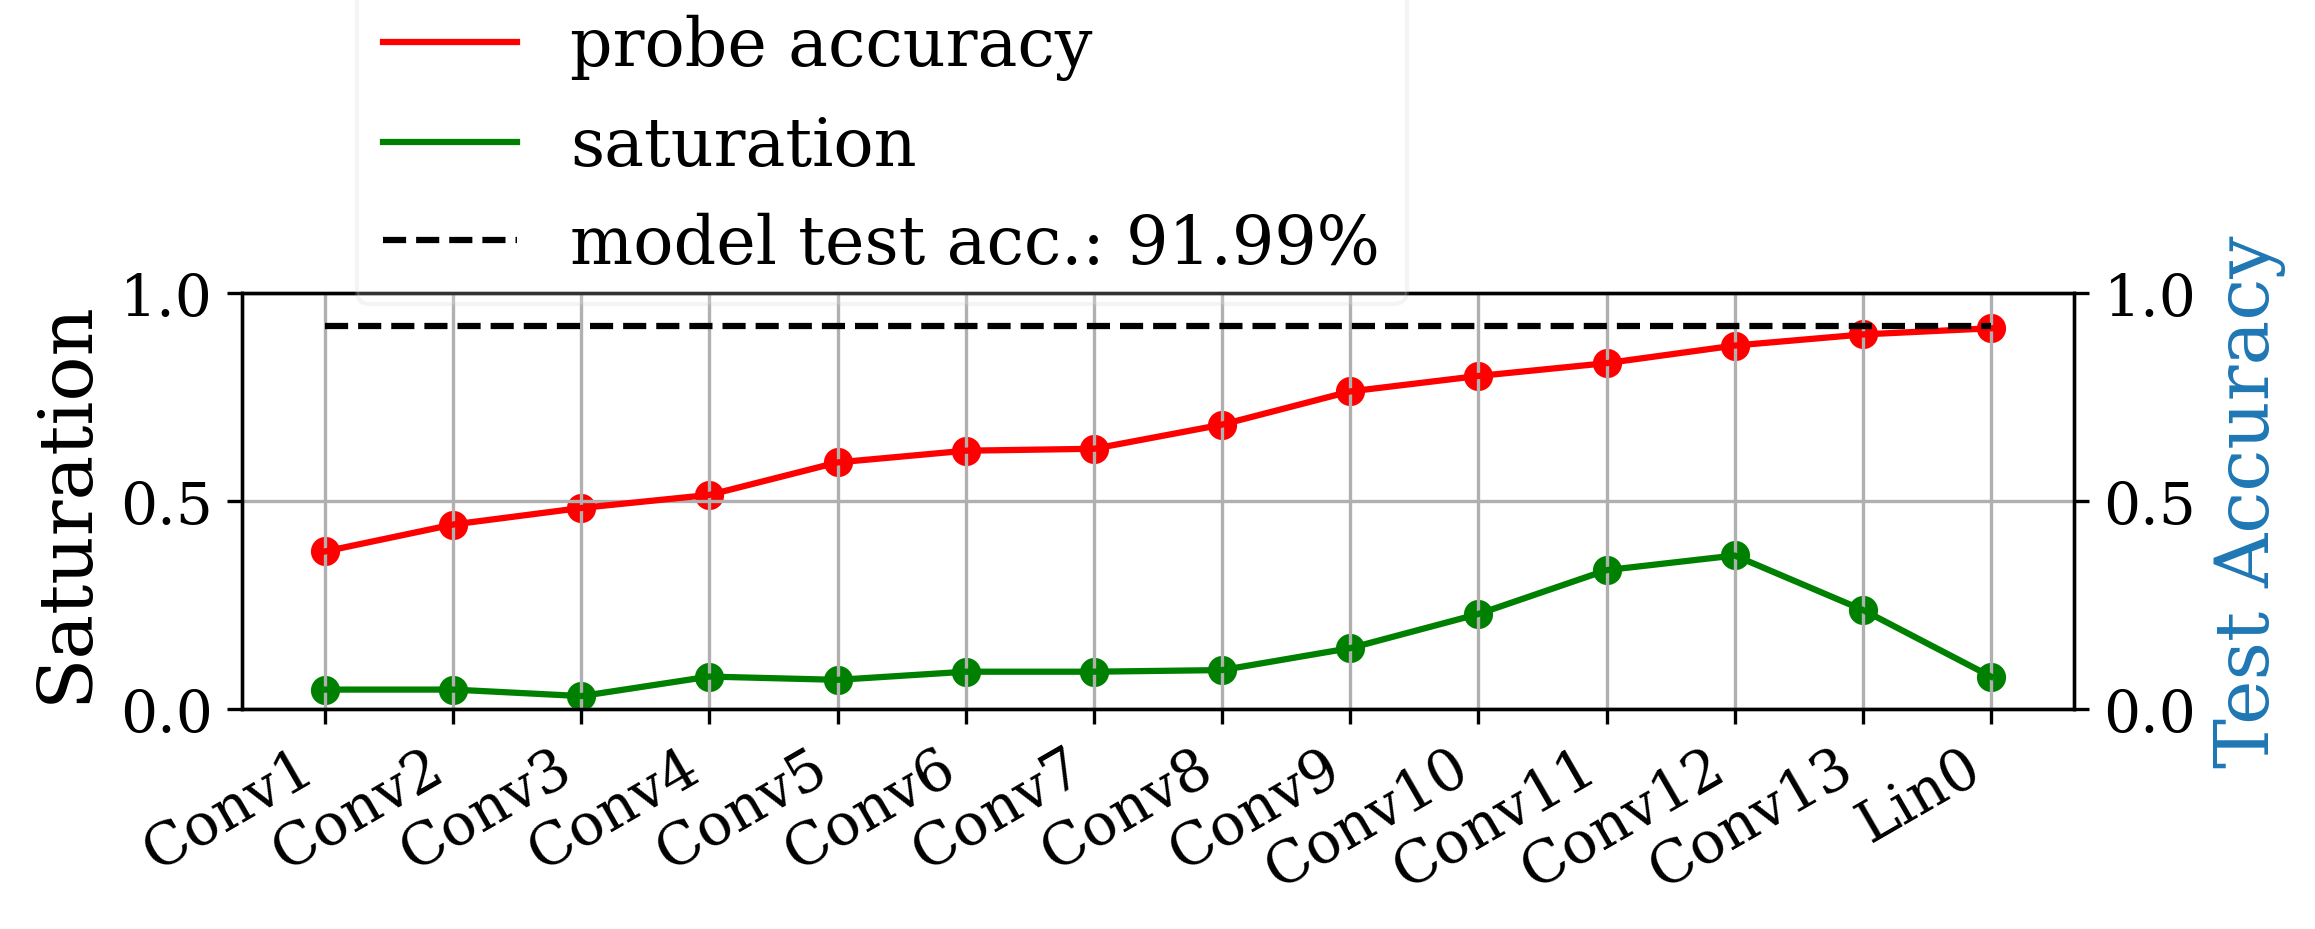

In [28]:
setups = [ ("VGG16", 32, "Cifar10"), 
          ("VGG16", 160, "Cifar10SmallRandomPositioning"), 
          ("VGG16", 160, "Cifar10")]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
   
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')

    plt.show()

./logs/VGG16/MNIST_32/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_32/RES/VGG16-MNIST-r32-bs64-e30.csv


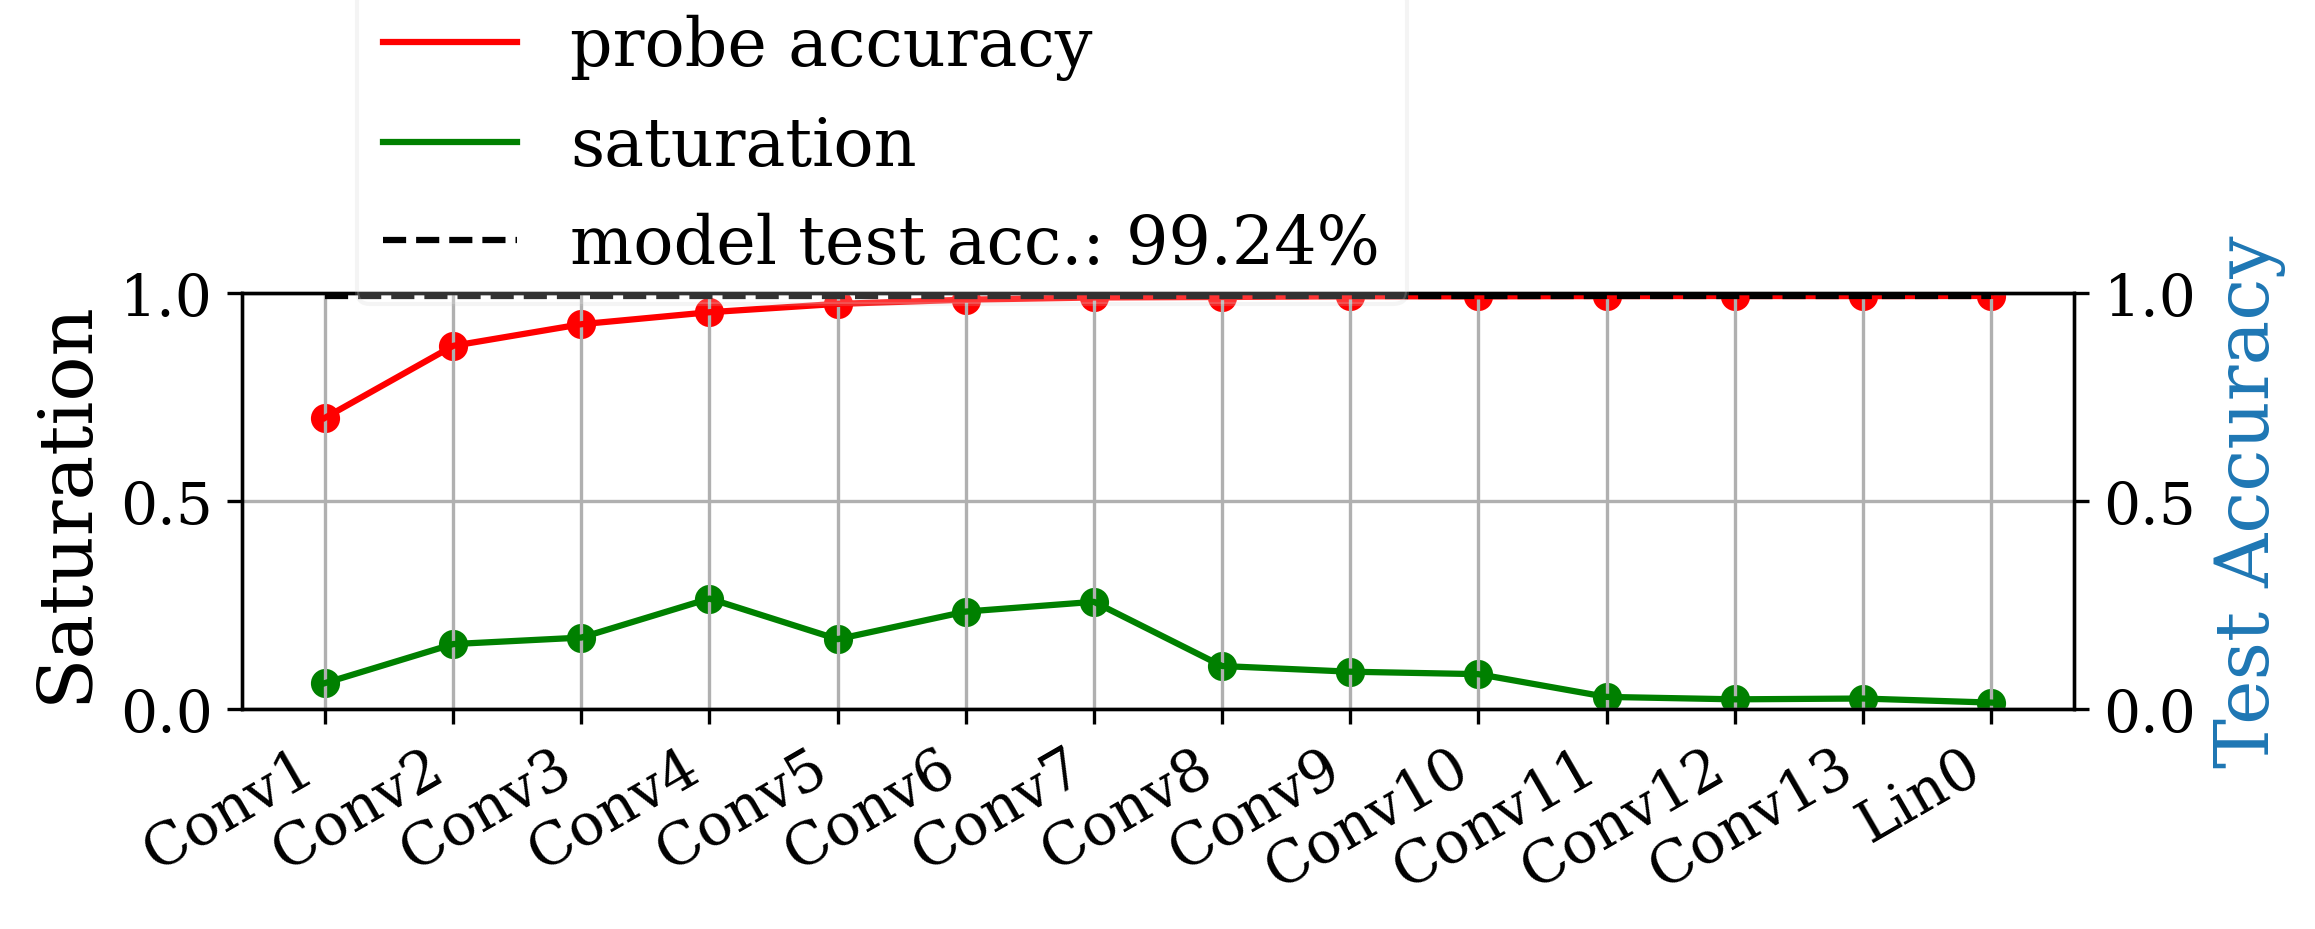

./logs/VGG16/MNISTSmallRandomPositioning_160/RES/4x4_probe_performances.csv
./logs/VGG16/MNISTSmallRandomPositioning_160/RES/VGG16-MNISTSmallRandomPositioning-r160-bs64-e30.csv


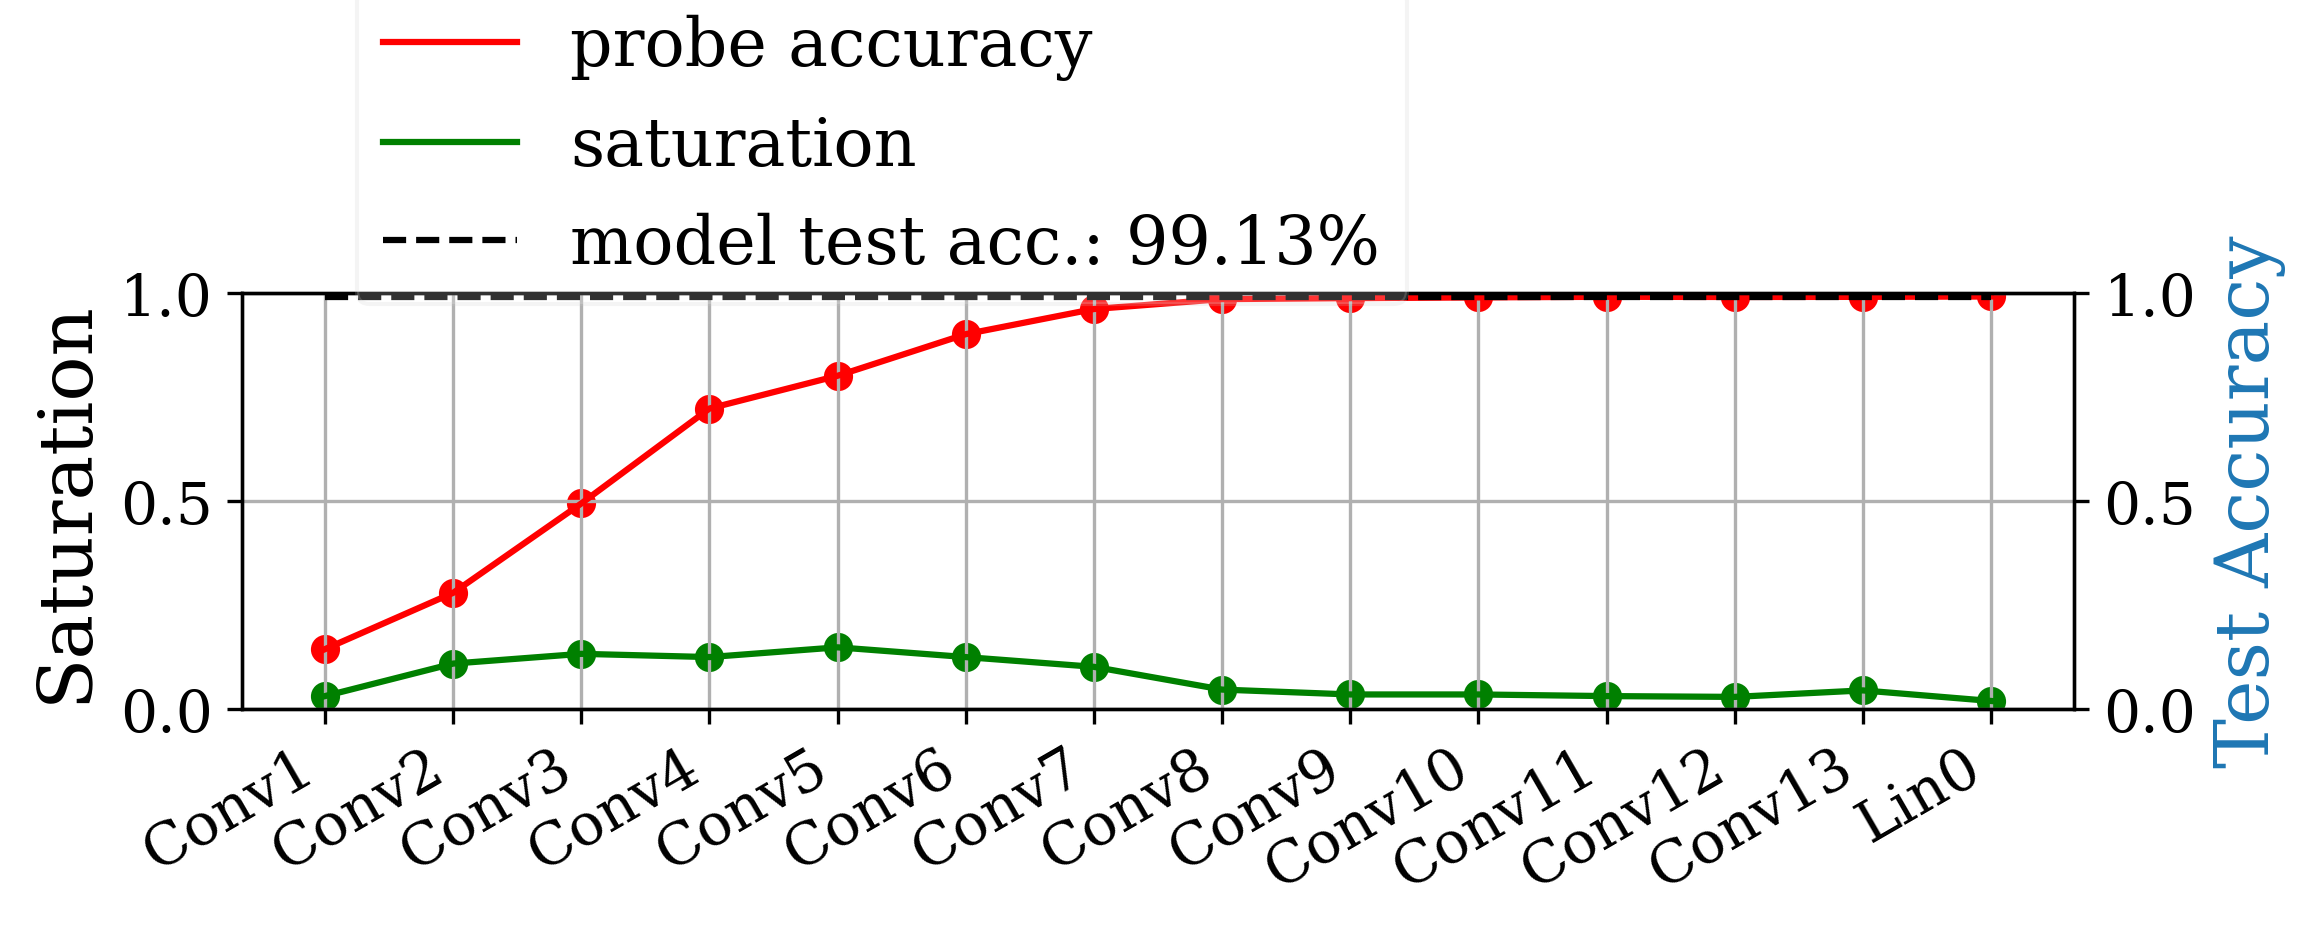

./logs/VGG16/MNIST_160/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_160/RES/VGG16-MNIST-r160-bs64-e30.csv


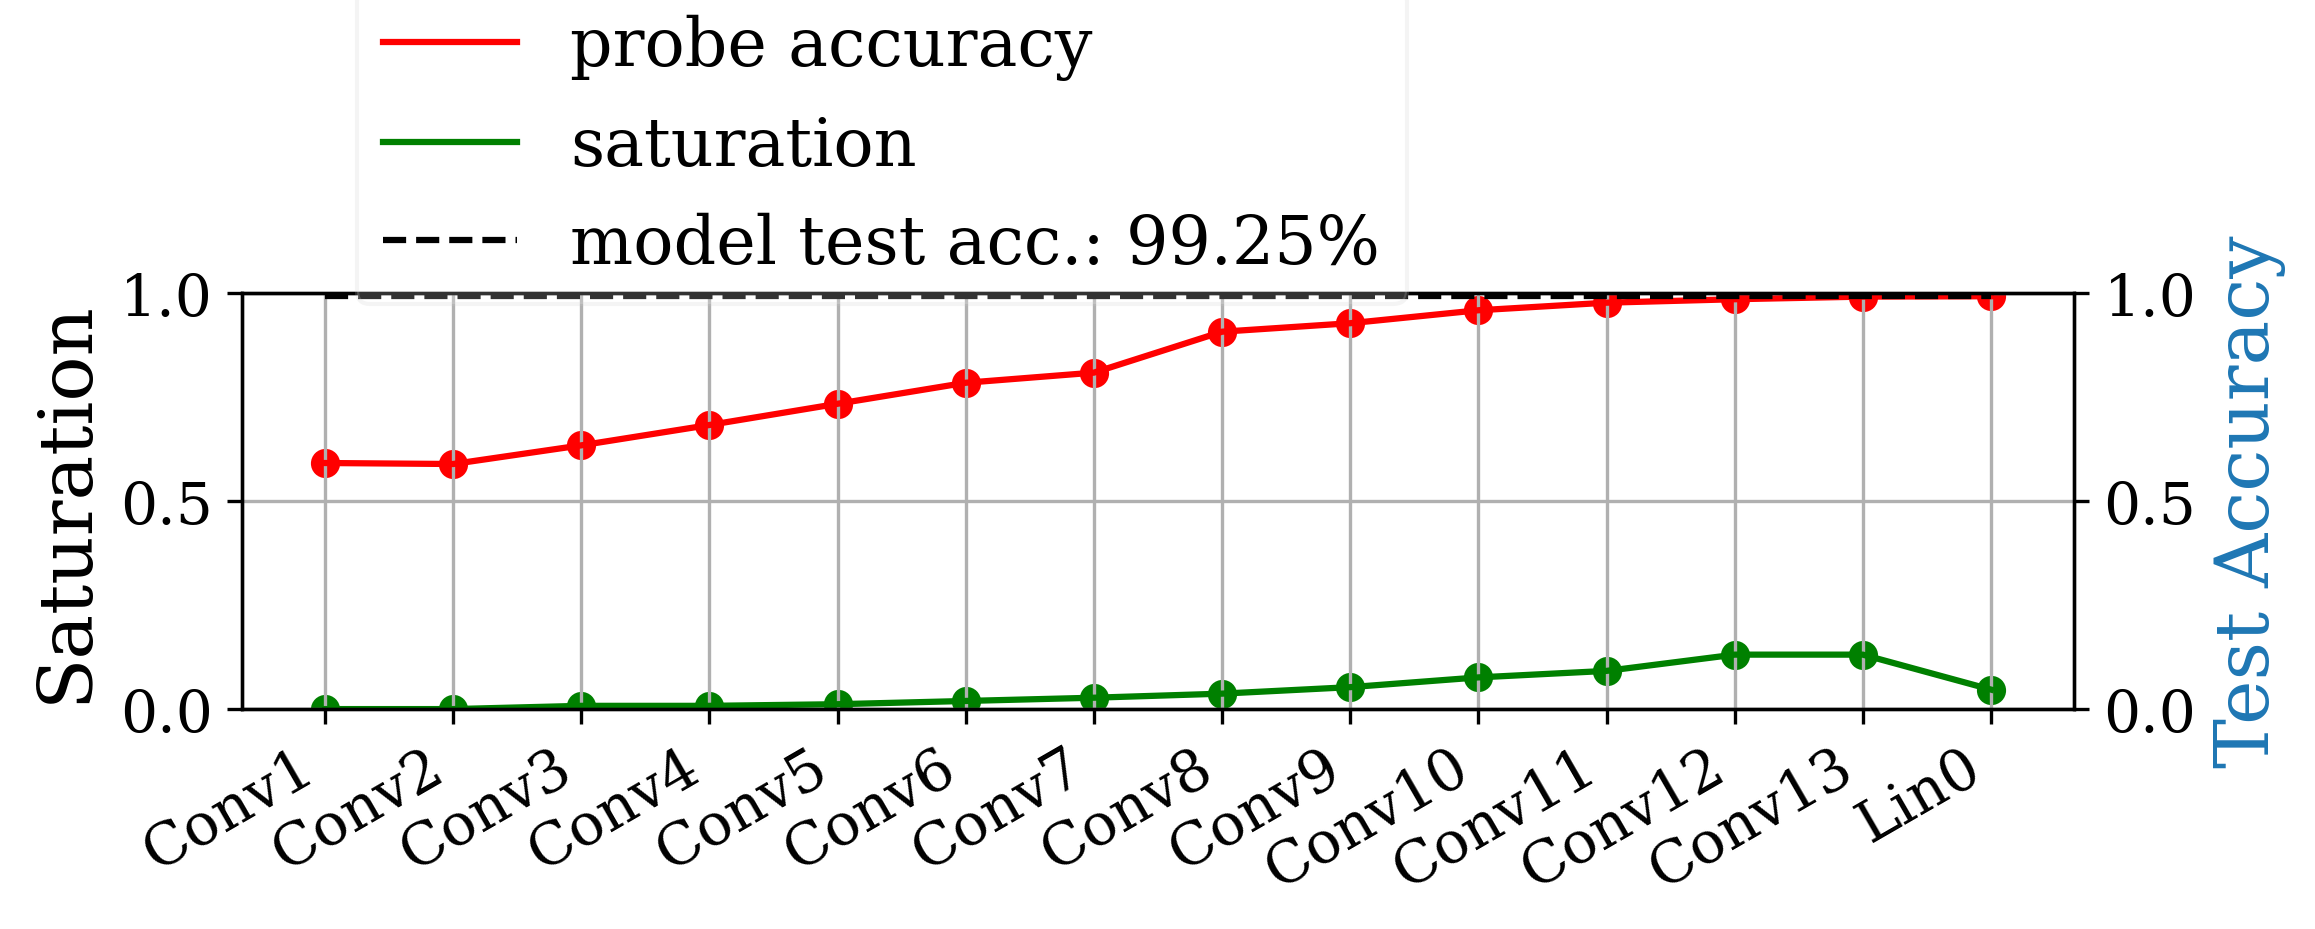

In [34]:
setups = [ ("VGG16", 32, "MNIST"), 
          ("VGG16", 160, "MNISTSmallRandomPositioning"), 
          ("VGG16", 160, "MNIST")]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
   
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')

    plt.show()

./logs/ResNet50/Cifar10_32/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10_32/RES/ResNet50-Cifar10-r32-bs64-e60.csv


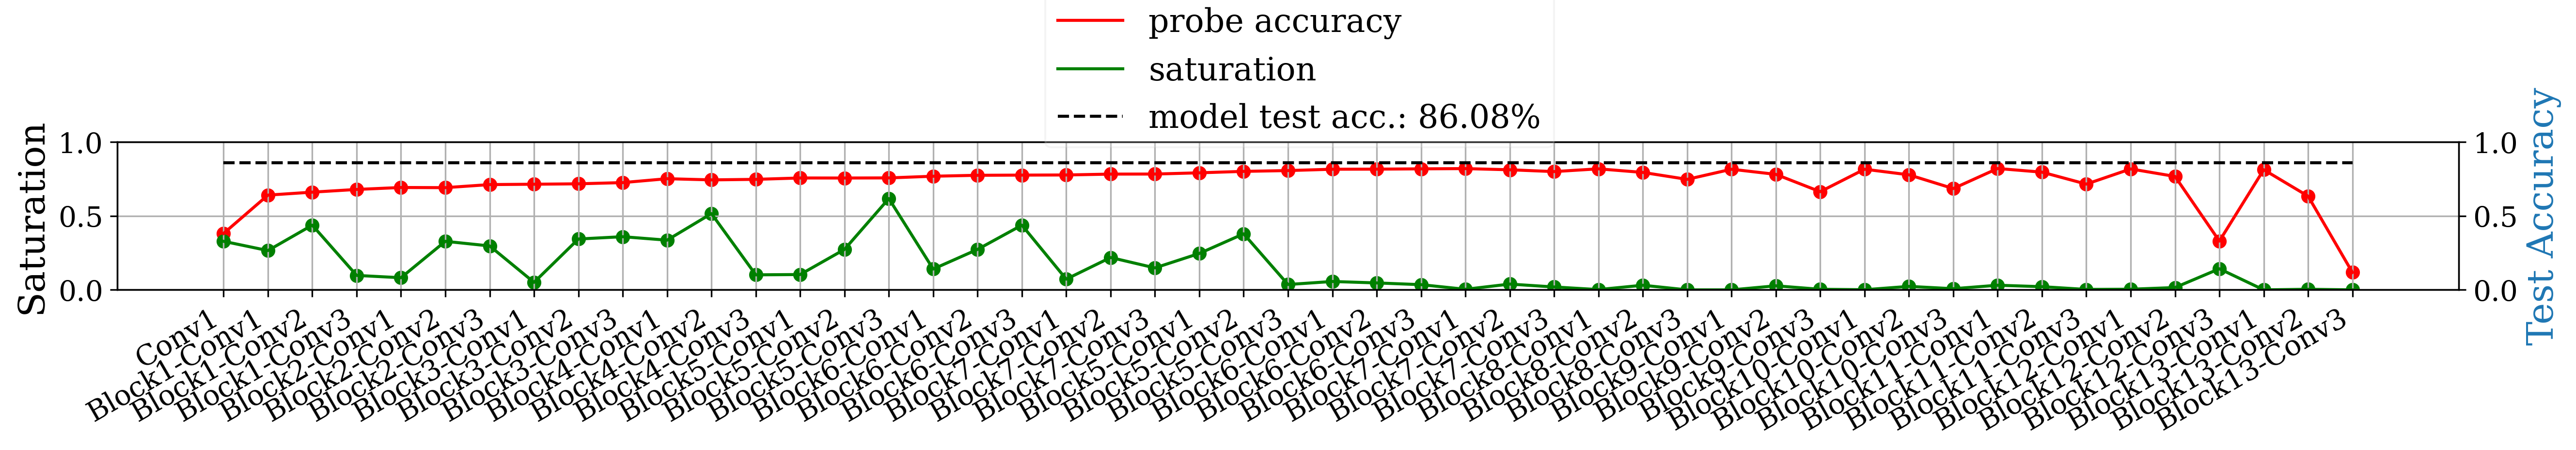

./logs/ResNet50/Cifar10SmallRandomPositioning_160/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10SmallRandomPositioning_160/RES/ResNet50-Cifar10SmallRandomPositioning-r160-bs64-e60.csv


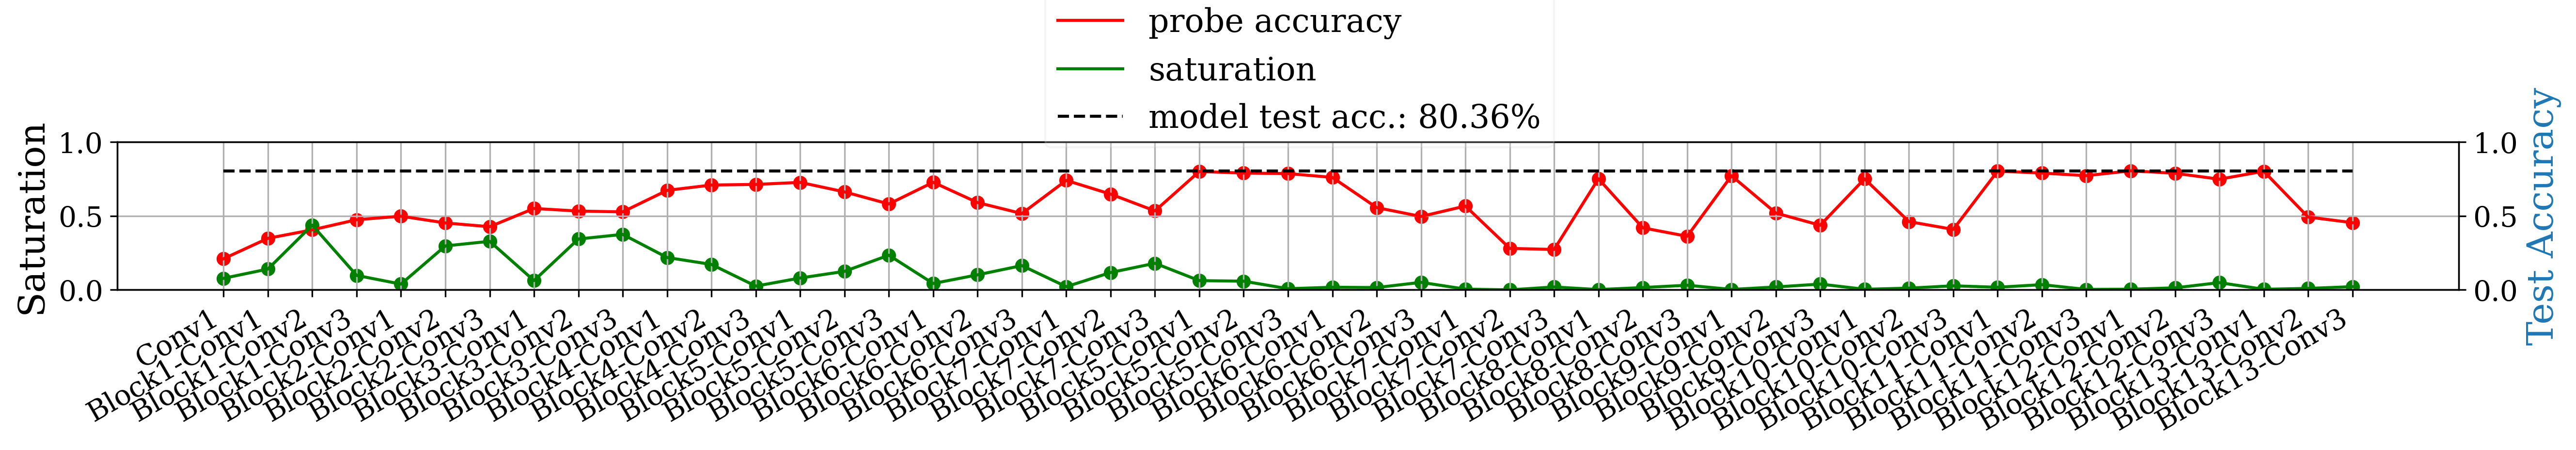

./logs/ResNet50/Cifar10_160/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10_160/RES/ResNet50-Cifar10-r160-bs64-e60.csv


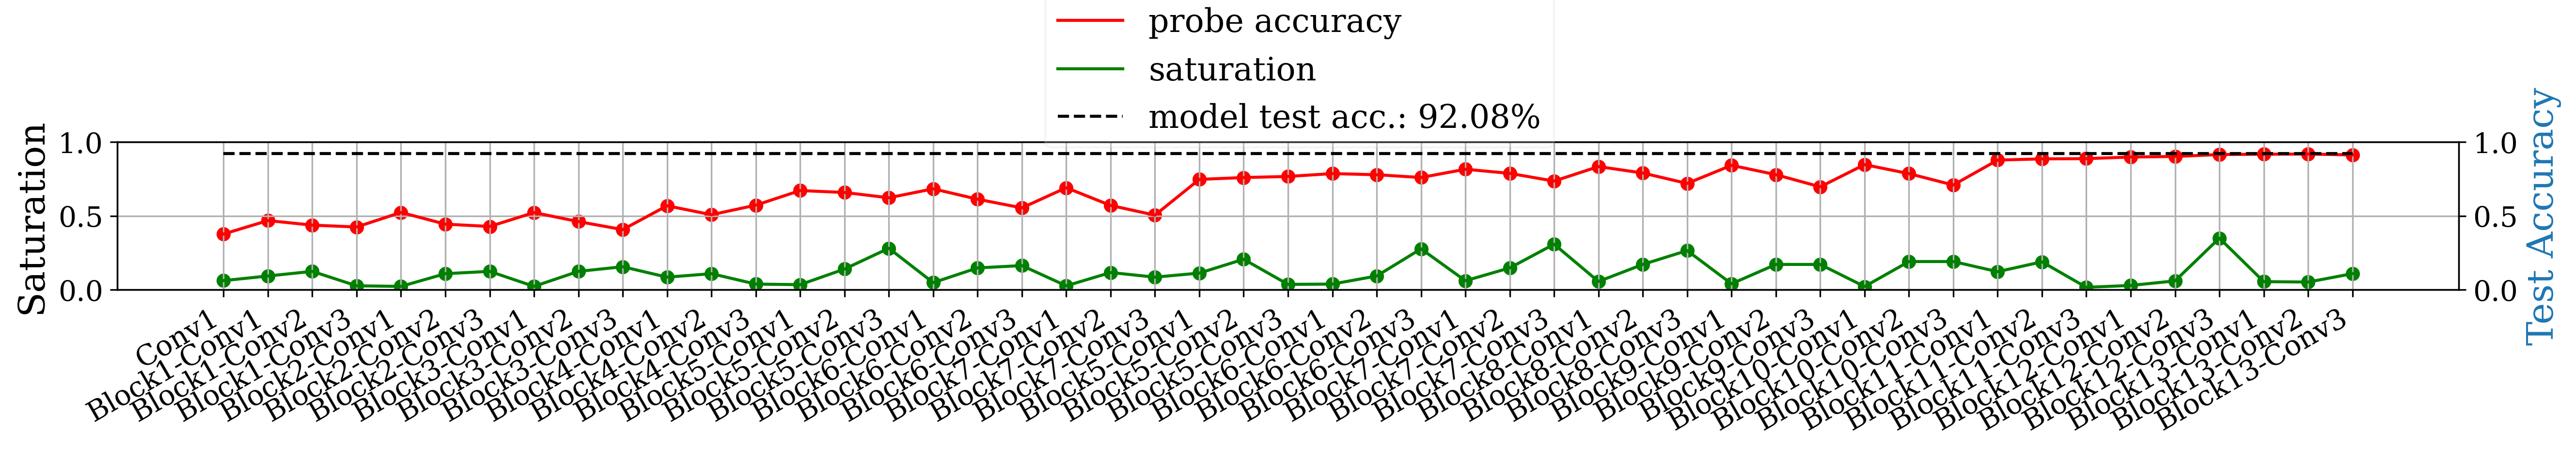

In [30]:
setups = [ ("ResNet50", 32, "Cifar10"), 
          ("ResNet50", 160, "Cifar10SmallRandomPositioning"), 
          ("ResNet50", 160, "Cifar10")]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(18, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
   
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')

    plt.show()

# Appendix

## Pontial Experiments for the Appendix

./logs/ResNet18/MNIST_32/RES/4x4_probe_performances.csv
./logs/ResNet18/MNIST_32/RES/ResNet18-MNIST-r32-bs64-e30.csv


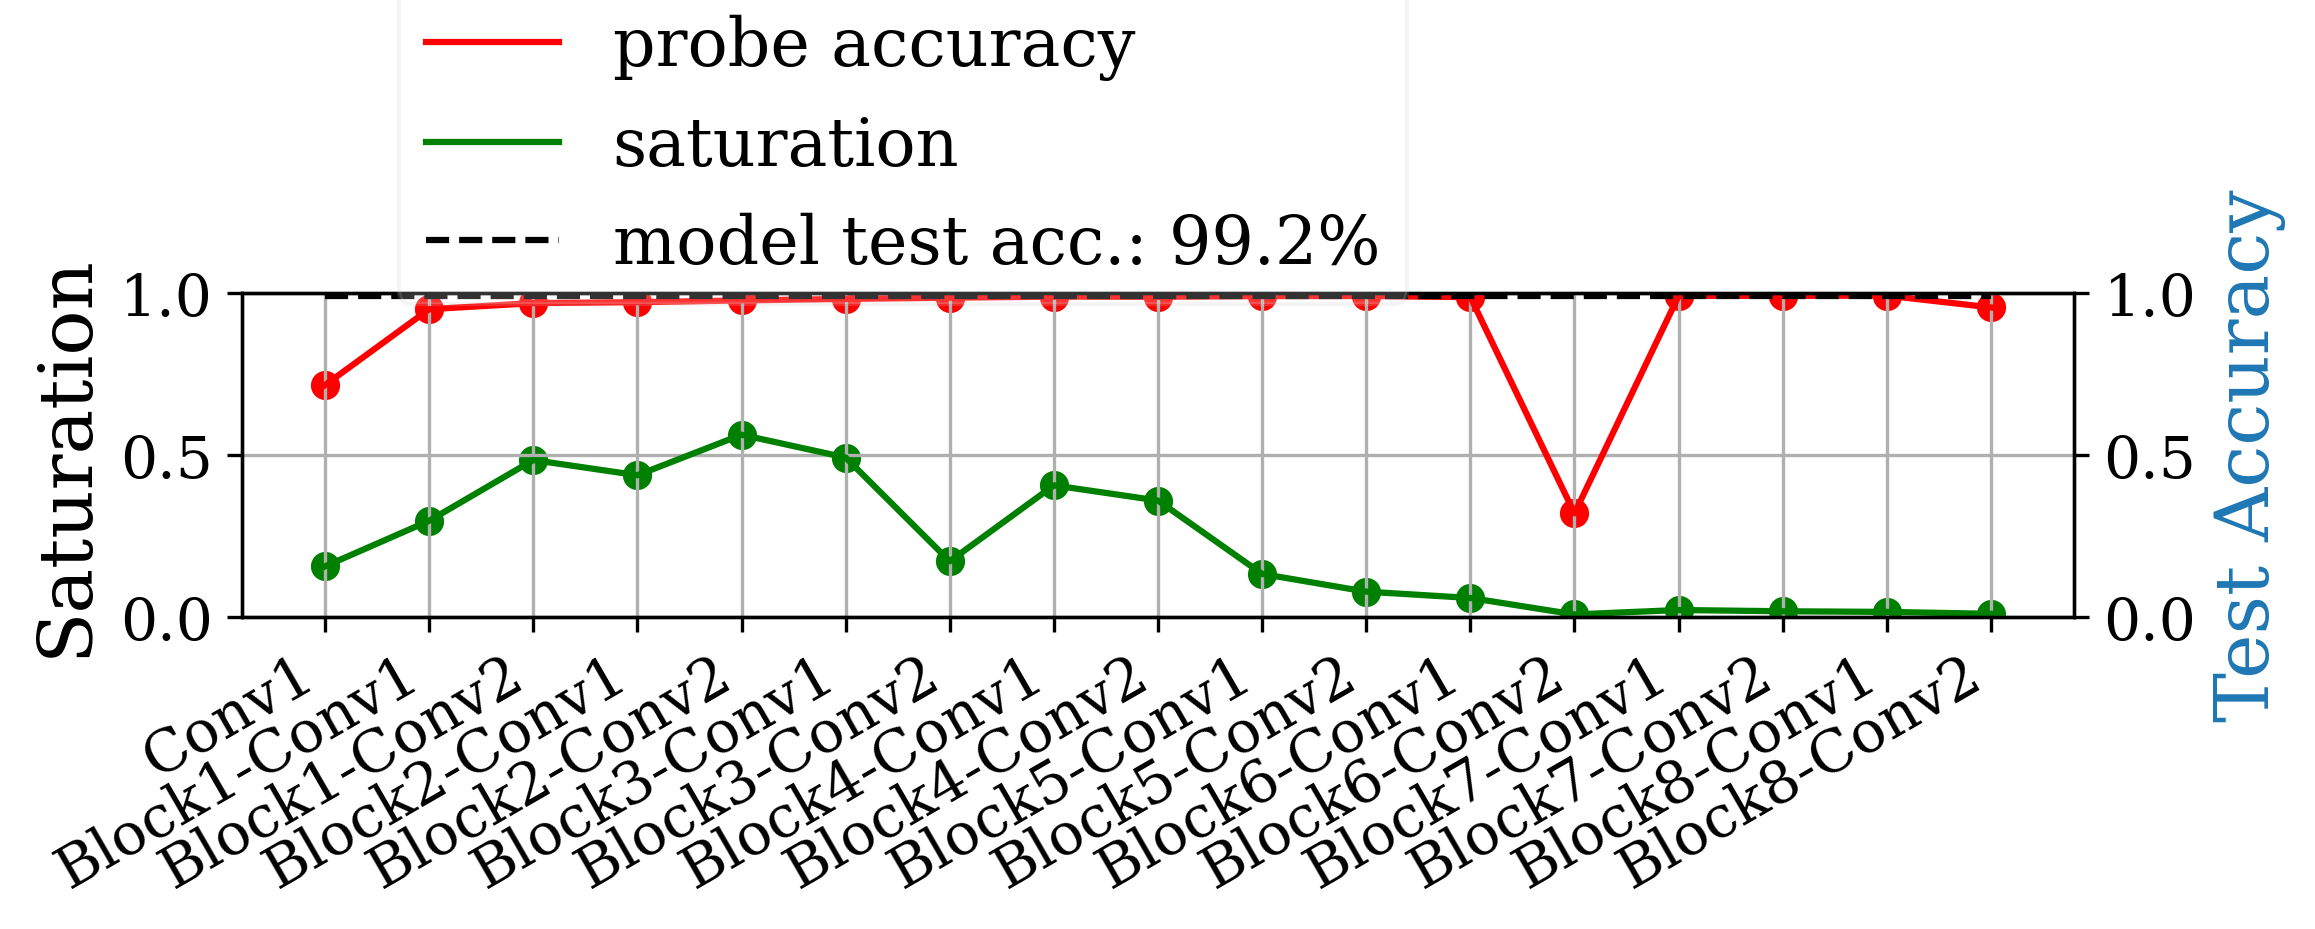

./logs/ResNet18/MNIST_224/RES/4x4_probe_performances.csv
./logs/ResNet18/MNIST_224/RES/ResNet18-MNIST-r224-bs64-e30.csv


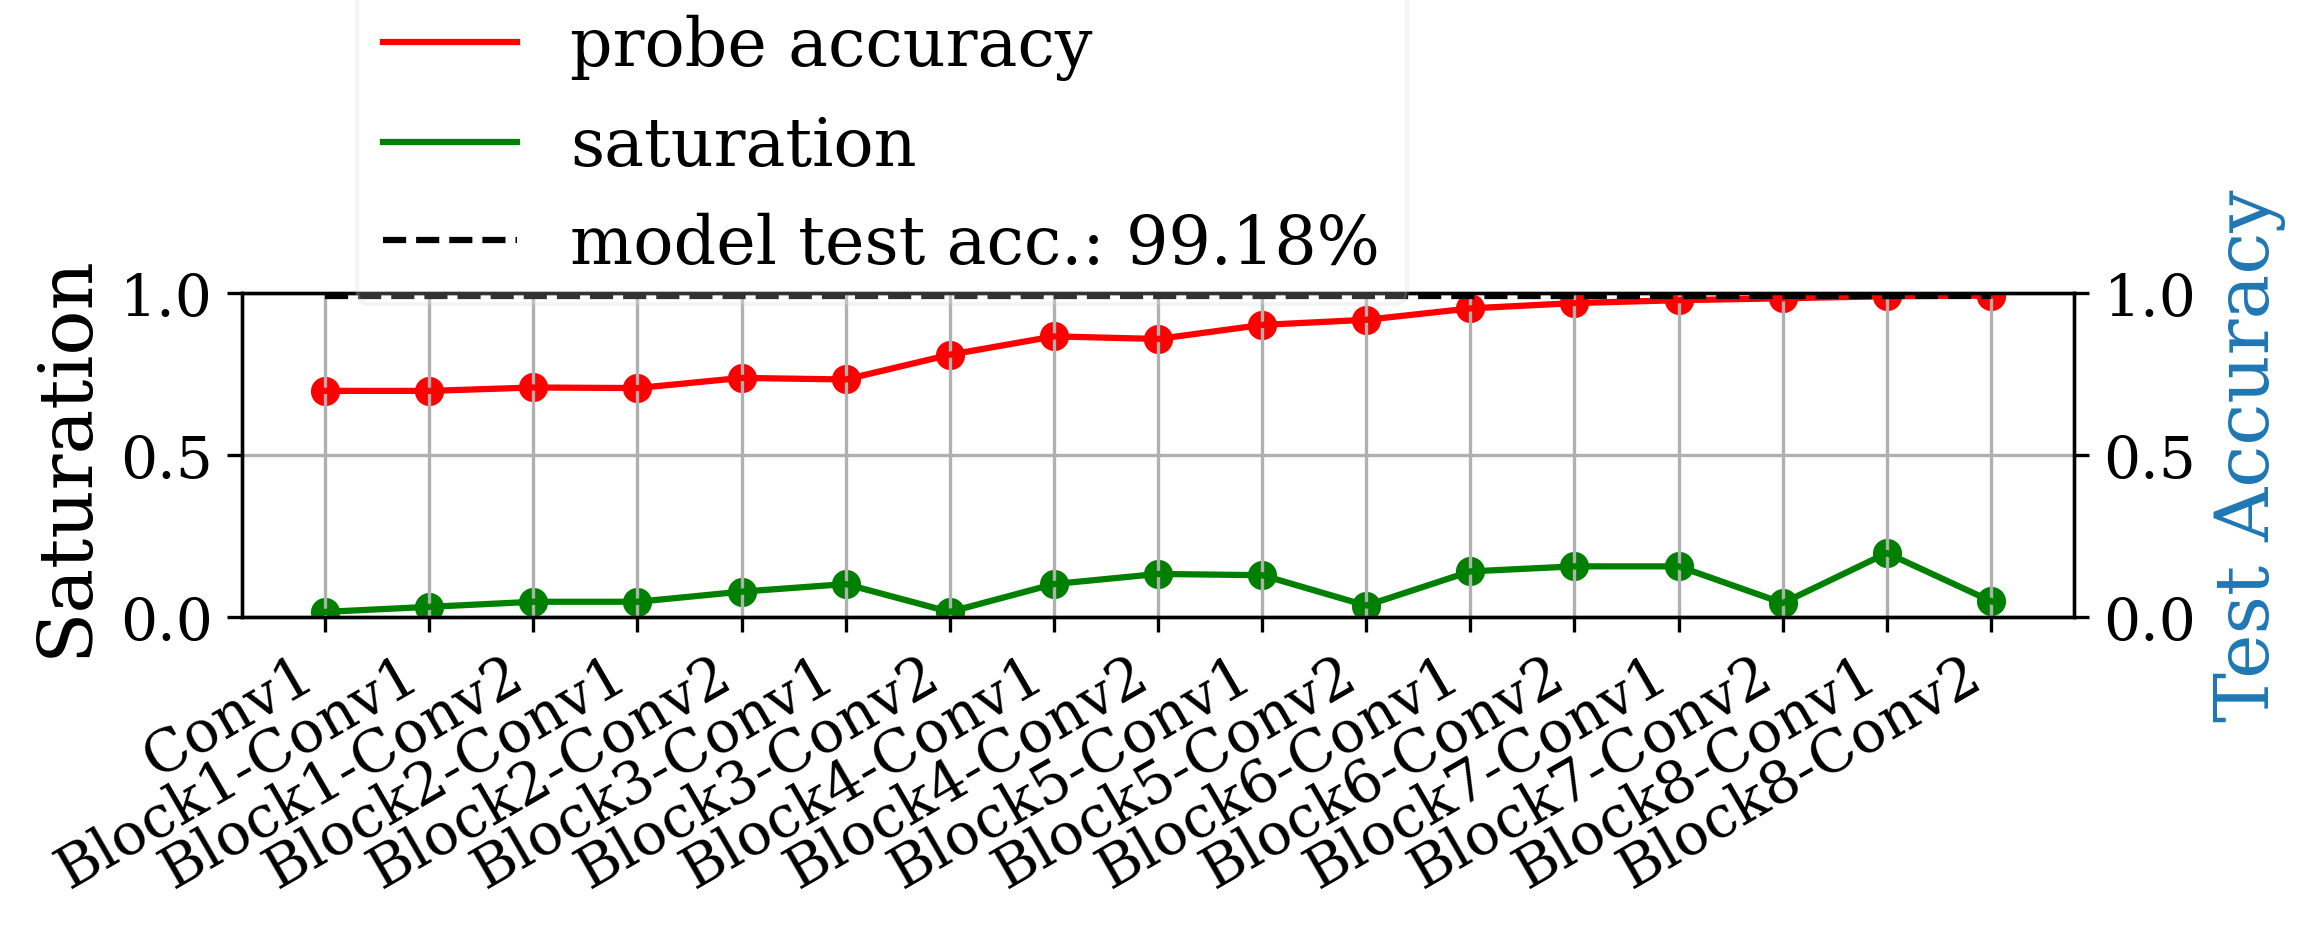

./logs/ResNet18/MNIST_1024/RES/4x4_probe_performances.csv
./logs/ResNet18/MNIST_1024/RES/ResNet18-MNIST-r1024-bs64-e30.csv


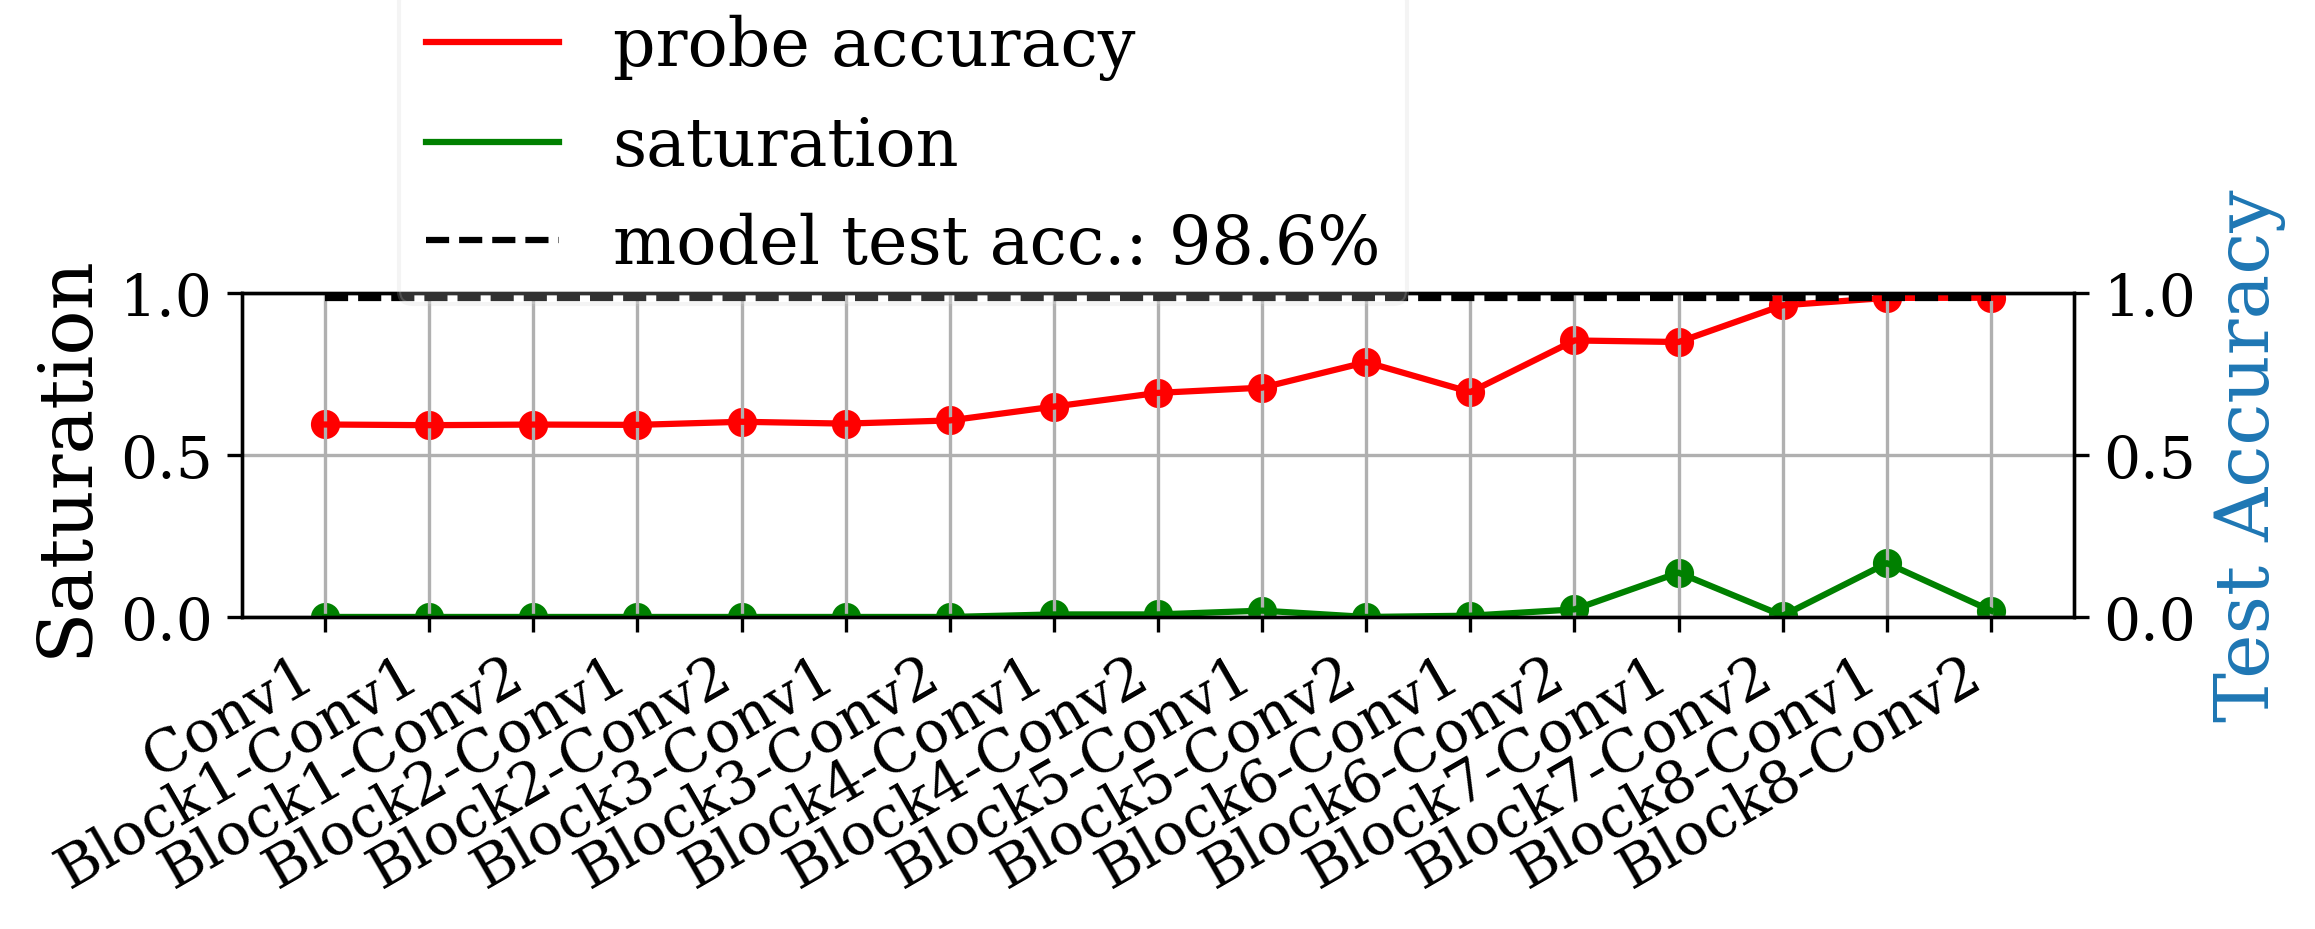

In [11]:
setups = [ 
    ("ResNet18", 32, "MNIST"), 
    ("ResNet18", 224, "MNIST"), 
    ("ResNet18", 1024, "MNIST"),
]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

./logs/ResNet18/TinyImageNet_64/RES/2x2_probe_performances.csv
./logs/ResNet18/TinyImageNet_64/RES/ResNet18-TinyImageNet-r64-bs64-e30.csv


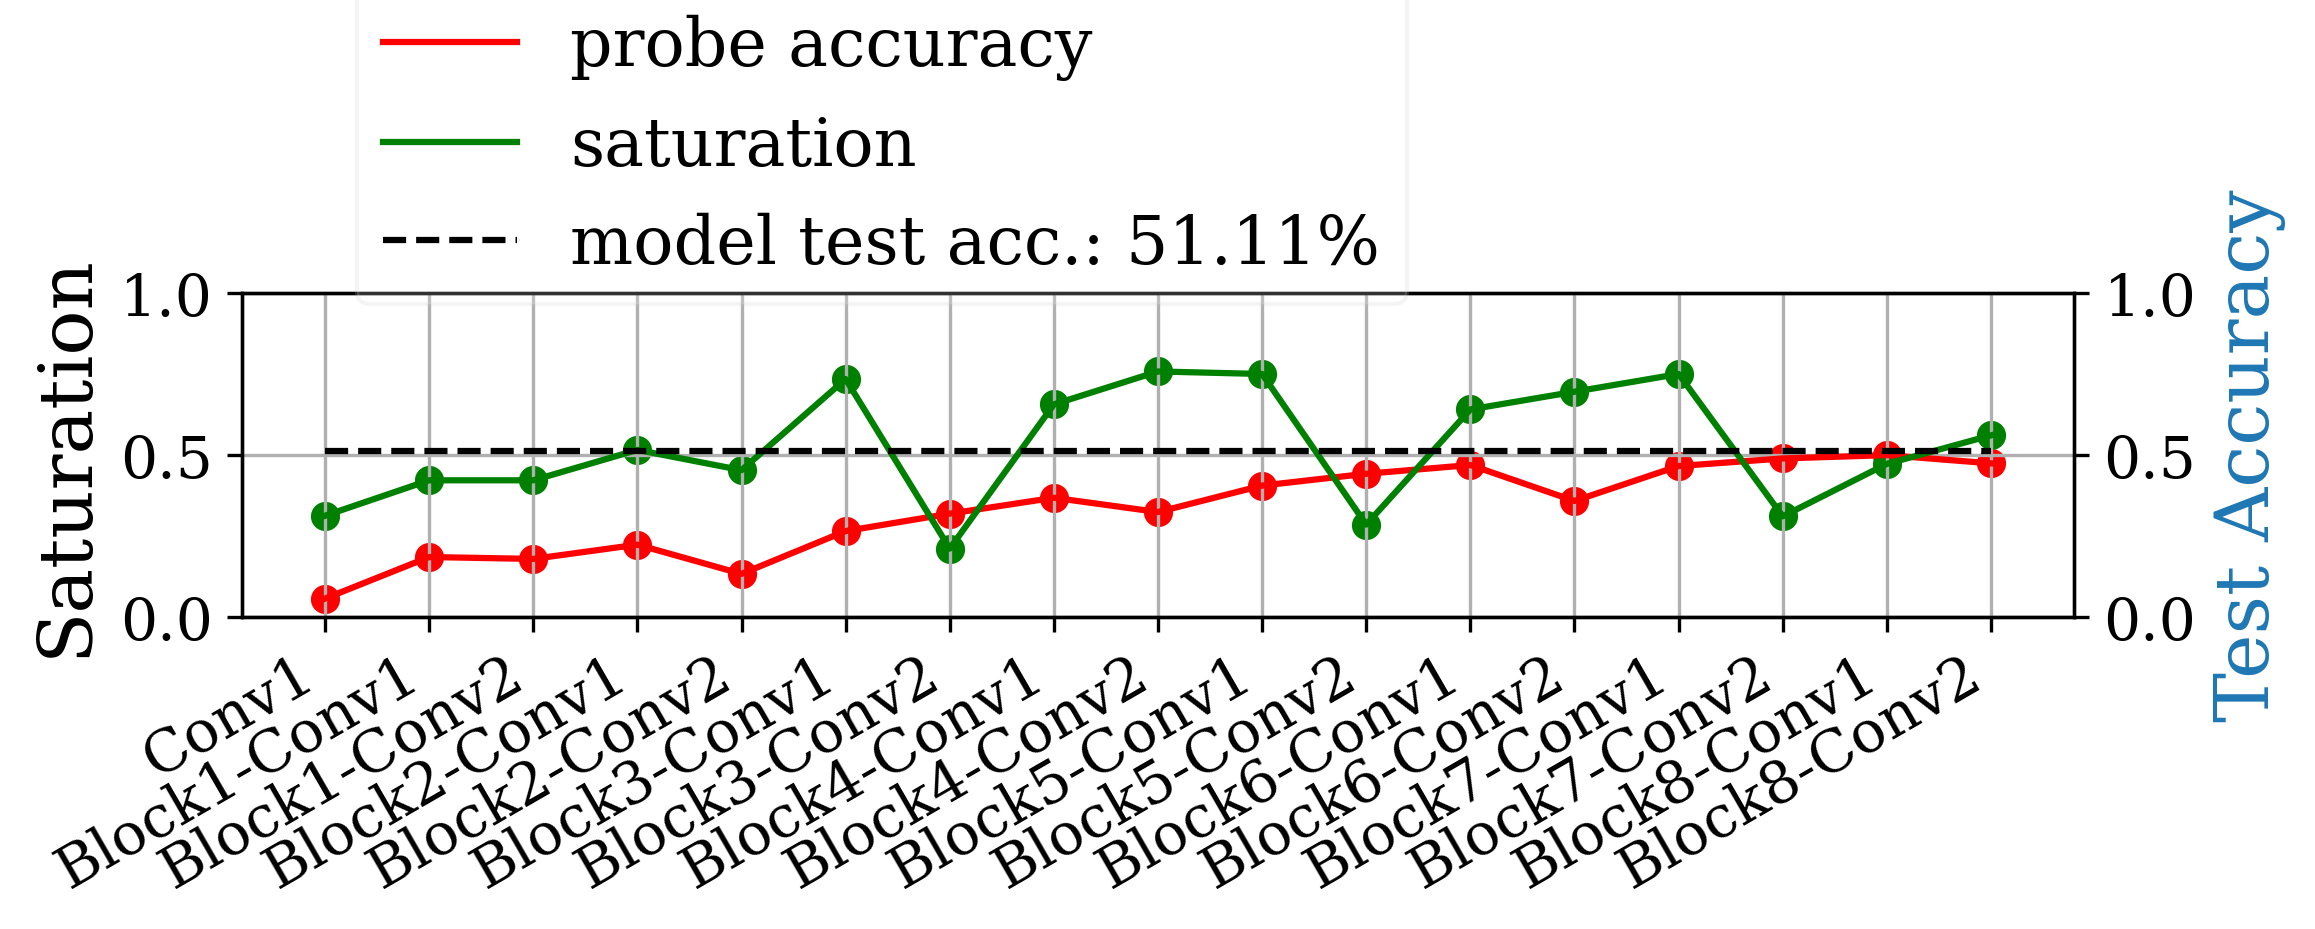

./logs/ResNet18/TinyImageNet_224/RES/2x2_probe_performances.csv
./logs/ResNet18/TinyImageNet_224/RES/ResNet18-TinyImageNet-r224-bs64-e30.csv


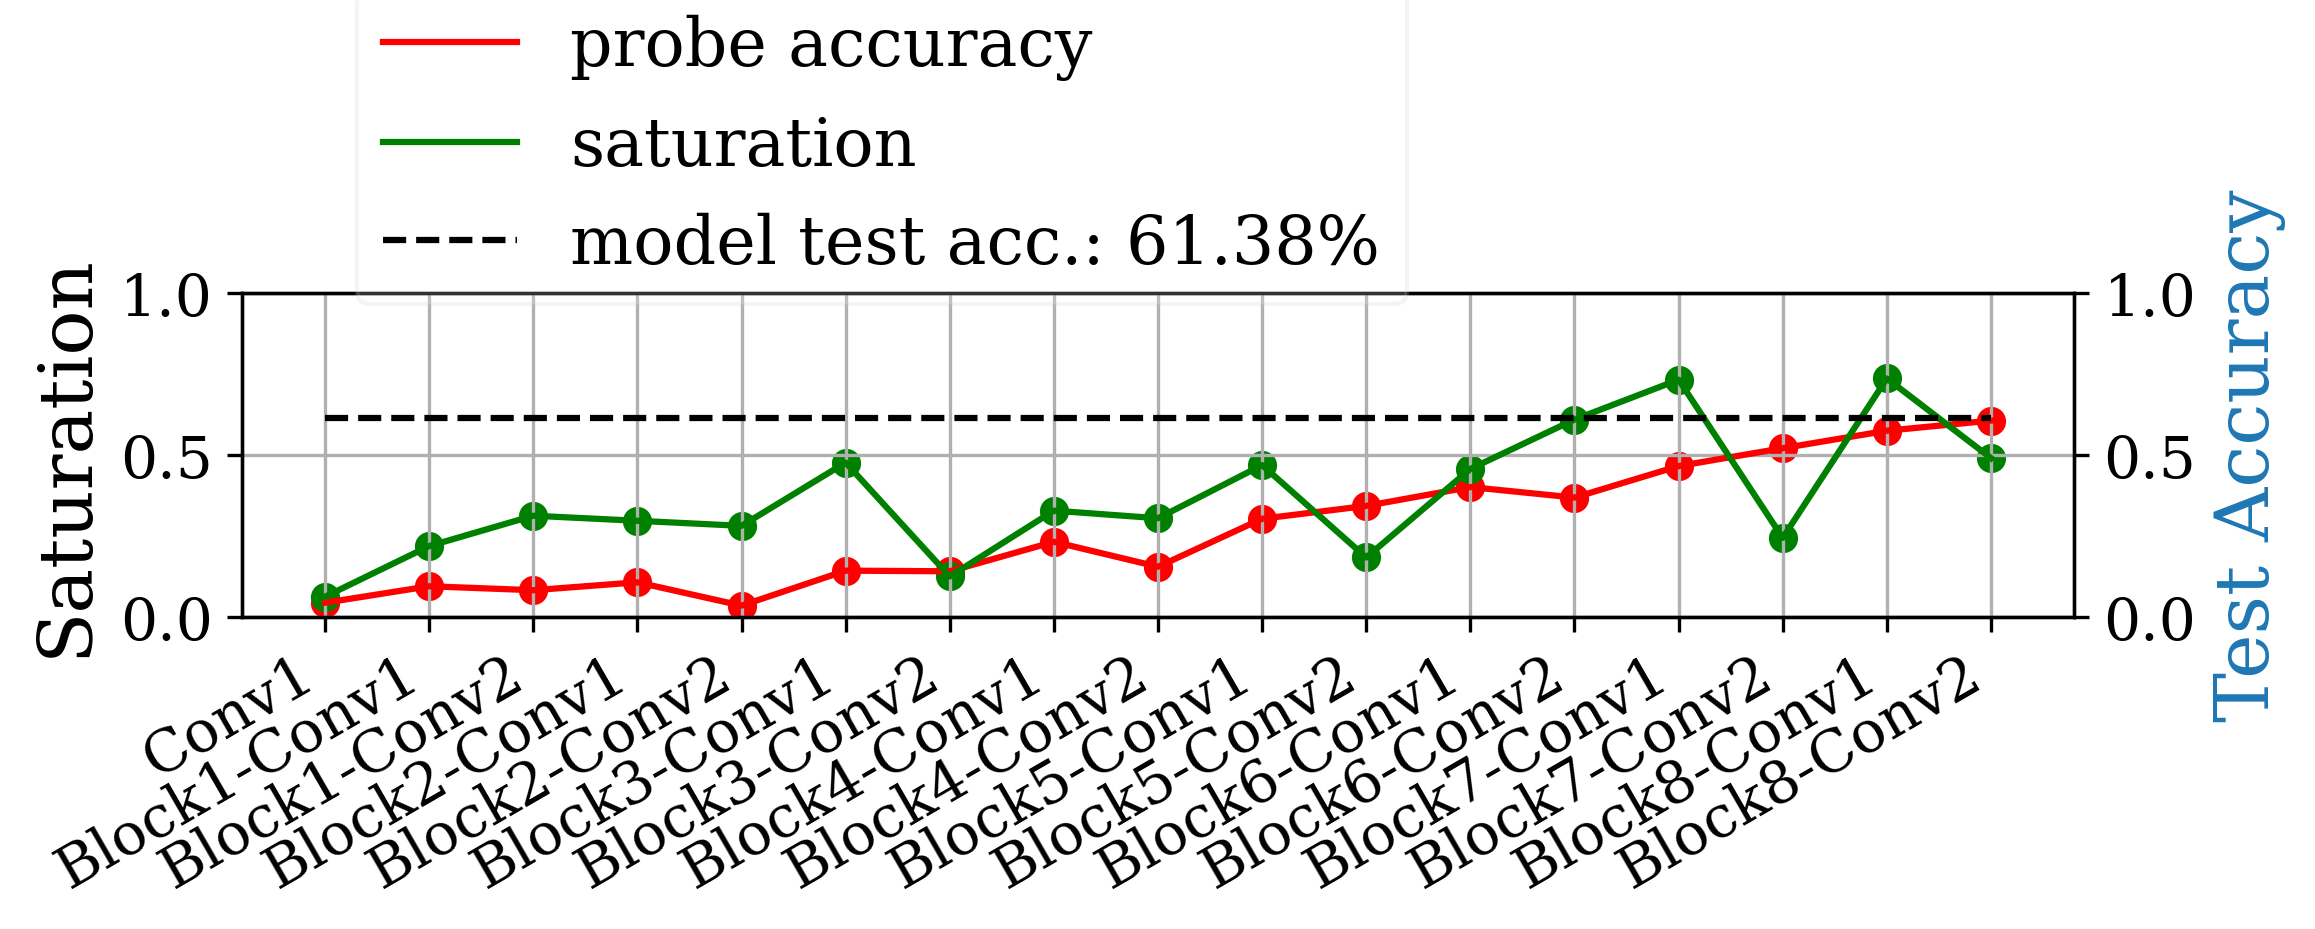

./logs/ResNet18/TinyImageNet_1024/RES/2x2_probe_performances.csv
./logs/ResNet18/TinyImageNet_1024/RES/ResNet18-TinyImageNet-r1024-bs64-e30.csv


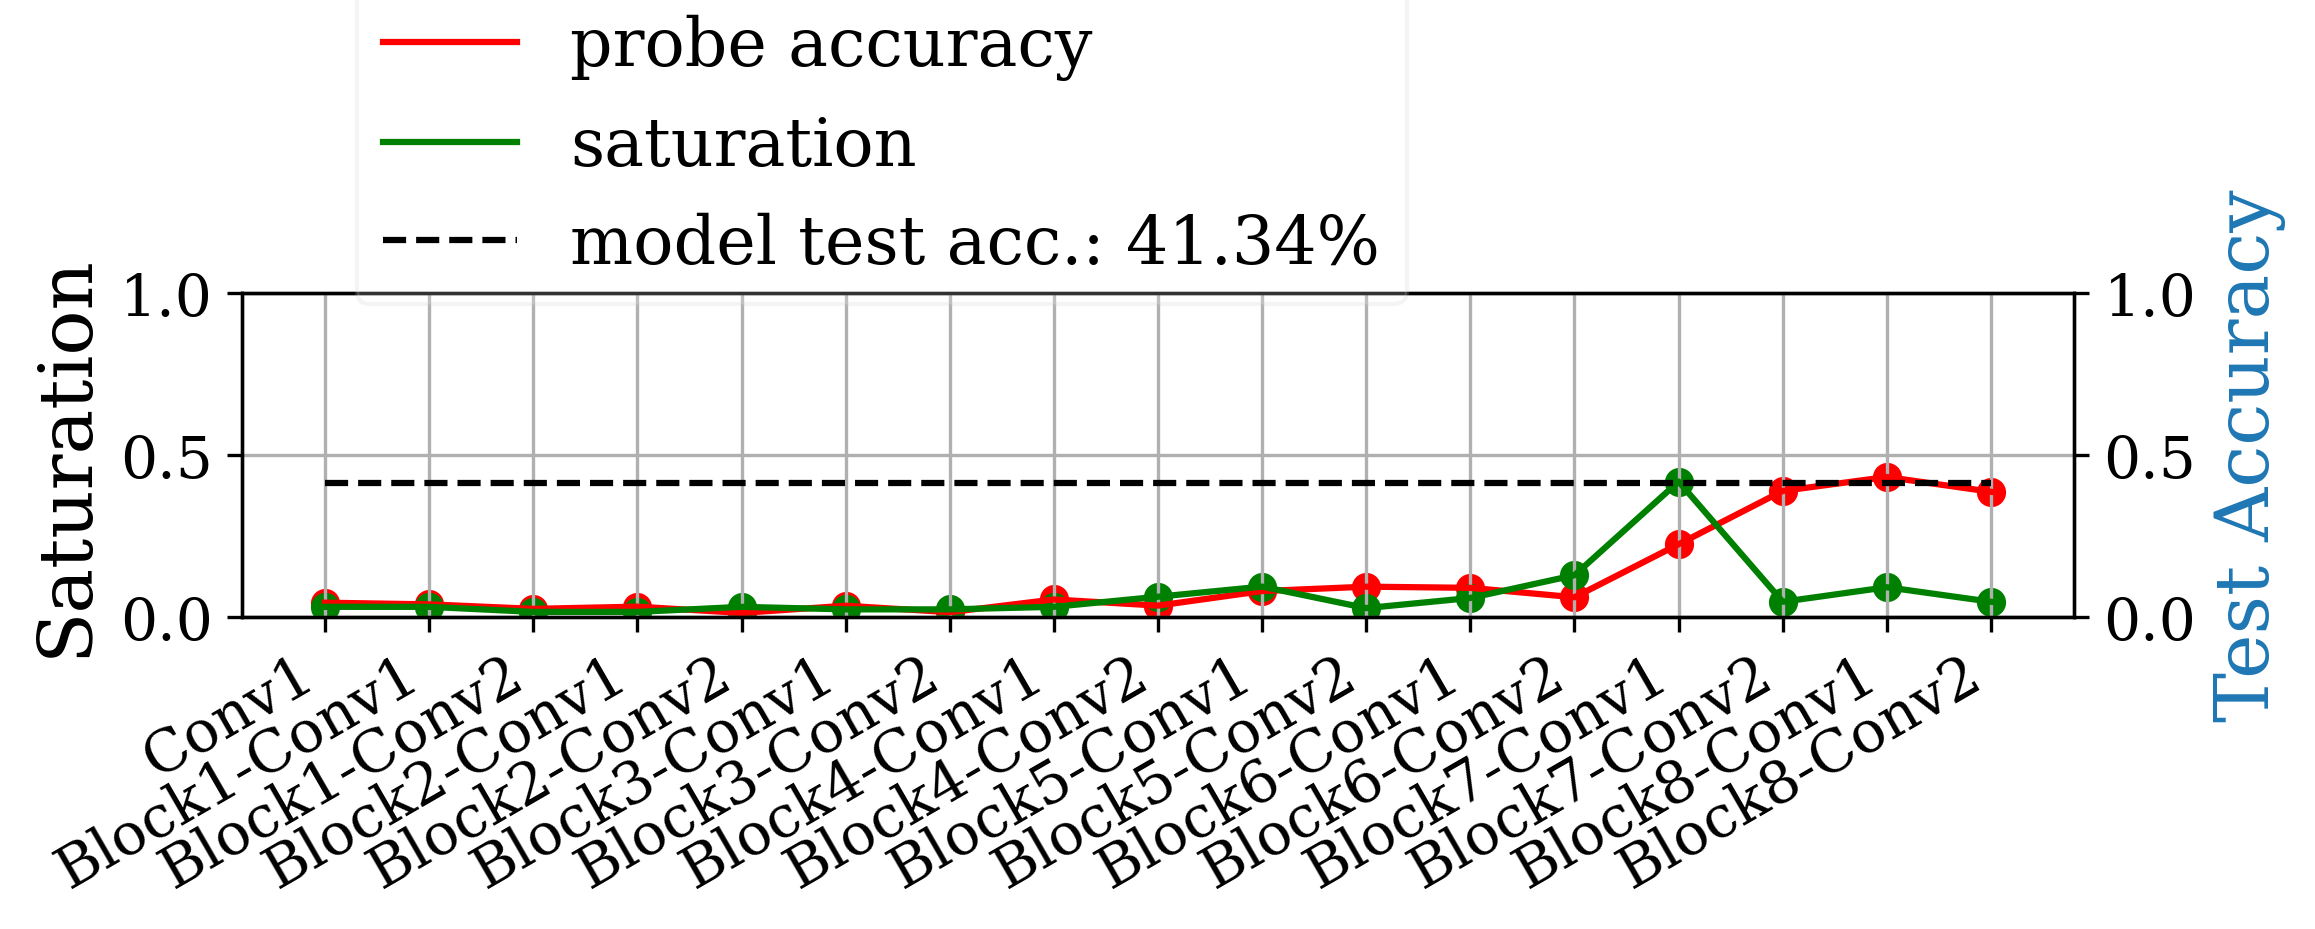

In [12]:
setups = [ 
    ("ResNet18", 64, "TinyImageNet"), 
    ("ResNet18", 224, "TinyImageNet"), 
    ("ResNet18", 1024, "TinyImageNet"),
]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

./logs/ResNet50/Cifar10_32/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10_32/RES/ResNet50-Cifar10-r32-bs64-e60.csv


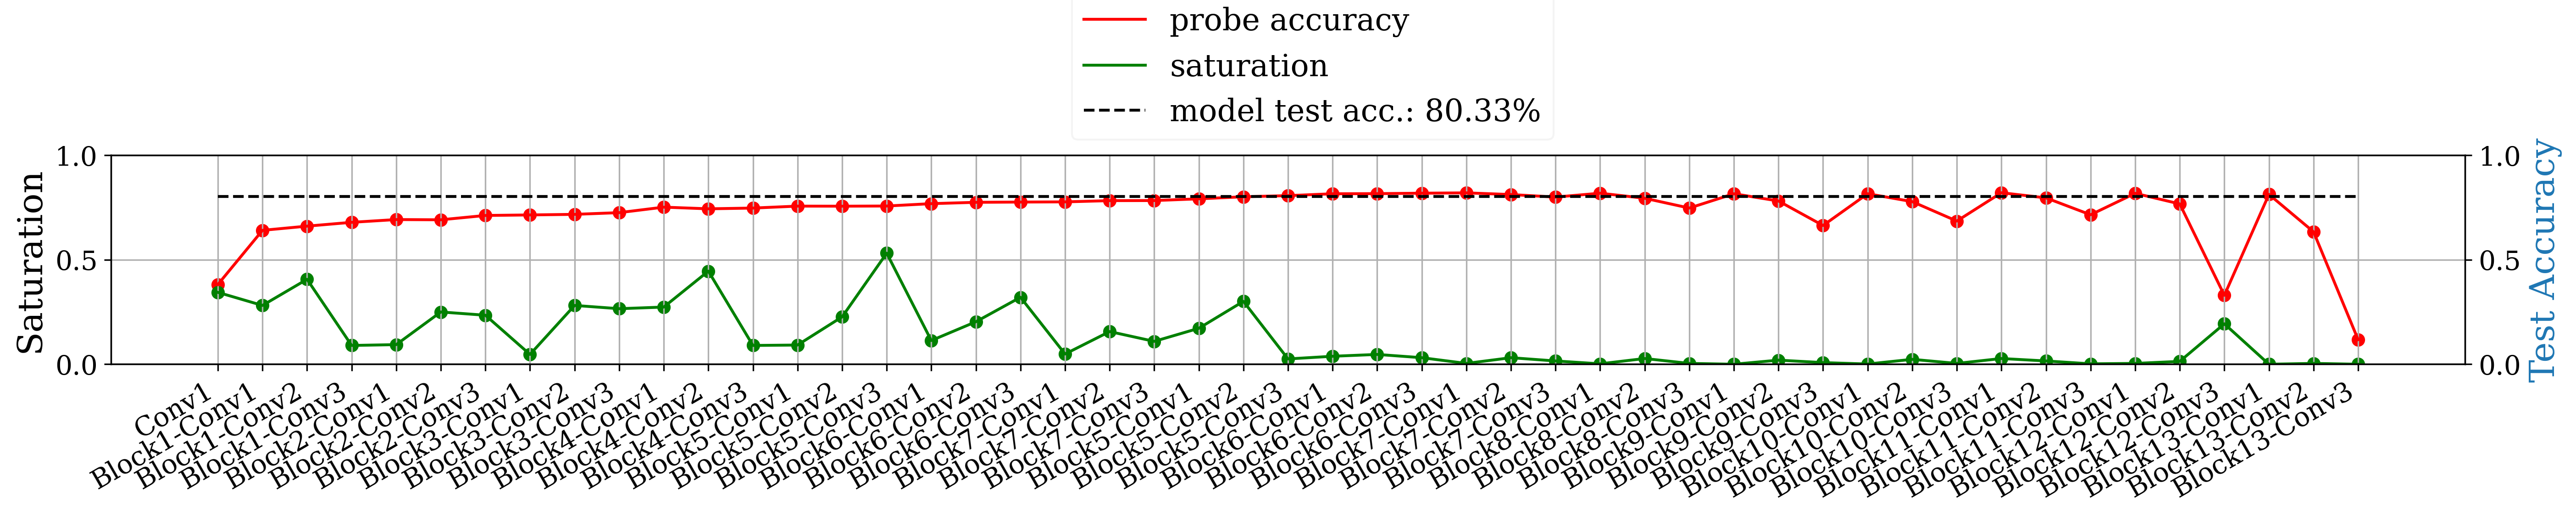

./logs/ResNet50/Cifar10_160/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10_160/RES/ResNet50-Cifar10-r160-bs64-e60.csv


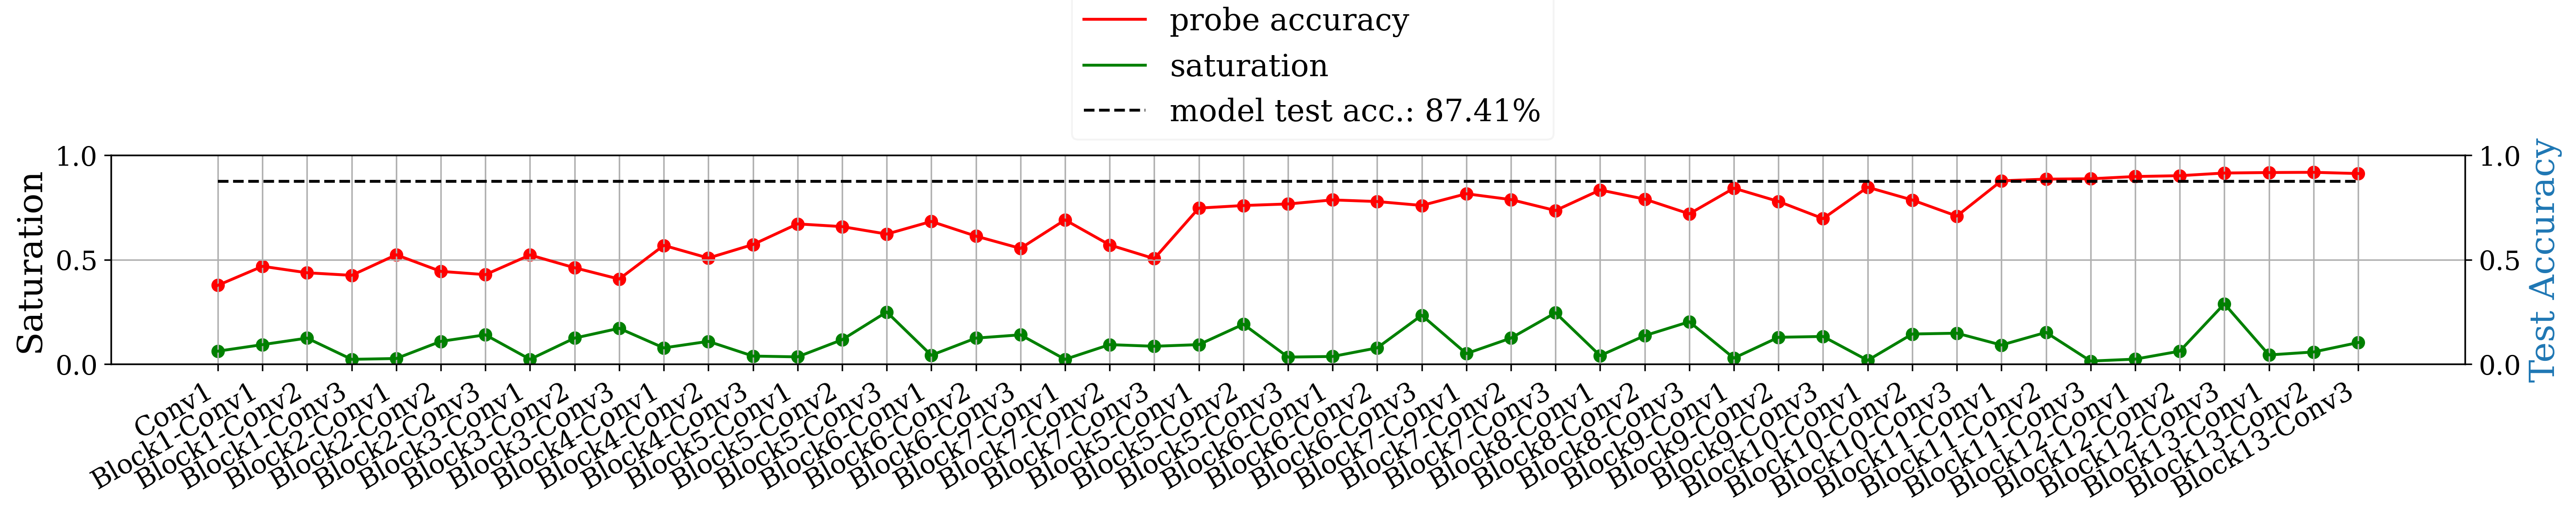

./logs/ResNet50/Cifar10_1024/RES/4x4_probe_performances.csv
./logs/ResNet50/Cifar10_1024/RES/ResNet50-Cifar10-r1024-bs32-e60.csv


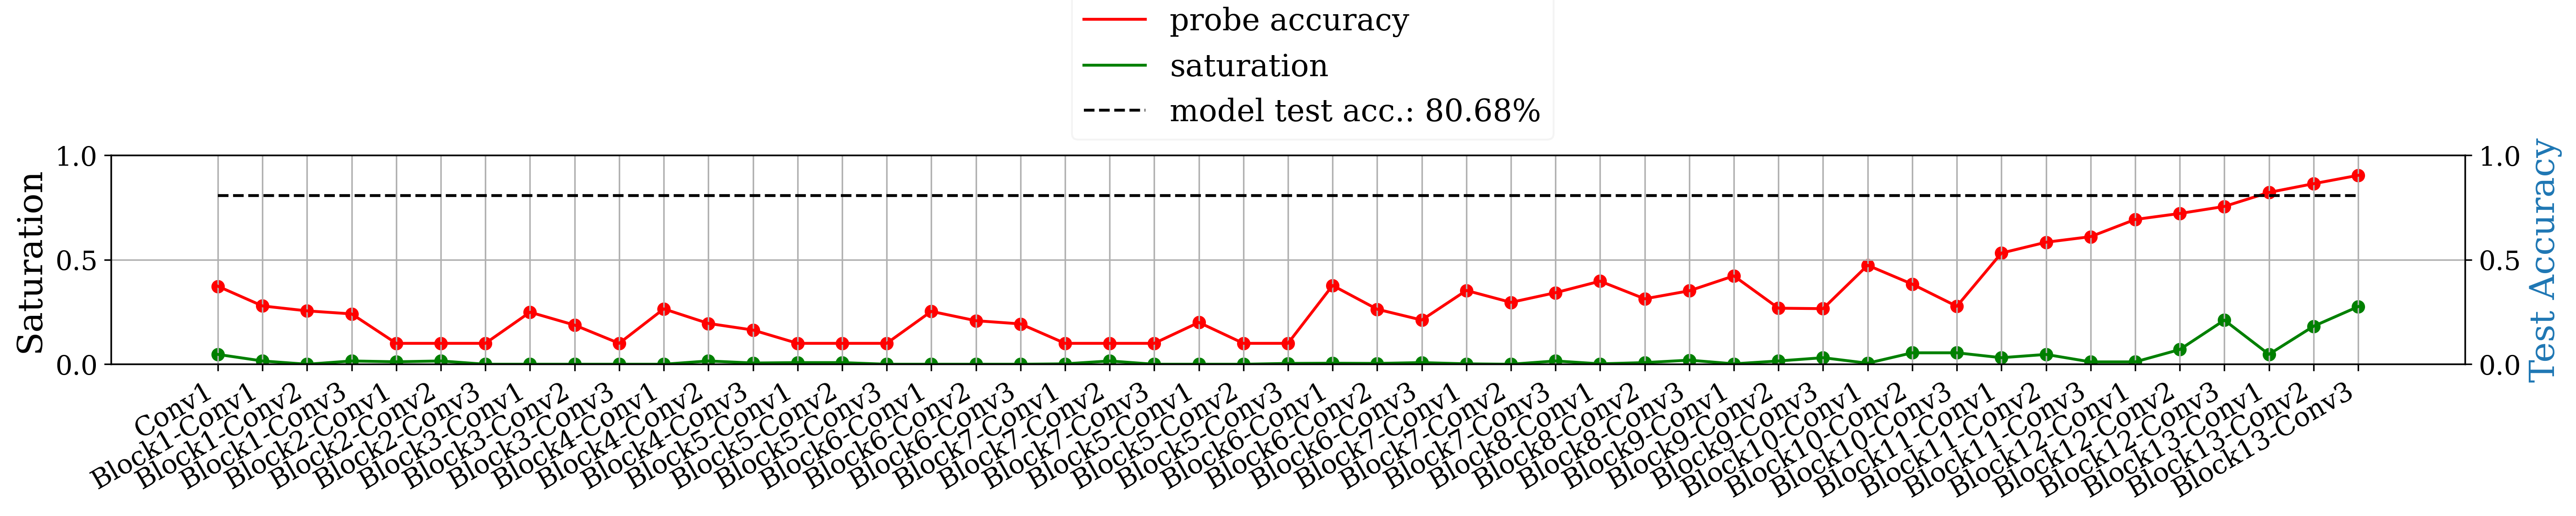

In [13]:
setups = [ 
    ("ResNet50", 32,   "Cifar10"), 
    ("ResNet50", 160,  "Cifar10"), 
    ("ResNet50", 1024, "Cifar10"),
]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(19, 3), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

./logs/VGG16/MNIST_32/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_32/RES/VGG16-MNIST-r32-bs64-e30.csv


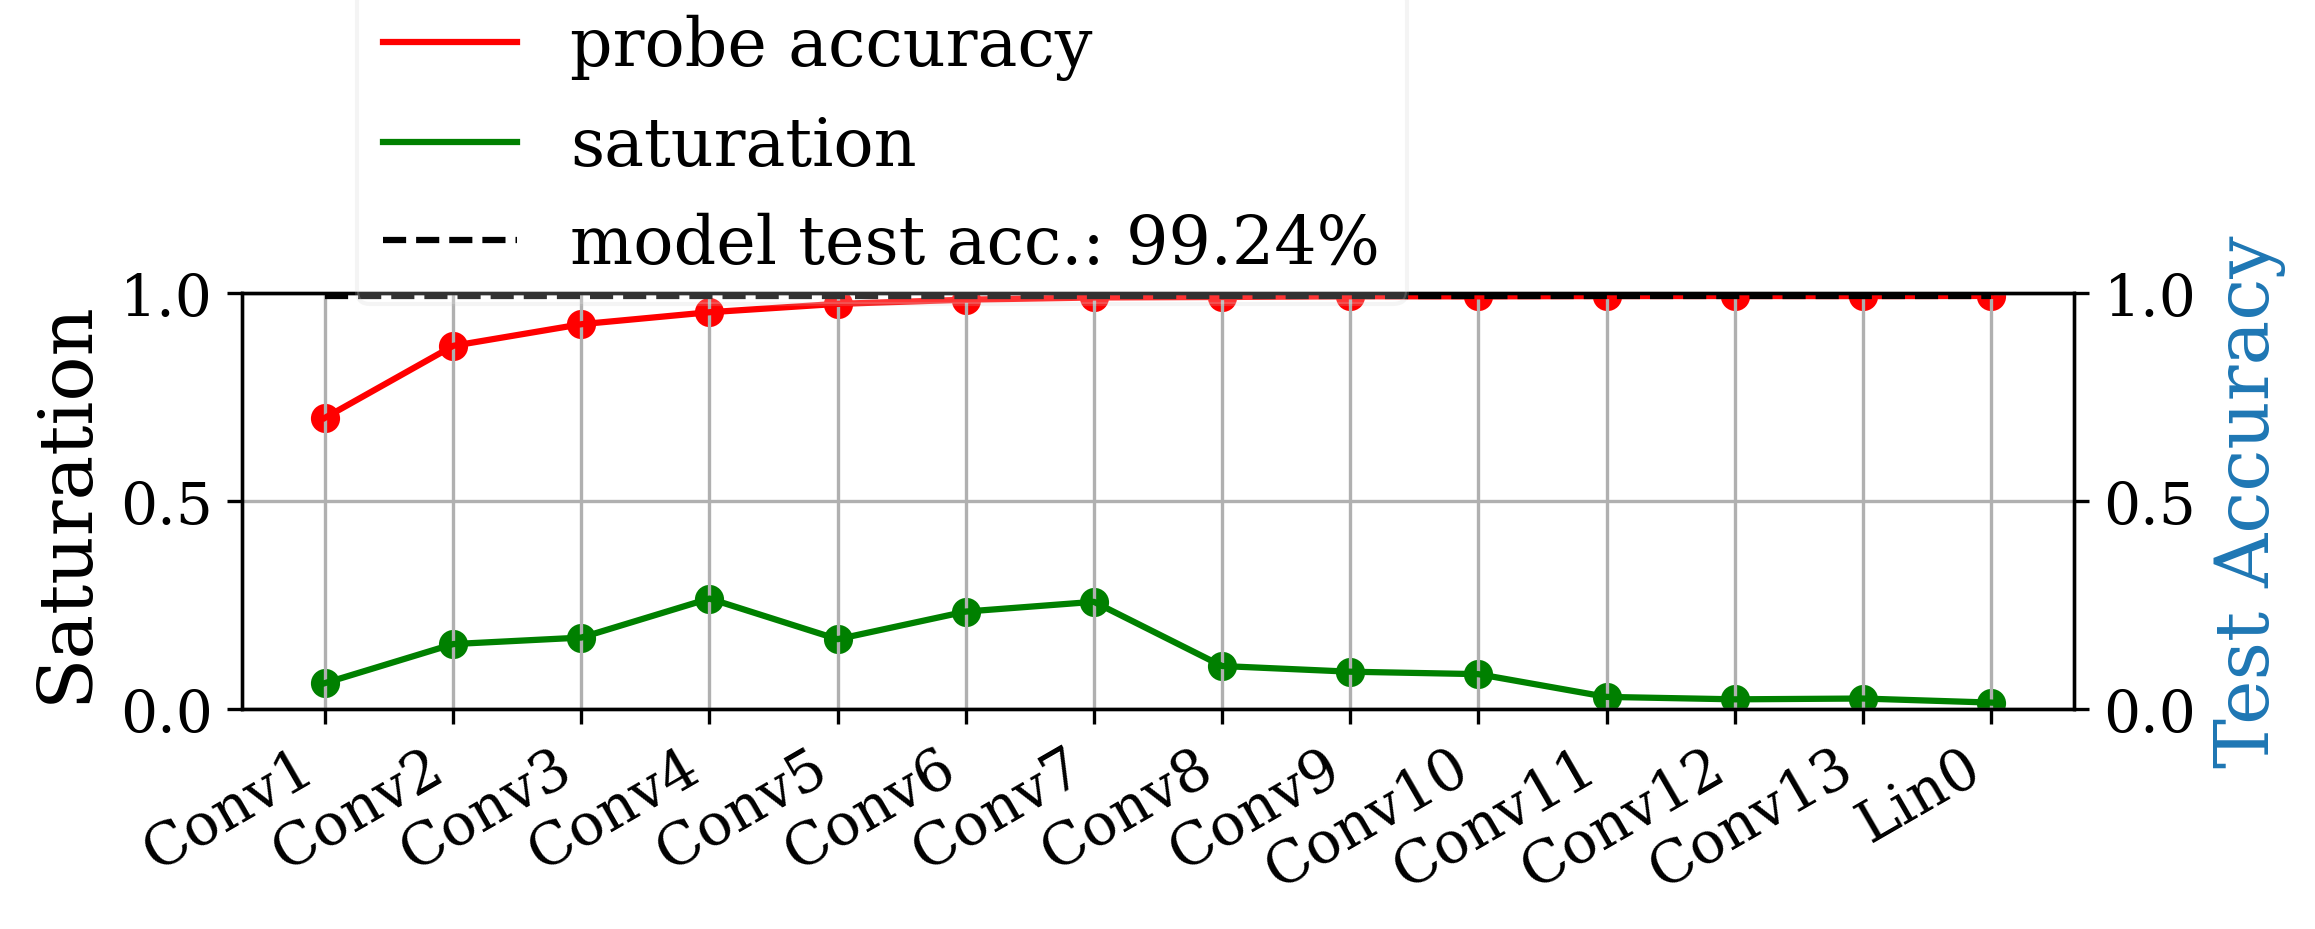

In [14]:
setups = [ 
    ("VGG16", 32, "MNIST"), 
    #("VGG16", 224, "MNIST"), 
    #("VGG16", 1024, "MNIST"),
]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

## Repition of the Canvas Experiments

./logs/VGG16/MNIST_32/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_32/RES/VGG16-MNIST-r32-bs64-e30.csv


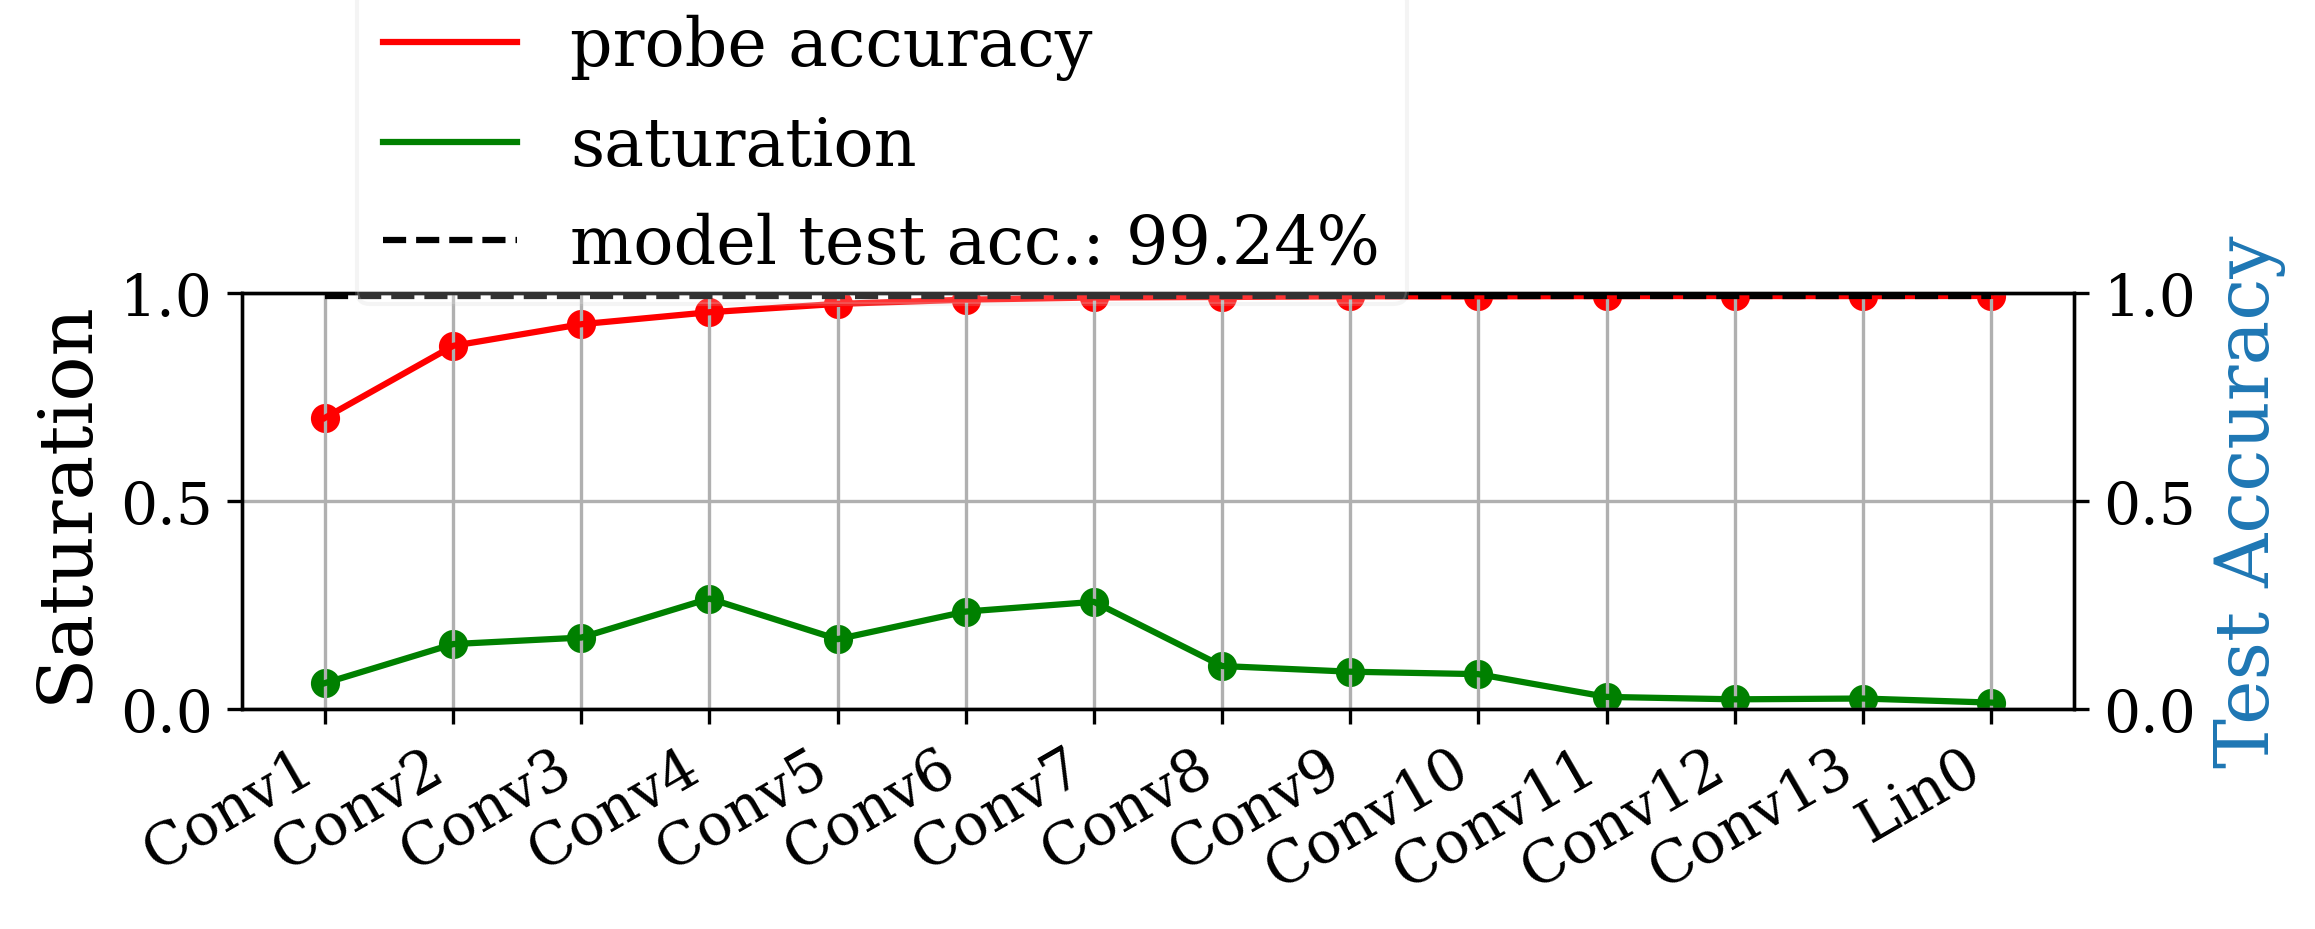

./logs/VGG16/MNISTSmallRandomPositioning_160/RES/4x4_probe_performances.csv
./logs/VGG16/MNISTSmallRandomPositioning_160/RES/VGG16-MNISTSmallRandomPositioning-r160-bs64-e30.csv


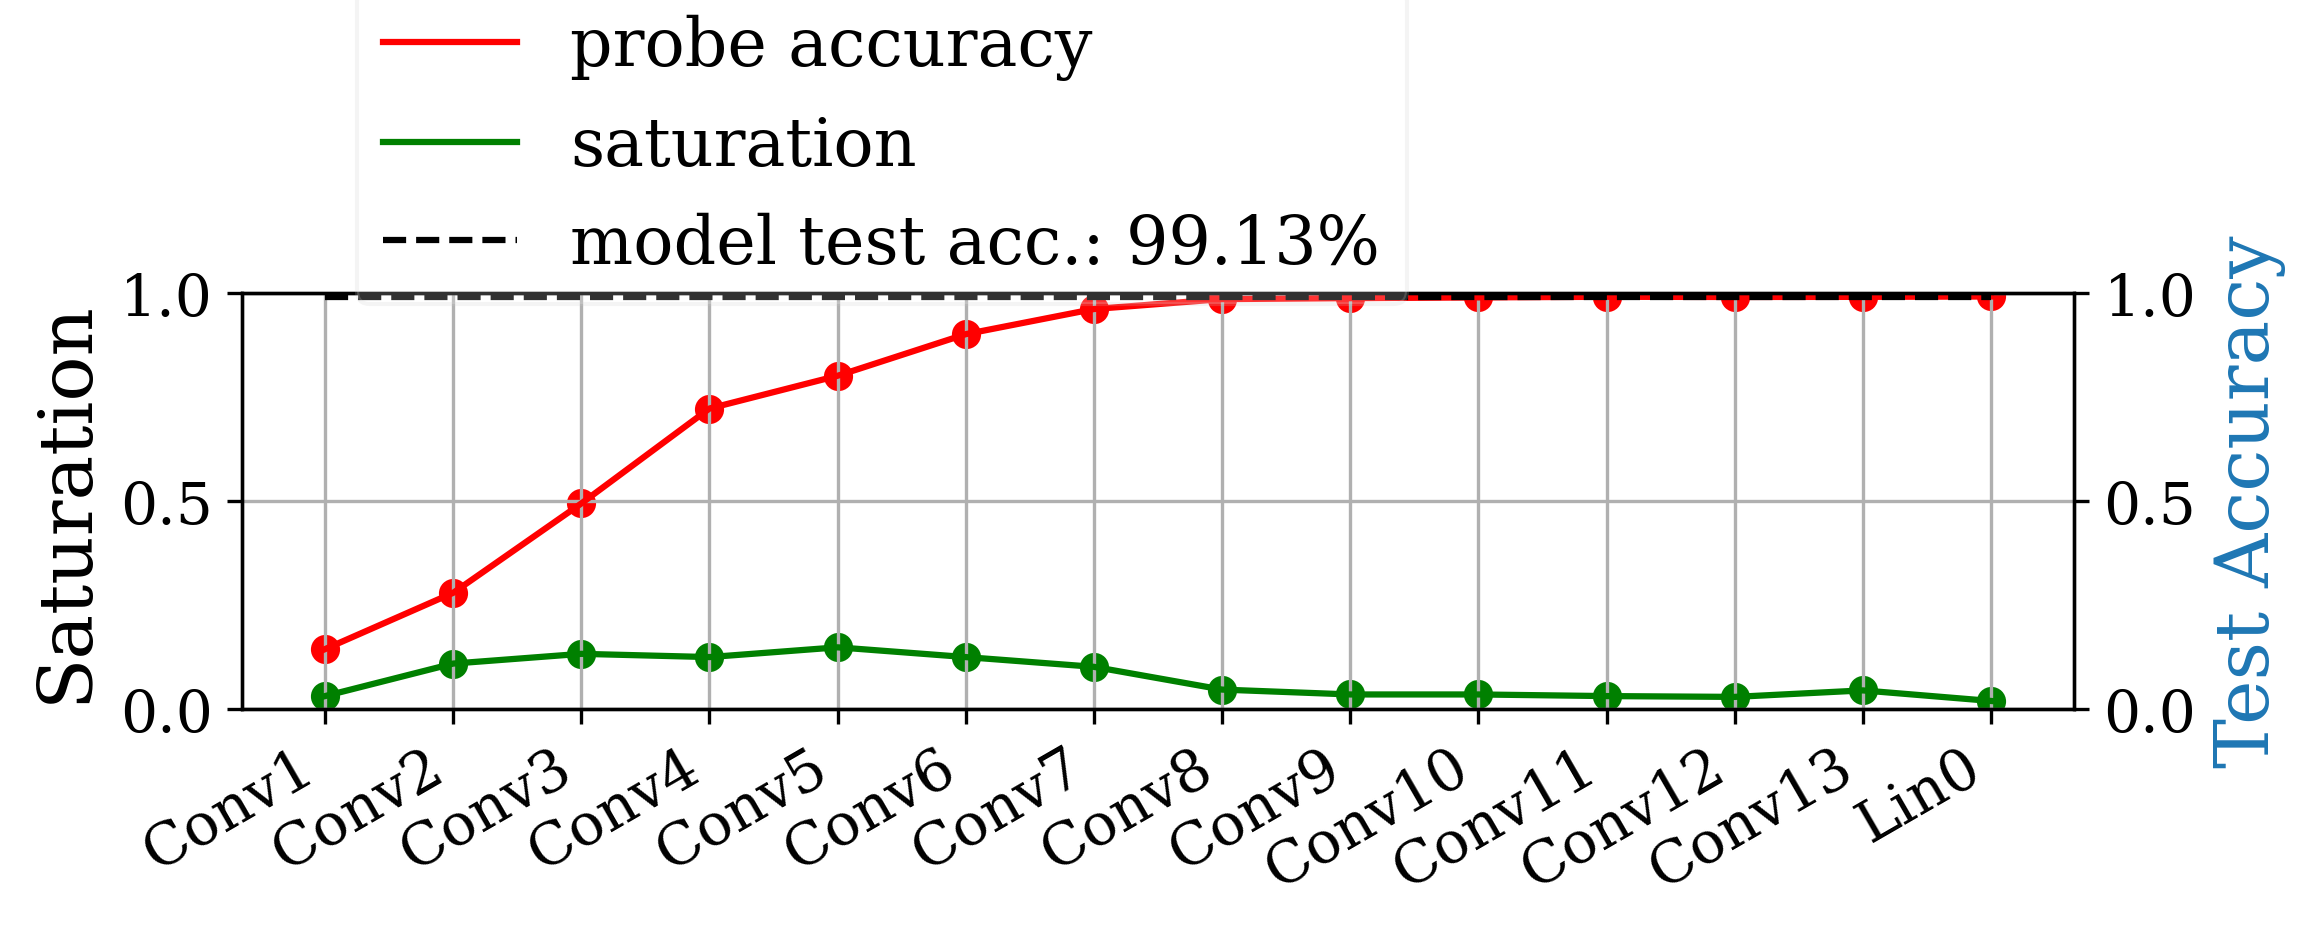

./logs/VGG16/MNIST_160/RES/4x4_probe_performances.csv
./logs/VGG16/MNIST_160/RES/VGG16-MNIST-r160-bs64-e30.csv


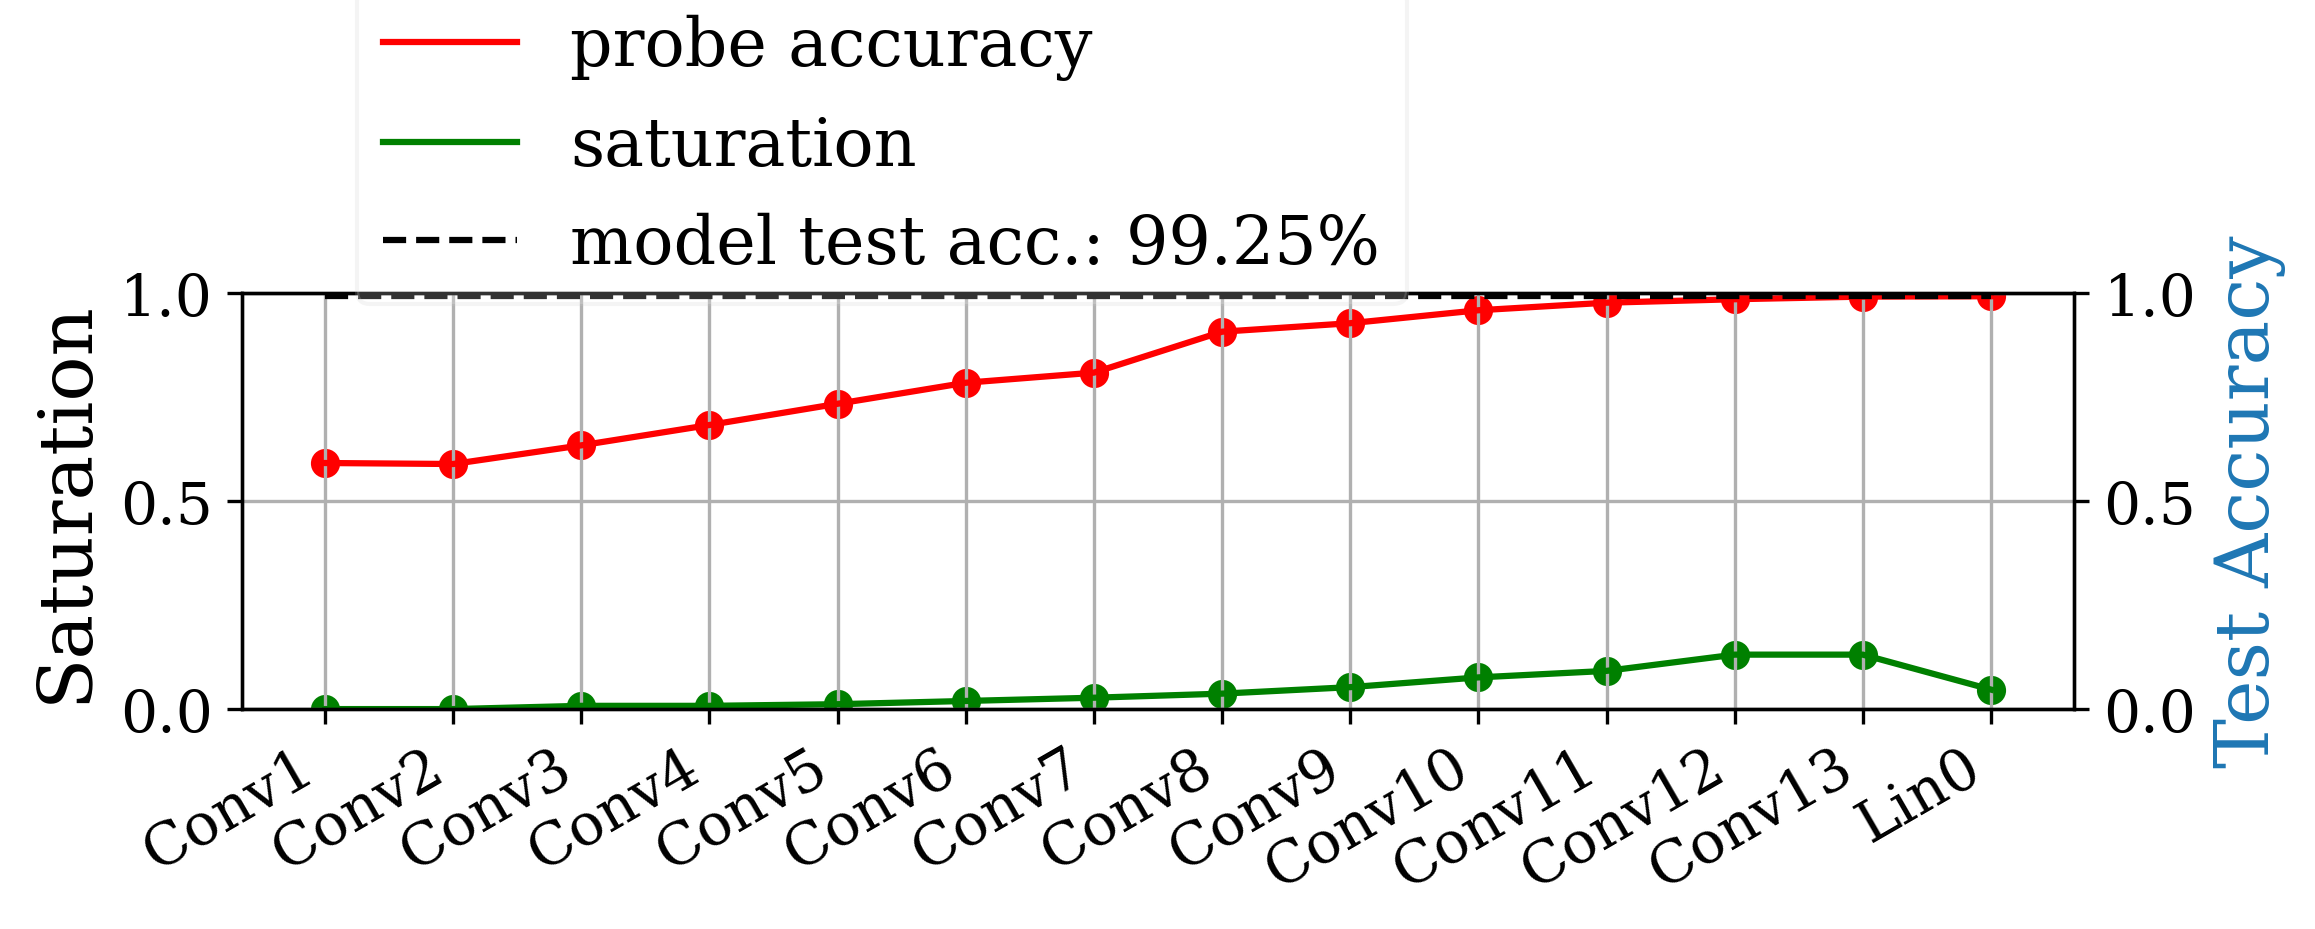

In [15]:
setups = [ ("VGG16", 32, "MNIST"), 
          ("VGG16", 160, "MNISTSmallRandomPositioning"), 
          ("VGG16", 160, "MNIST")]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

./logs/ResNet18/MNIST_32/RES/4x4_probe_performances.csv
./logs/ResNet18/MNIST_32/RES/ResNet18-MNIST-r32-bs64-e30.csv


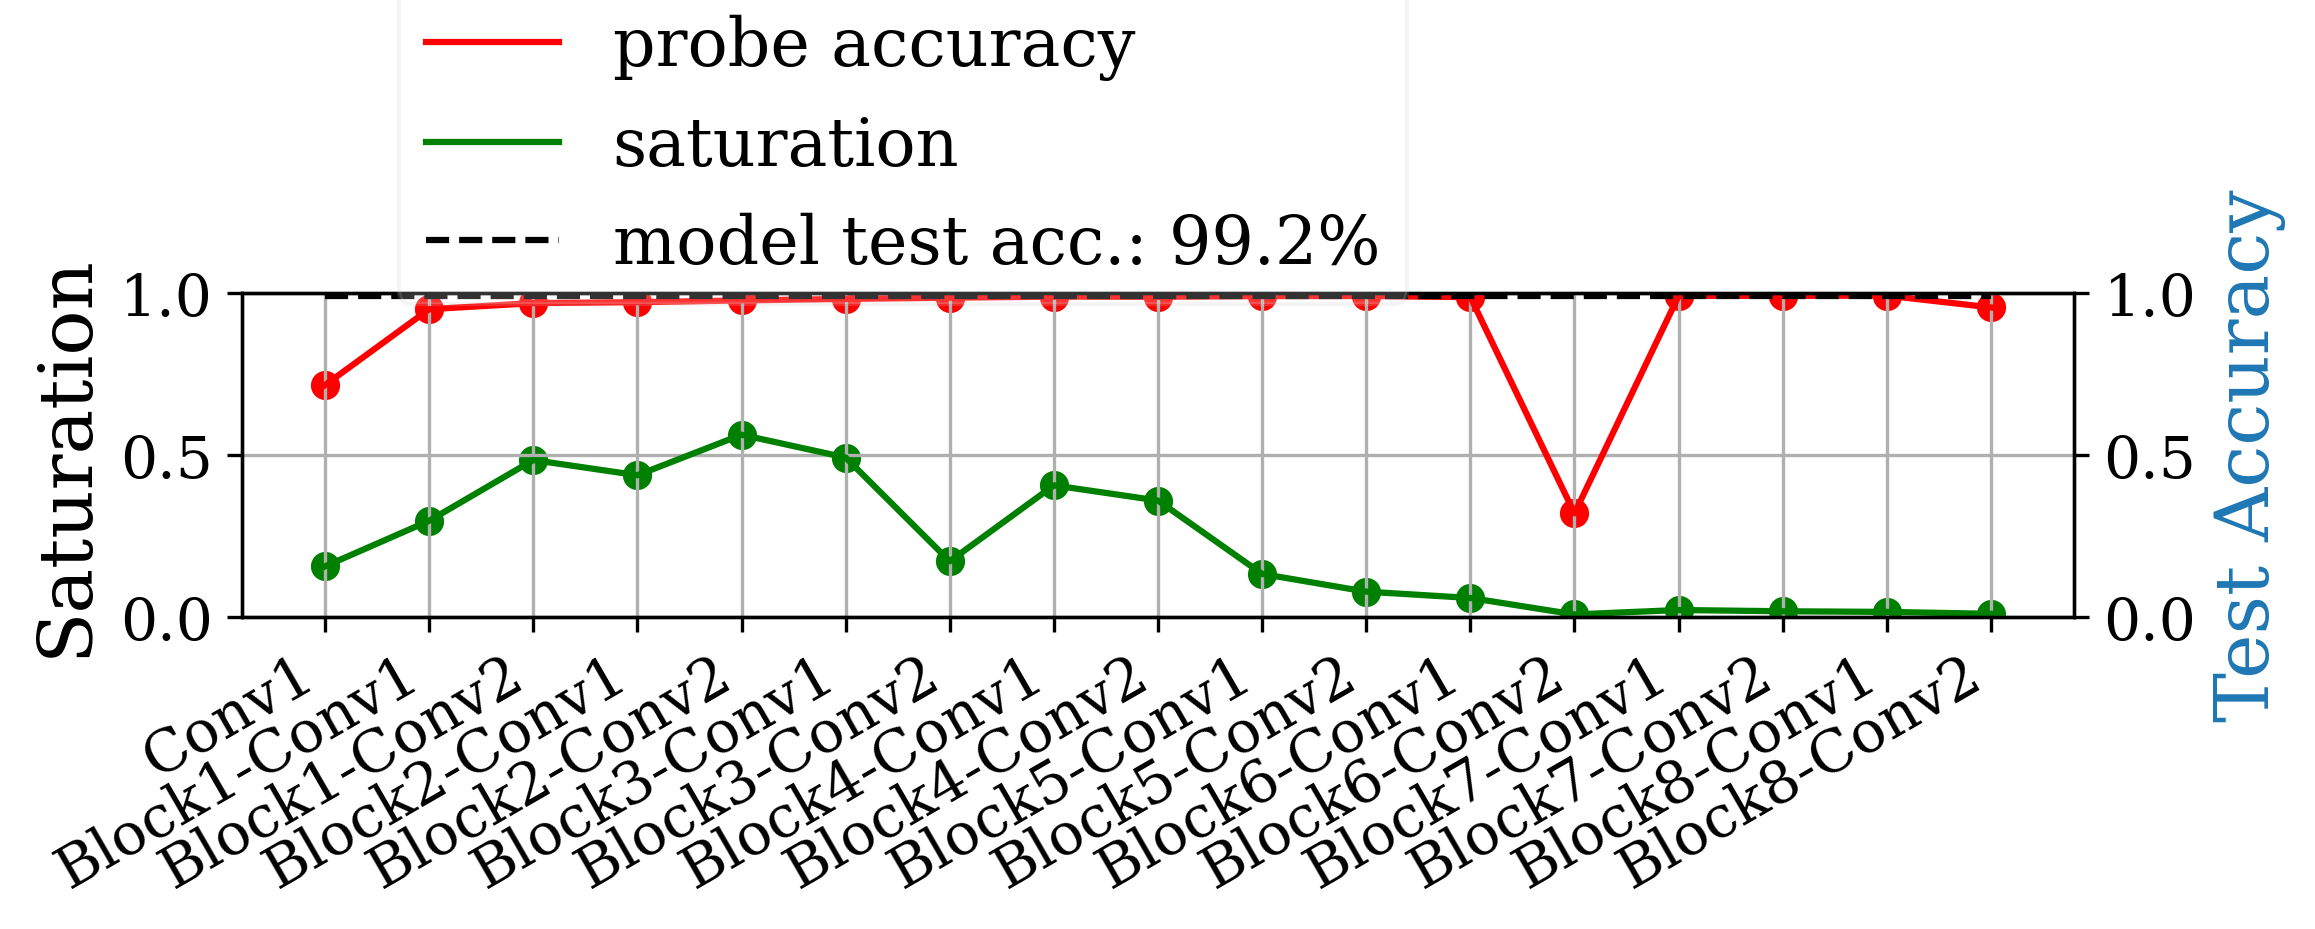

./logs/ResNet18/MNISTSmallRandomPositioning_160/RES/4x4_probe_performances.csv
./logs/ResNet18/MNISTSmallRandomPositioning_160/RES/ResNet18-MNISTSmallRandomPositioning-r160-bs64-e30.csv


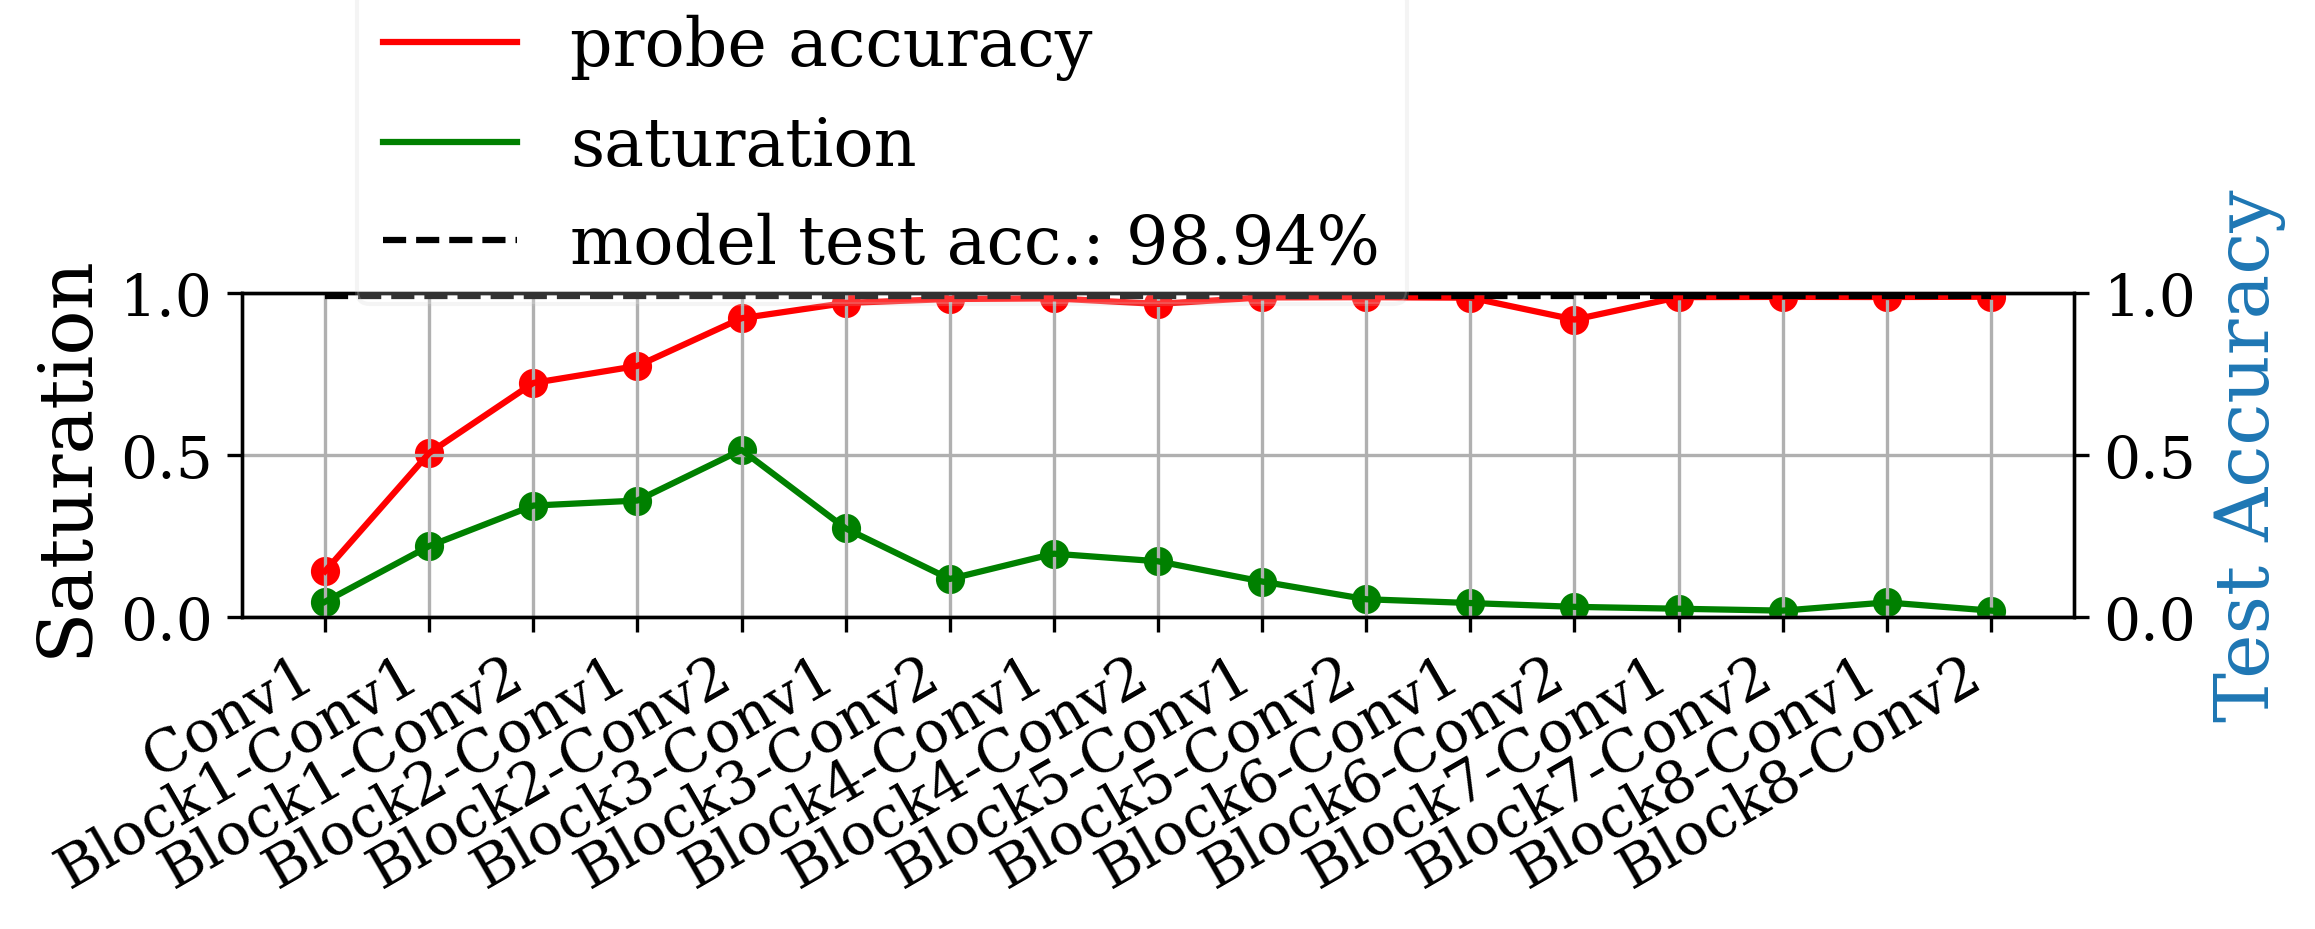

./logs/ResNet18/MNIST_160/RES/4x4_probe_performances.csv
./logs/ResNet18/MNIST_160/RES/ResNet18-MNIST-r160-bs64-e30.csv


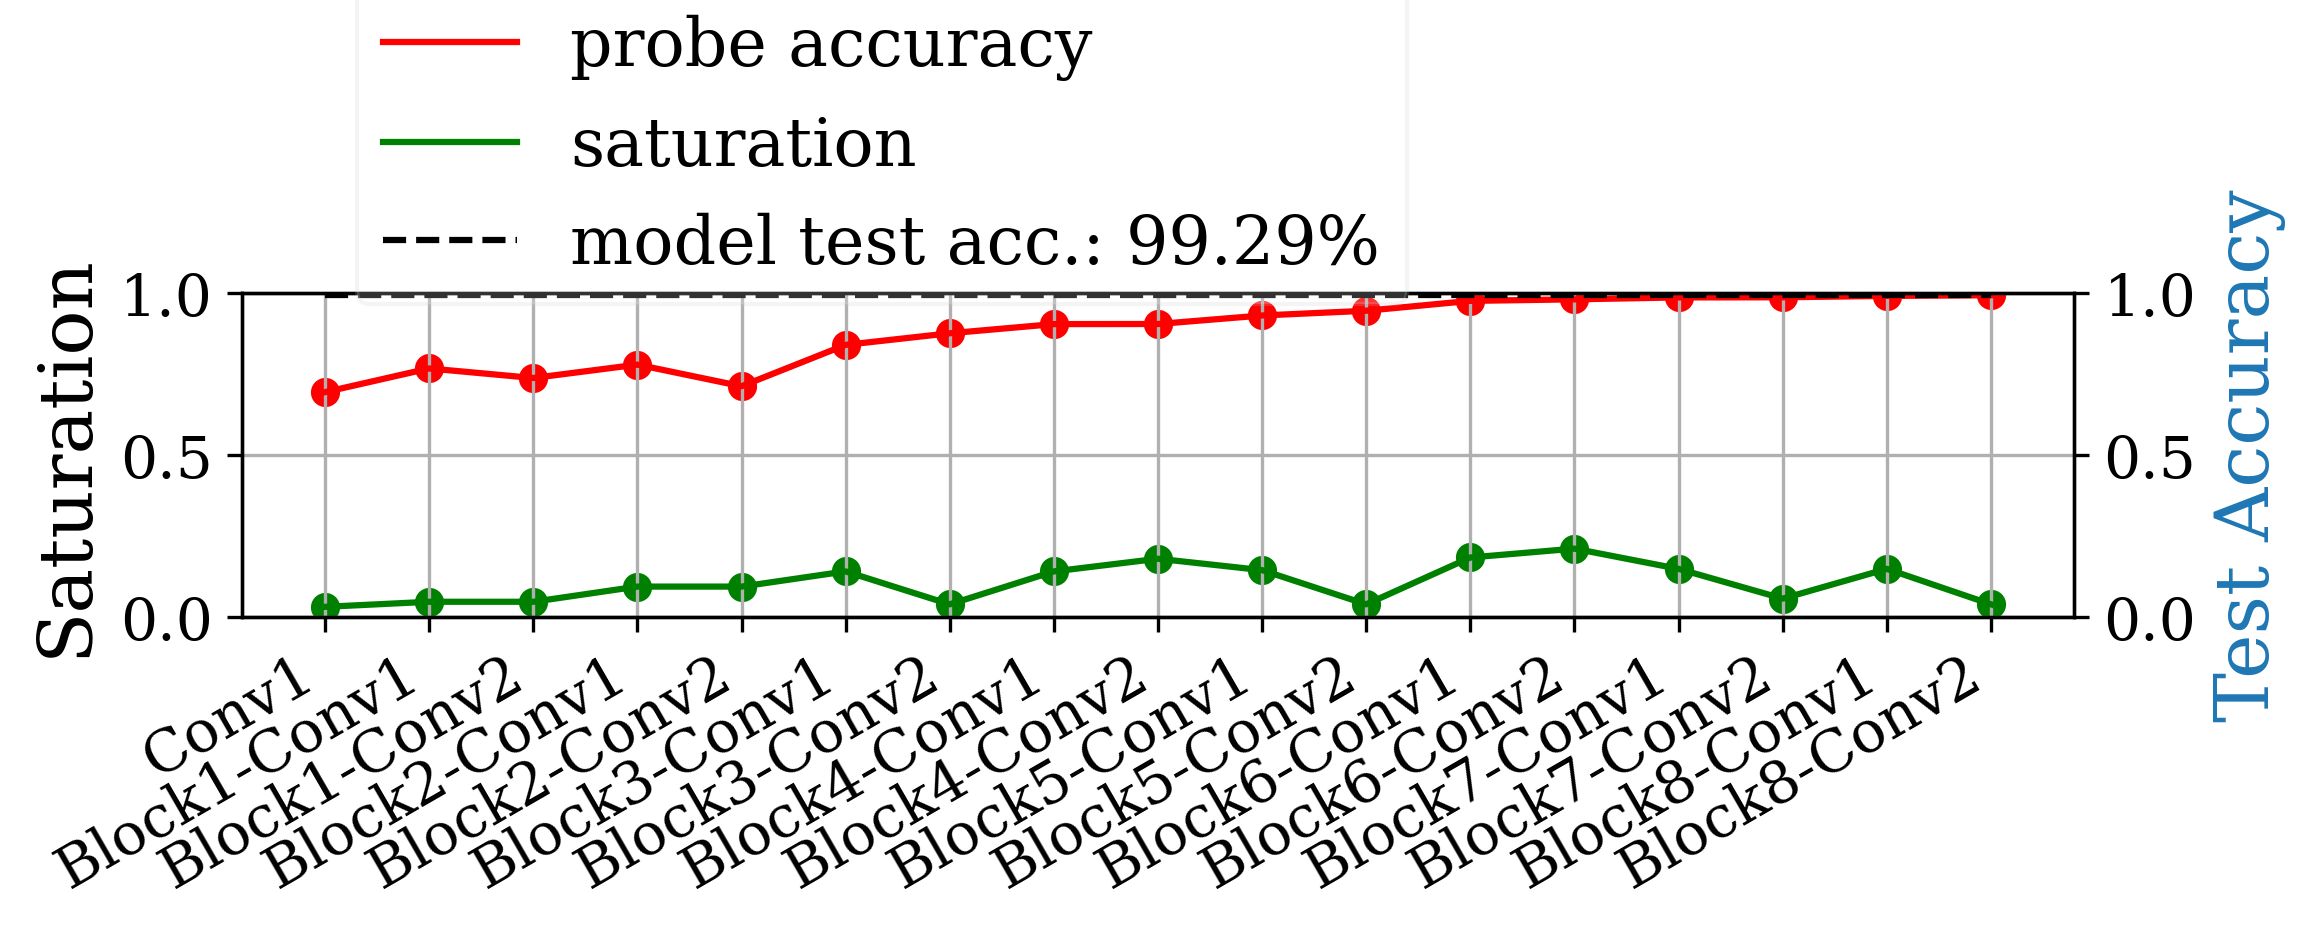

In [16]:
setups = [ ("ResNet18", 32, "MNIST"), 
          ("ResNet18", 160, "MNISTSmallRandomPositioning"), 
          ("ResNet18", 160, "MNIST")]

for (model, resolution, dataset) in setups:
    run_id = "RES"
    probe_downsample = "4x4" if dataset != "TinyImageNet" else "2x2"
    epochs = 60 if model == "ResNet50" else 30
    batch_size = 64

    cifar10_vgg_16_probes_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{probe_downsample}_probe_performances.csv'
    cifar10_cgg_16_sat_file = f'./logs/{model}/{dataset}_{resolution}/{run_id}/{model}-{dataset}-r{resolution}-bs{batch_size}-e{epochs}.csv'
    cifar10_cgg_16_sat_file = get_experiment_path(model, dataset, resolution, run_id, batch_size, epochs)
    print(cifar10_vgg_16_probes_file)
    print(cifar10_cgg_16_sat_file)

    order_mask = None

    filters = layer_filters[model]
    names = layer_names[model]

    probes_gap = plot_probe_accuracy(cifar10_vgg_16_probes_file, cifar10_cgg_16_sat_file, list(filters.keys()), filters, 'ResNet18_PC', figsize=(8, 2.5), layer_names=names)
    #plt.title('ResNet18NoSkip trained on BigCifar10')
    plt.tight_layout()
    savepath = os.path.join(path,f'{model}_{dataset}_{resolution}.png')
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()